In [1]:
%%time

import os
import warnings
import numpy as np

import liberate
from liberate import fhe
from liberate.fhe import presets

from matplotlib import pyplot as plt
from tqdm import tqdm

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

CPU times: user 3.64 s, sys: 9.05 s, total: 12.7 s
Wall time: 2.01 s


# 1. Liberate.FHE

## 1.1. CKKS

### 1.1.1 Available CKKS engine params
- buffer_bit_length=62
- scale_bits=40
- logN=15
- num_scales=None
- num_special_primes=2
- sigma=3.2
- uniform_tenary_secret=True
- cache_folder='cache/'
- security_bits=128
- quantum='post_quantum'
- distribution='uniform'
- read_cache=True
- save_cache=True
- verbose=False


In [2]:
# default params
ctx_params = {
    "buffer_bit_length":62,
    "scale_bits":40,
    "logN":15,
    "num_scales":None,
    "num_special_primes":2,
    "sigma":3.2,
    "uniform_tenary_secret":True,
    # "cache_folder":"cache/",
    "security_bits":128,
    "quantum":"post_quantum",
    'distribution':"uniform",
    "read_cache":True,
    "save_cache":True,
    "verbose":False, 
}

### 1.1.2. create engine(context)

In [3]:
%%time

# you can use ctx_params
%time engine = fhe.ckks_engine(devices=None, **ctx_params)

# or you can use presets parameters.
print()
params = presets.params["silver"]
print(params)
engine = fhe.ckks_engine(verbose=True, **params)

CPU times: user 1.91 s, sys: 617 ms, total: 2.53 s
Wall time: 2.63 s

{'logN': 15, 'num_special_primes': 2, 'devices': [0]}
[2023-11-14 13:21:49.913963] I have received the context:


I have received inputs:
        buffer_bit_length		= 62
        scale_bits			= 40
        logN				= 15
        N				= 32,768
        Number of special primes	= 2
        Number of scales		= 16
        Cache folder			= '/home/hanyul/.pyenv/versions/liberate/lib/python3.11/site-packages/liberate/fhe/cache/resources'
        Security bits			= 128
        Quantum security model		= post_quantum
        Security sampling distribution	= uniform
        Number of message bits		= 60
        In total I will be using '821' bits out of available maximum '829' bits.
        And is it secured?		= True
My RNS primes are [1099510054913, 1099515691009, 1099507695617, 1099516280833, 1099506515969, 1099520606209, 1099504549889, 1099523555329, 1099503894529, 1099527946241, 1099503370241, 1099529060353, 1099498258433, 1099531

### 1.1.3. Generate Secret and Public Key

In [4]:
%%time

%time secret_key = engine.create_secret_key()
%time public_key = engine.create_public_key(sk=secret_key)

CPU times: user 3.21 ms, sys: 4 ms, total: 7.22 ms
Wall time: 873 µs
CPU times: user 286 µs, sys: 356 µs, total: 642 µs
Wall time: 633 µs
CPU times: user 5.28 ms, sys: 6.57 ms, total: 11.8 ms
Wall time: 3.01 ms


### 1.1.4. Encode and Encrypt

In [5]:
%%time

test_message = engine.example()

level = 0

pt = engine.encode(m=test_message, level=level)
ct = engine.encrypt(pt=pt, pk=public_key, level=level)

pt_dec = engine.decrypt(ct=ct, sk=secret_key)
test_message_dec = engine.decode(m=pt_dec, level=level)

CPU times: user 91.3 ms, sys: 7.2 ms, total: 98.5 ms
Wall time: 99 ms


### 1.1.5 Shotcuts of Encode, Encrypt, Decrypt and Decode
- `encorypt`
- `decrode`

In [6]:
%%time

test_message = engine.example()

level = 0

ct = engine.encorypt(m=test_message, pk=public_key, level=level)
test_message_dec = engine.decrode(ct=ct, sk=secret_key)

CPU times: user 4.74 ms, sys: 0 ns, total: 4.74 ms
Wall time: 4.02 ms


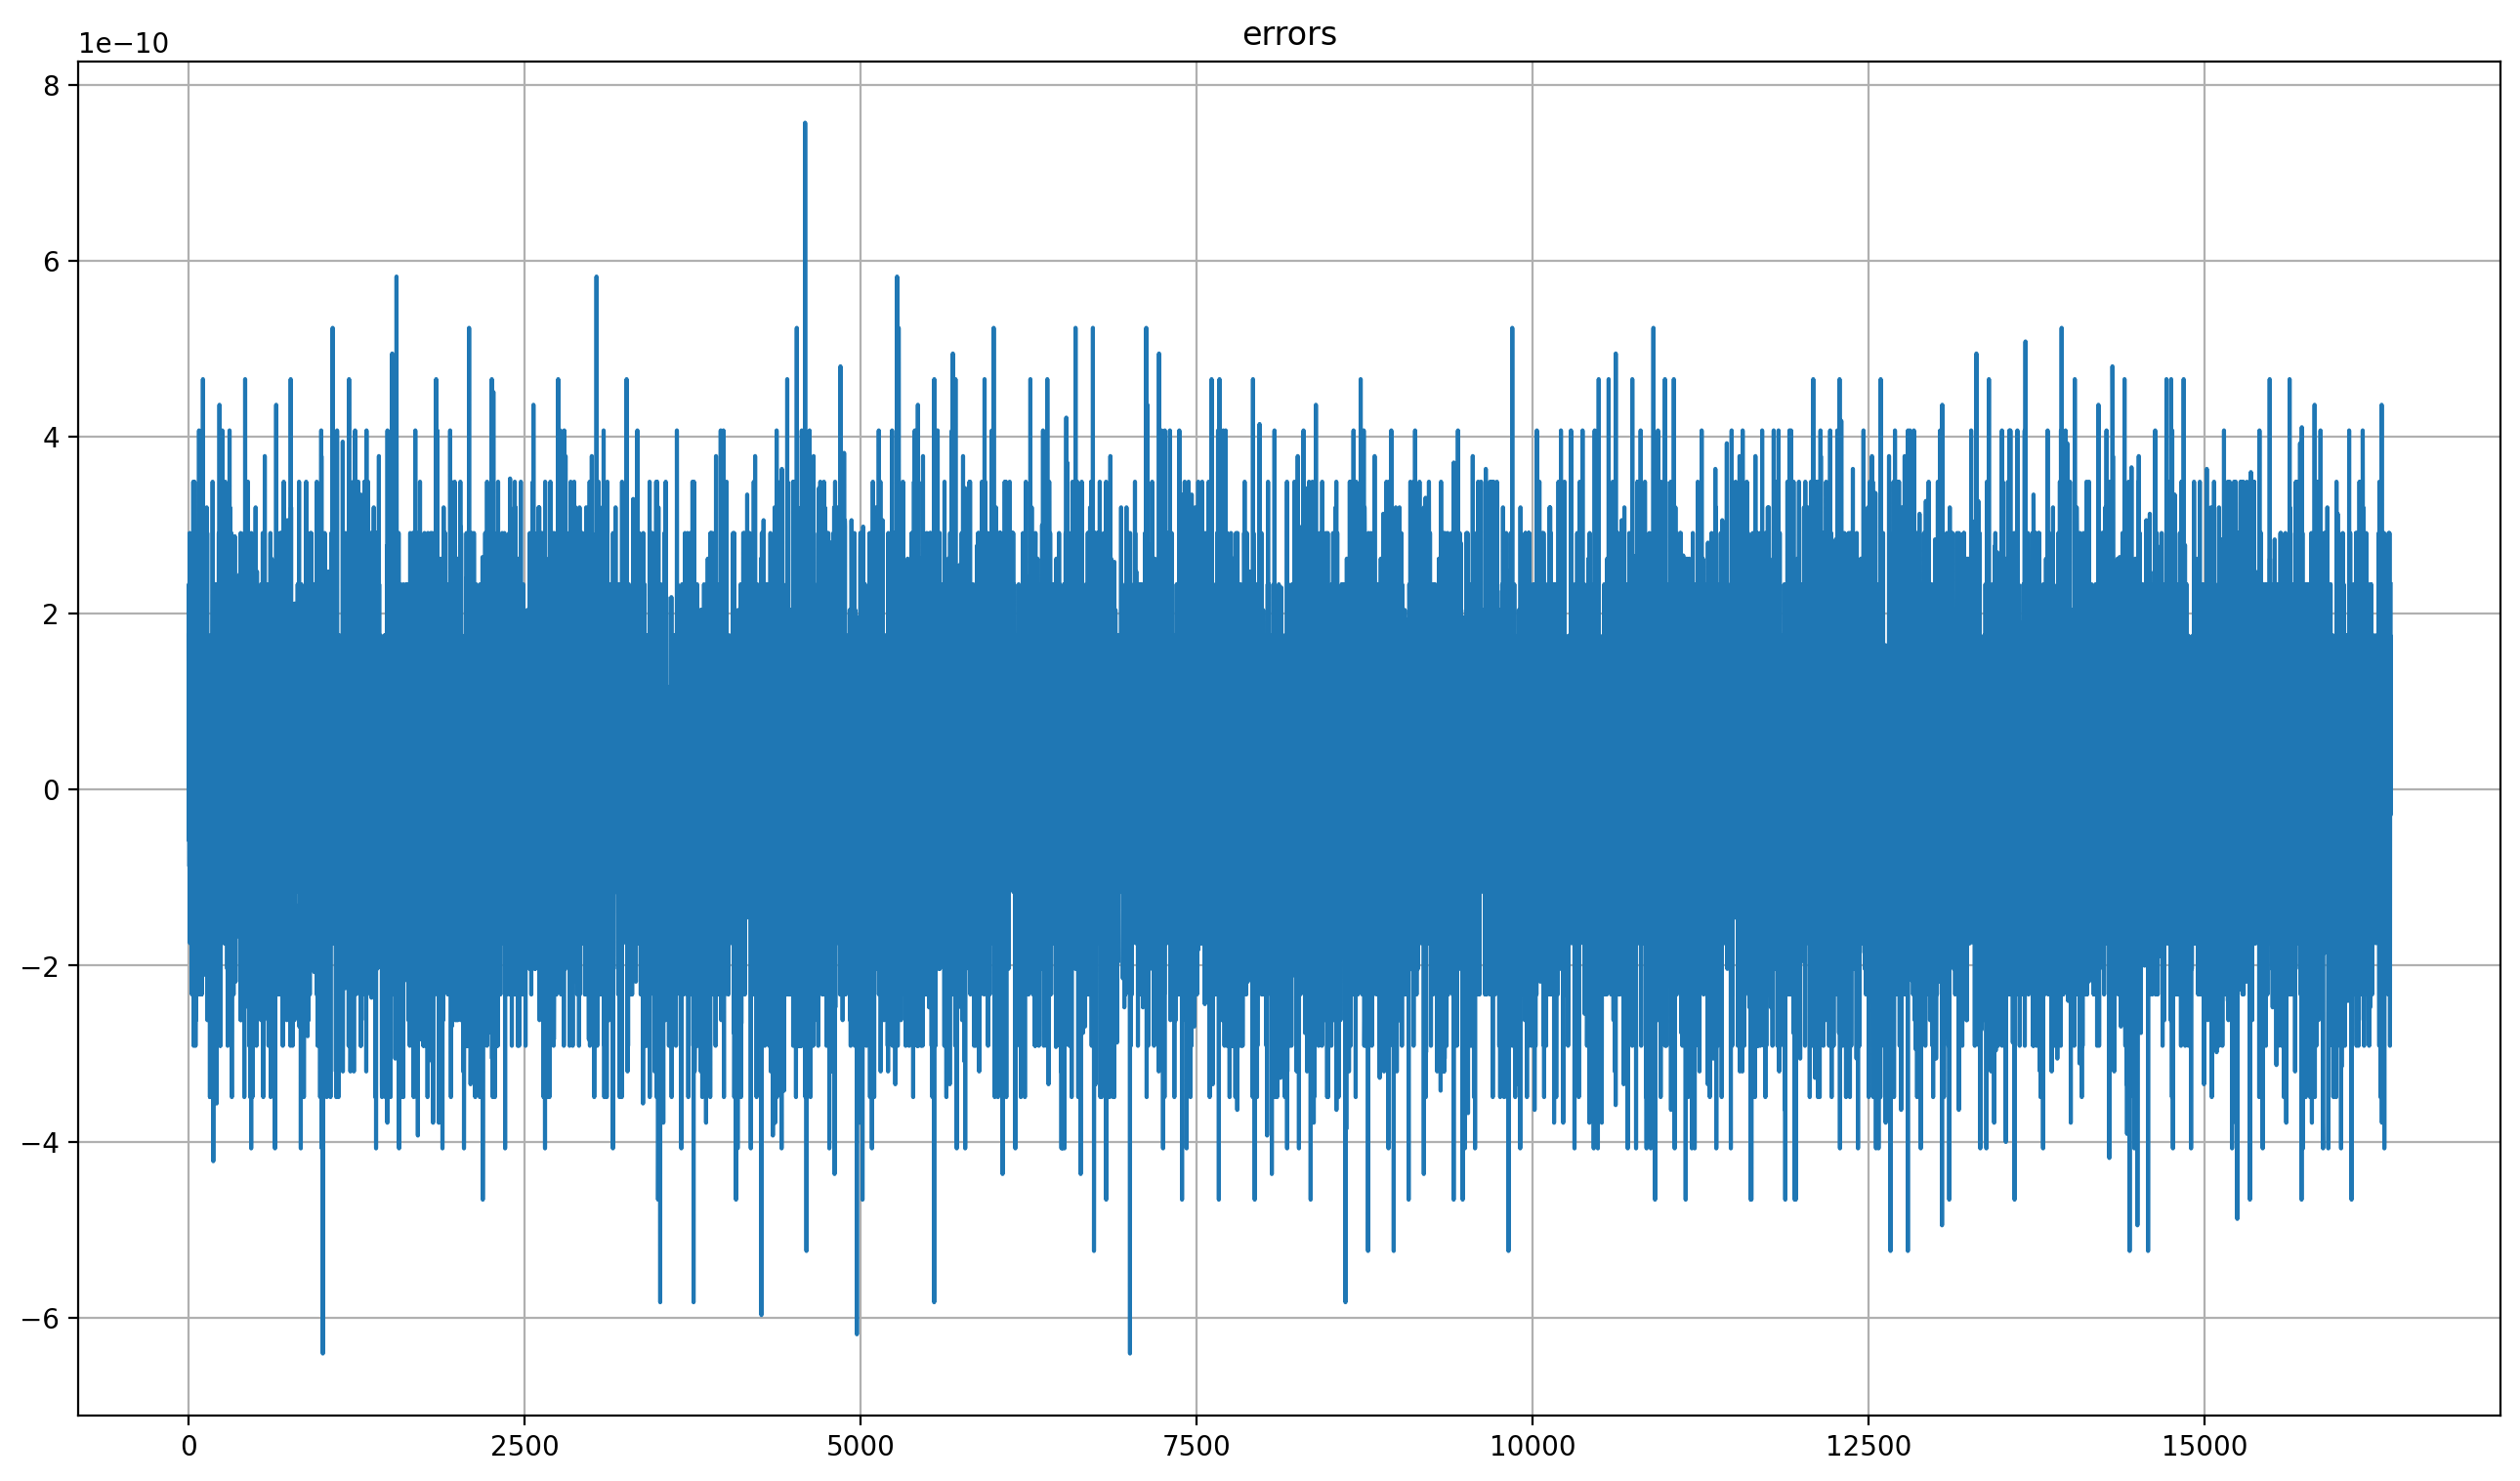

 -378274.2788226117 |  -378274.2788226116 |   0.0000000002
    7265.0778505985 |     7265.0778505986 |   0.0000000001
  361175.7458041484 |   361175.7458041486 |   0.0000000002
  207452.1857617789 |   207452.1857617788 |  -0.0000000001
 -284320.7435922212 |  -284320.7435922210 |   0.0000000002
 -492244.2069705681 |  -492244.2069705679 |   0.0000000002
   54367.4544486739 |    54367.4544486738 |  -0.0000000001
 -224174.6185874020 |  -224174.6185874020 |   0.0000000000
  189194.6002515436 |   189194.6002515439 |   0.0000000003
  408478.9640180998 |   408478.9640180997 |  -0.0000000001
mean	=	0.000000000010051+0.000000000000333j
std	=	0.000000000241156
max err	=	0.000000009431258
min err	=	0.000000000000000


In [7]:
liberate.utils.helpers.check_errors(test_message=test_message, test_message_dec=test_message_dec, idx=10)

## 1.1.5. Encrypt different level

In [8]:
print(f"Available Level : {engine.num_levels:2d}")

Available Level : 16


level	:	0


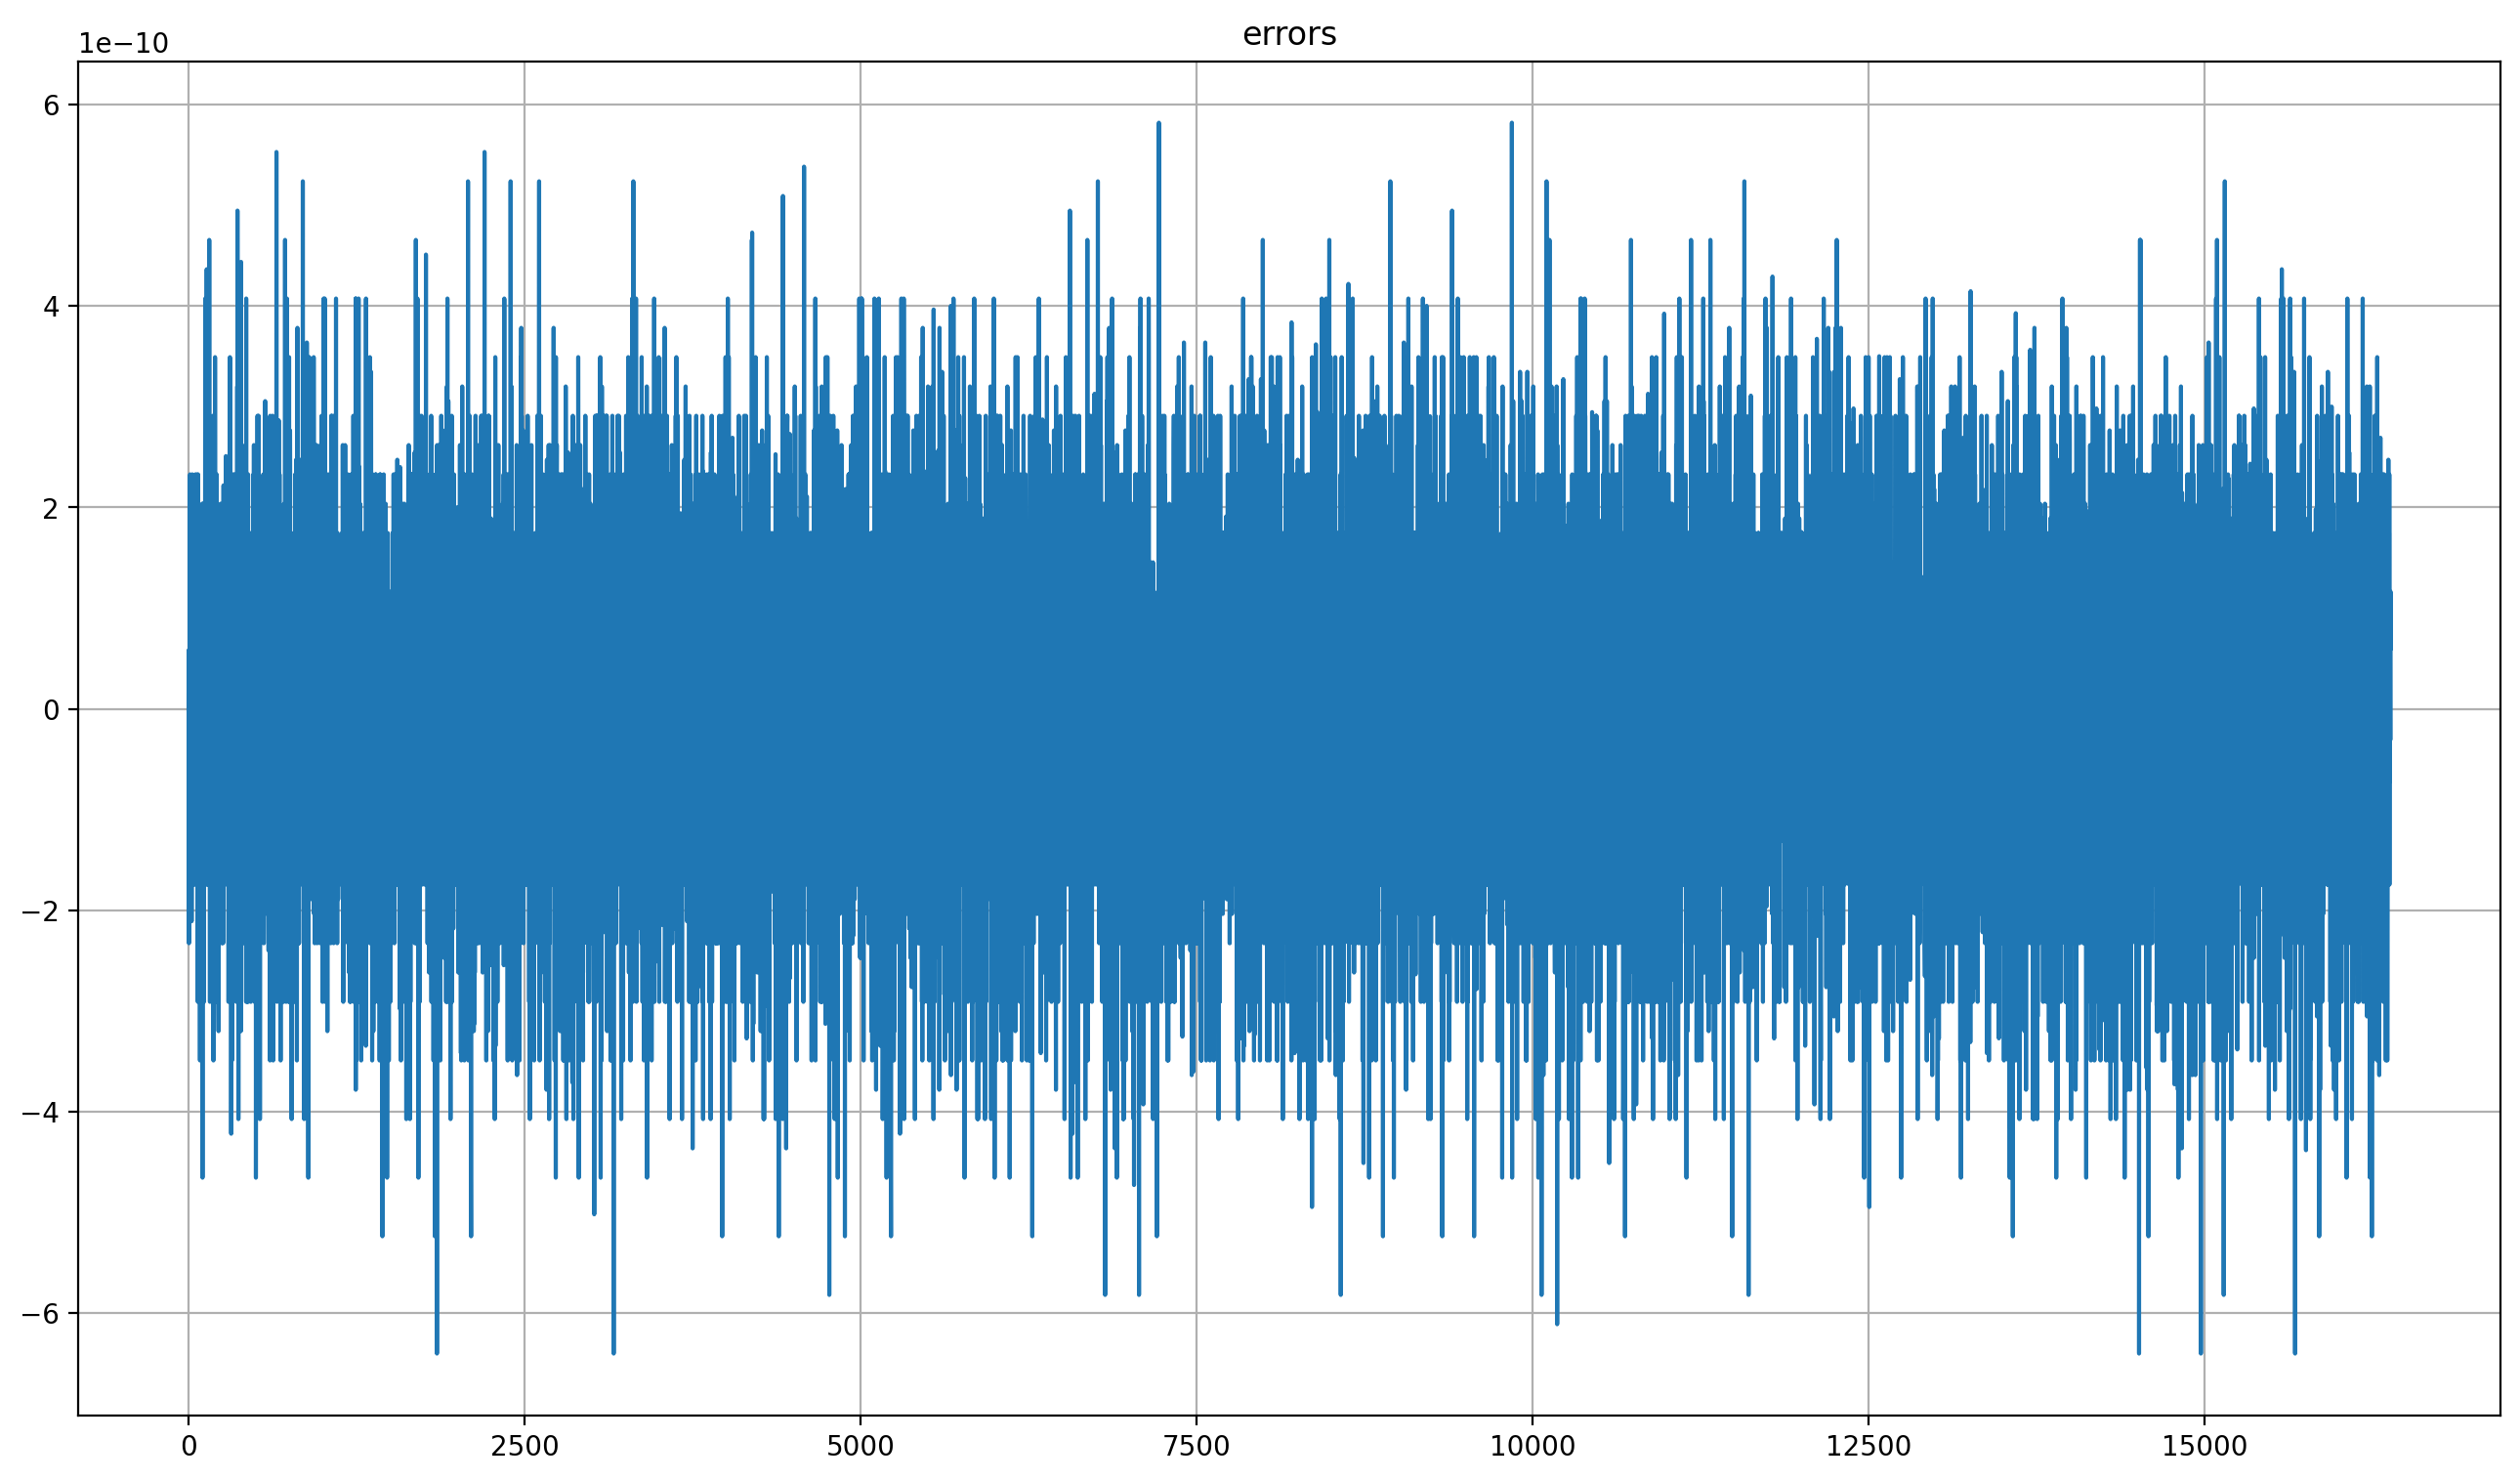

 -202331.6416323669 |  -202331.6416323669 |   0.0000000000
 -495056.5097603008 |  -495056.5097603007 |   0.0000000001
  344978.7765758324 |   344978.7765758323 |  -0.0000000001
 -302248.3318157291 |  -302248.3318157293 |  -0.0000000002
 -287640.5841317273 |  -287640.5841317272 |   0.0000000001
  260198.3072470983 |   260198.3072470982 |  -0.0000000001
  264257.4147834021 |   264257.4147834021 |   0.0000000000
   32691.3301915436 |    32691.3301915435 |  -0.0000000001
 -108364.3291478422 |  -108364.3291478422 |   0.0000000000
 -396483.6720636303 |  -396483.6720636305 |  -0.0000000002
mean	=	-0.000000000008945-0.000000000001589j
std	=	0.000000000241015
max err	=	0.000000009604264
min err	=	0.000000000000000
level	:	1


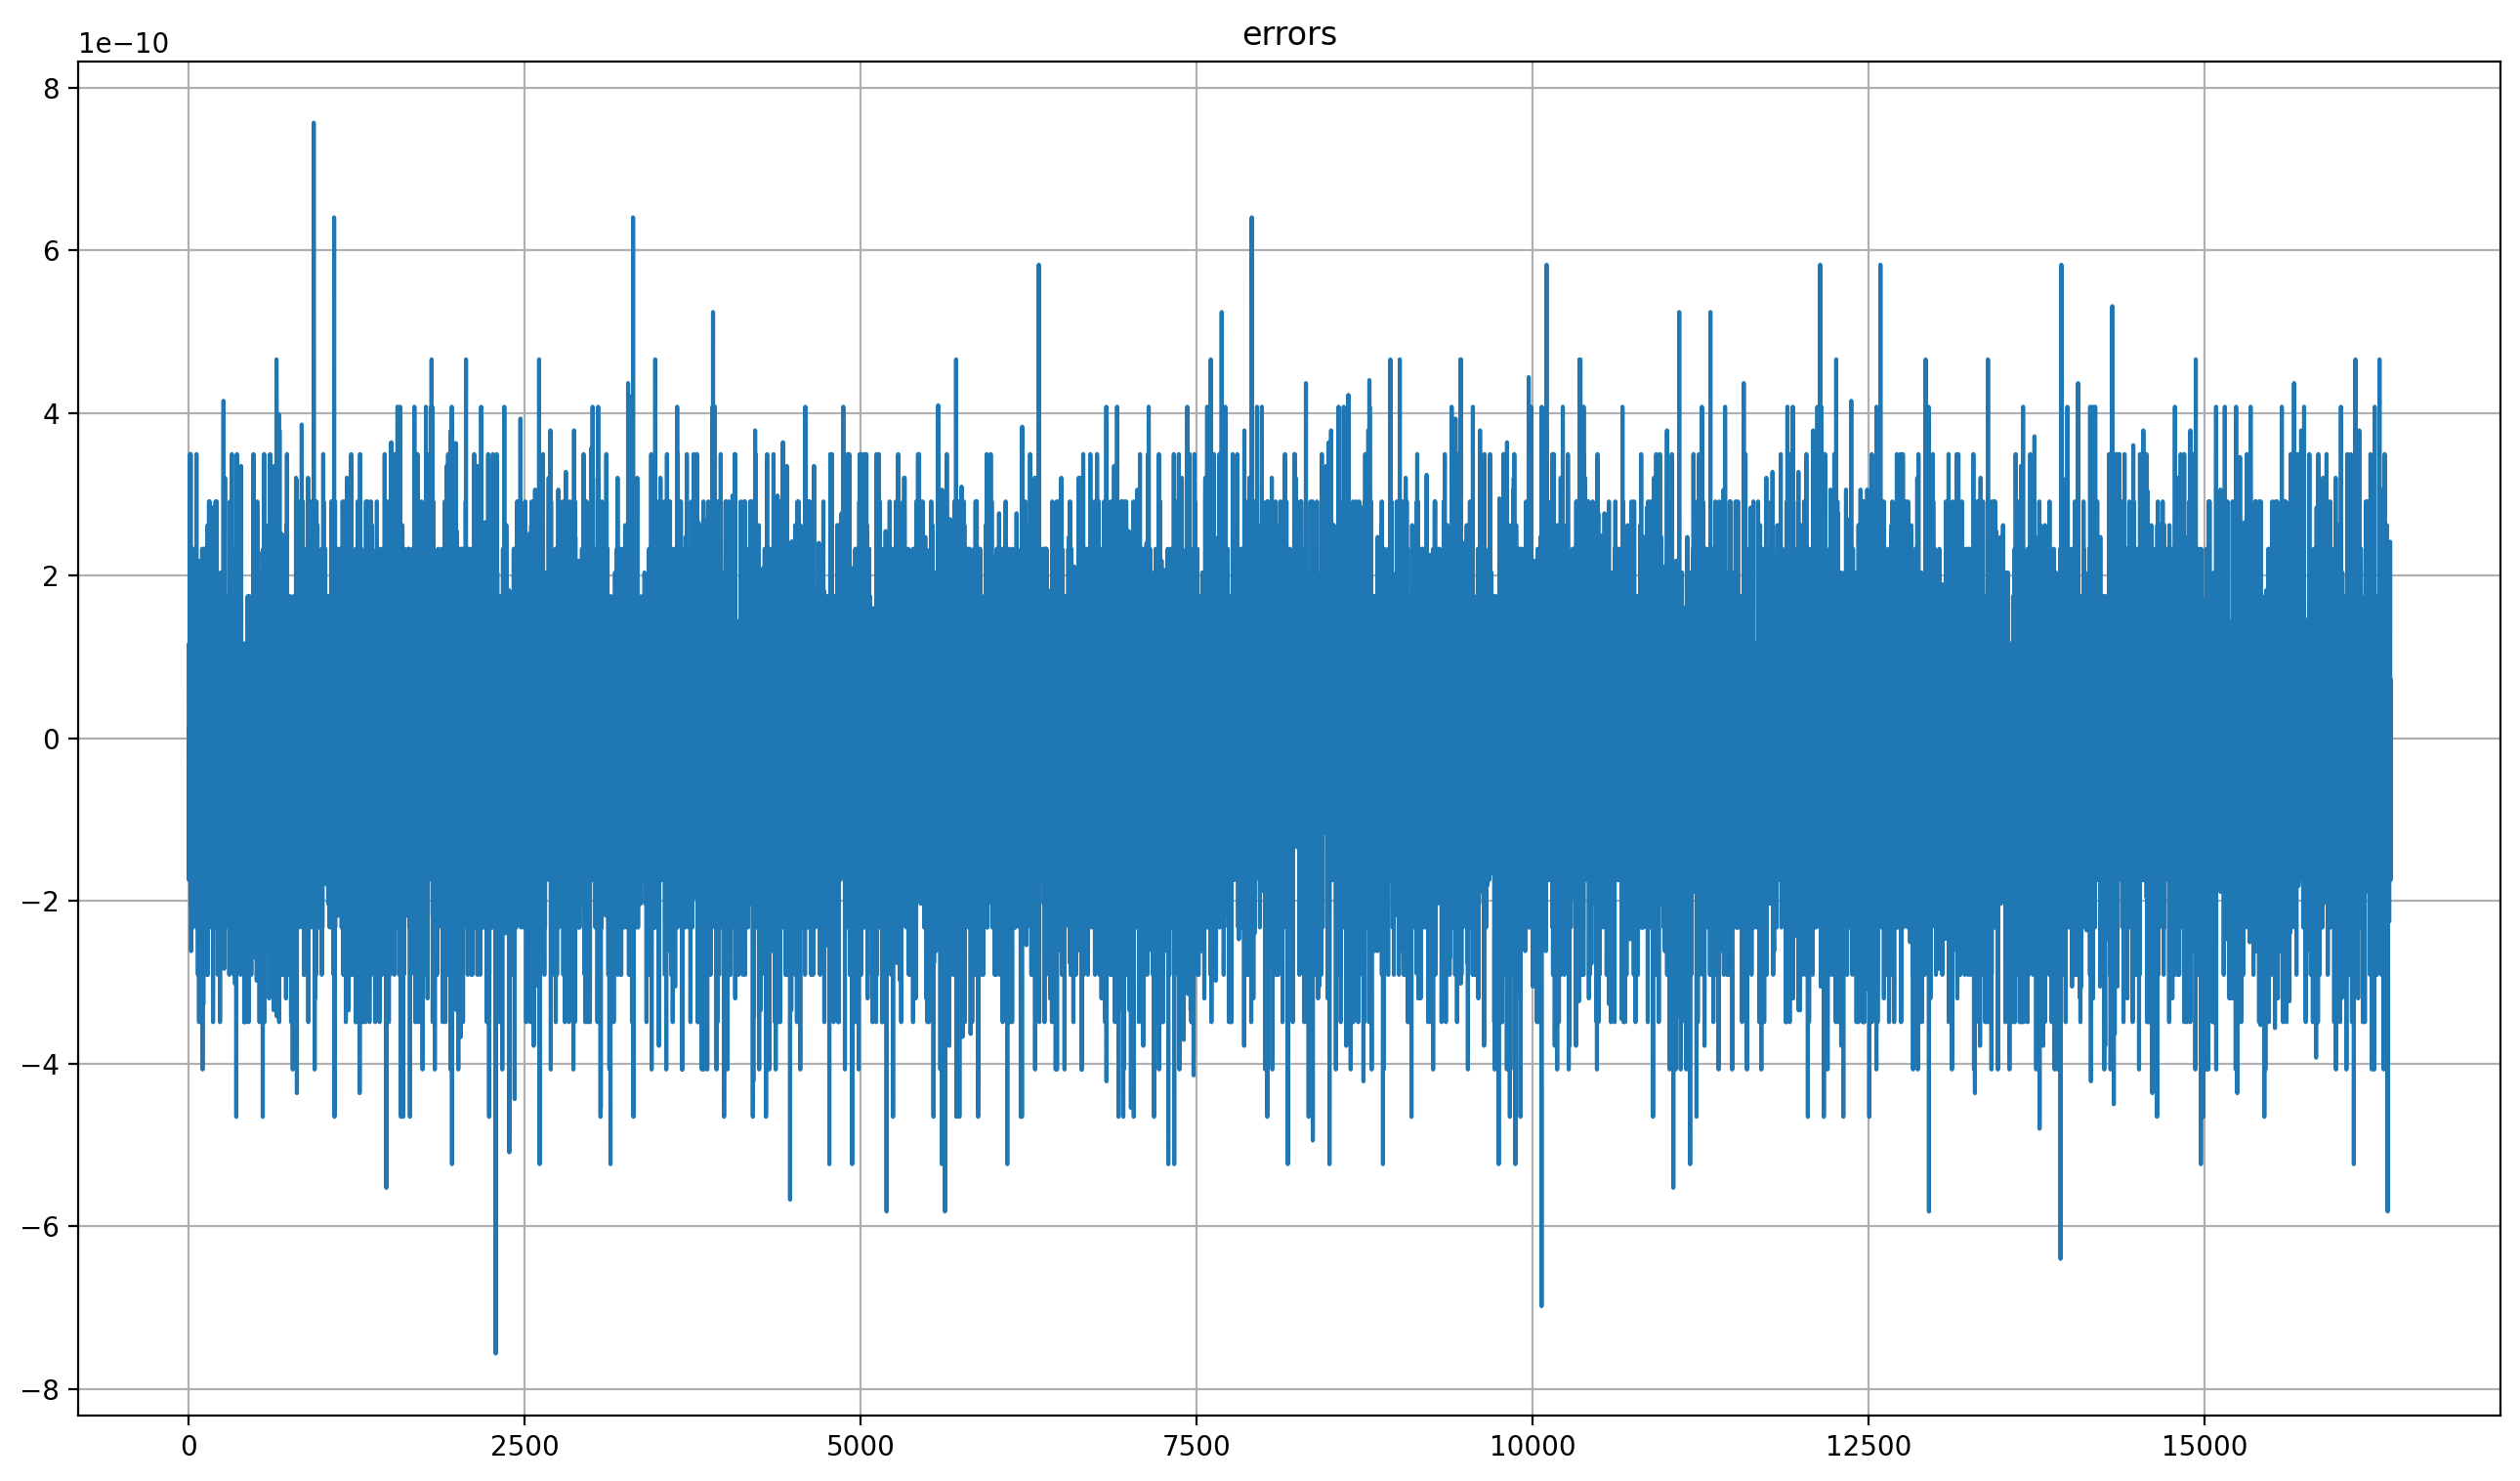

 -202331.6416323669 |  -202331.6416323669 |  -0.0000000000
 -495056.5097603008 |  -495056.5097603009 |  -0.0000000001
  344978.7765758324 |   344978.7765758323 |  -0.0000000001
 -302248.3318157291 |  -302248.3318157293 |  -0.0000000002
 -287640.5841317273 |  -287640.5841317272 |   0.0000000001
  260198.3072470983 |   260198.3072470983 |   0.0000000000
  264257.4147834021 |   264257.4147834020 |  -0.0000000001
   32691.3301915436 |    32691.3301915436 |   0.0000000000
 -108364.3291478422 |  -108364.3291478423 |  -0.0000000001
 -396483.6720636303 |  -396483.6720636302 |   0.0000000001
mean	=	-0.000000000009145-0.000000000000346j
std	=	0.000000000240638
max err	=	0.000000009546101
min err	=	0.000000000000000
level	:	2


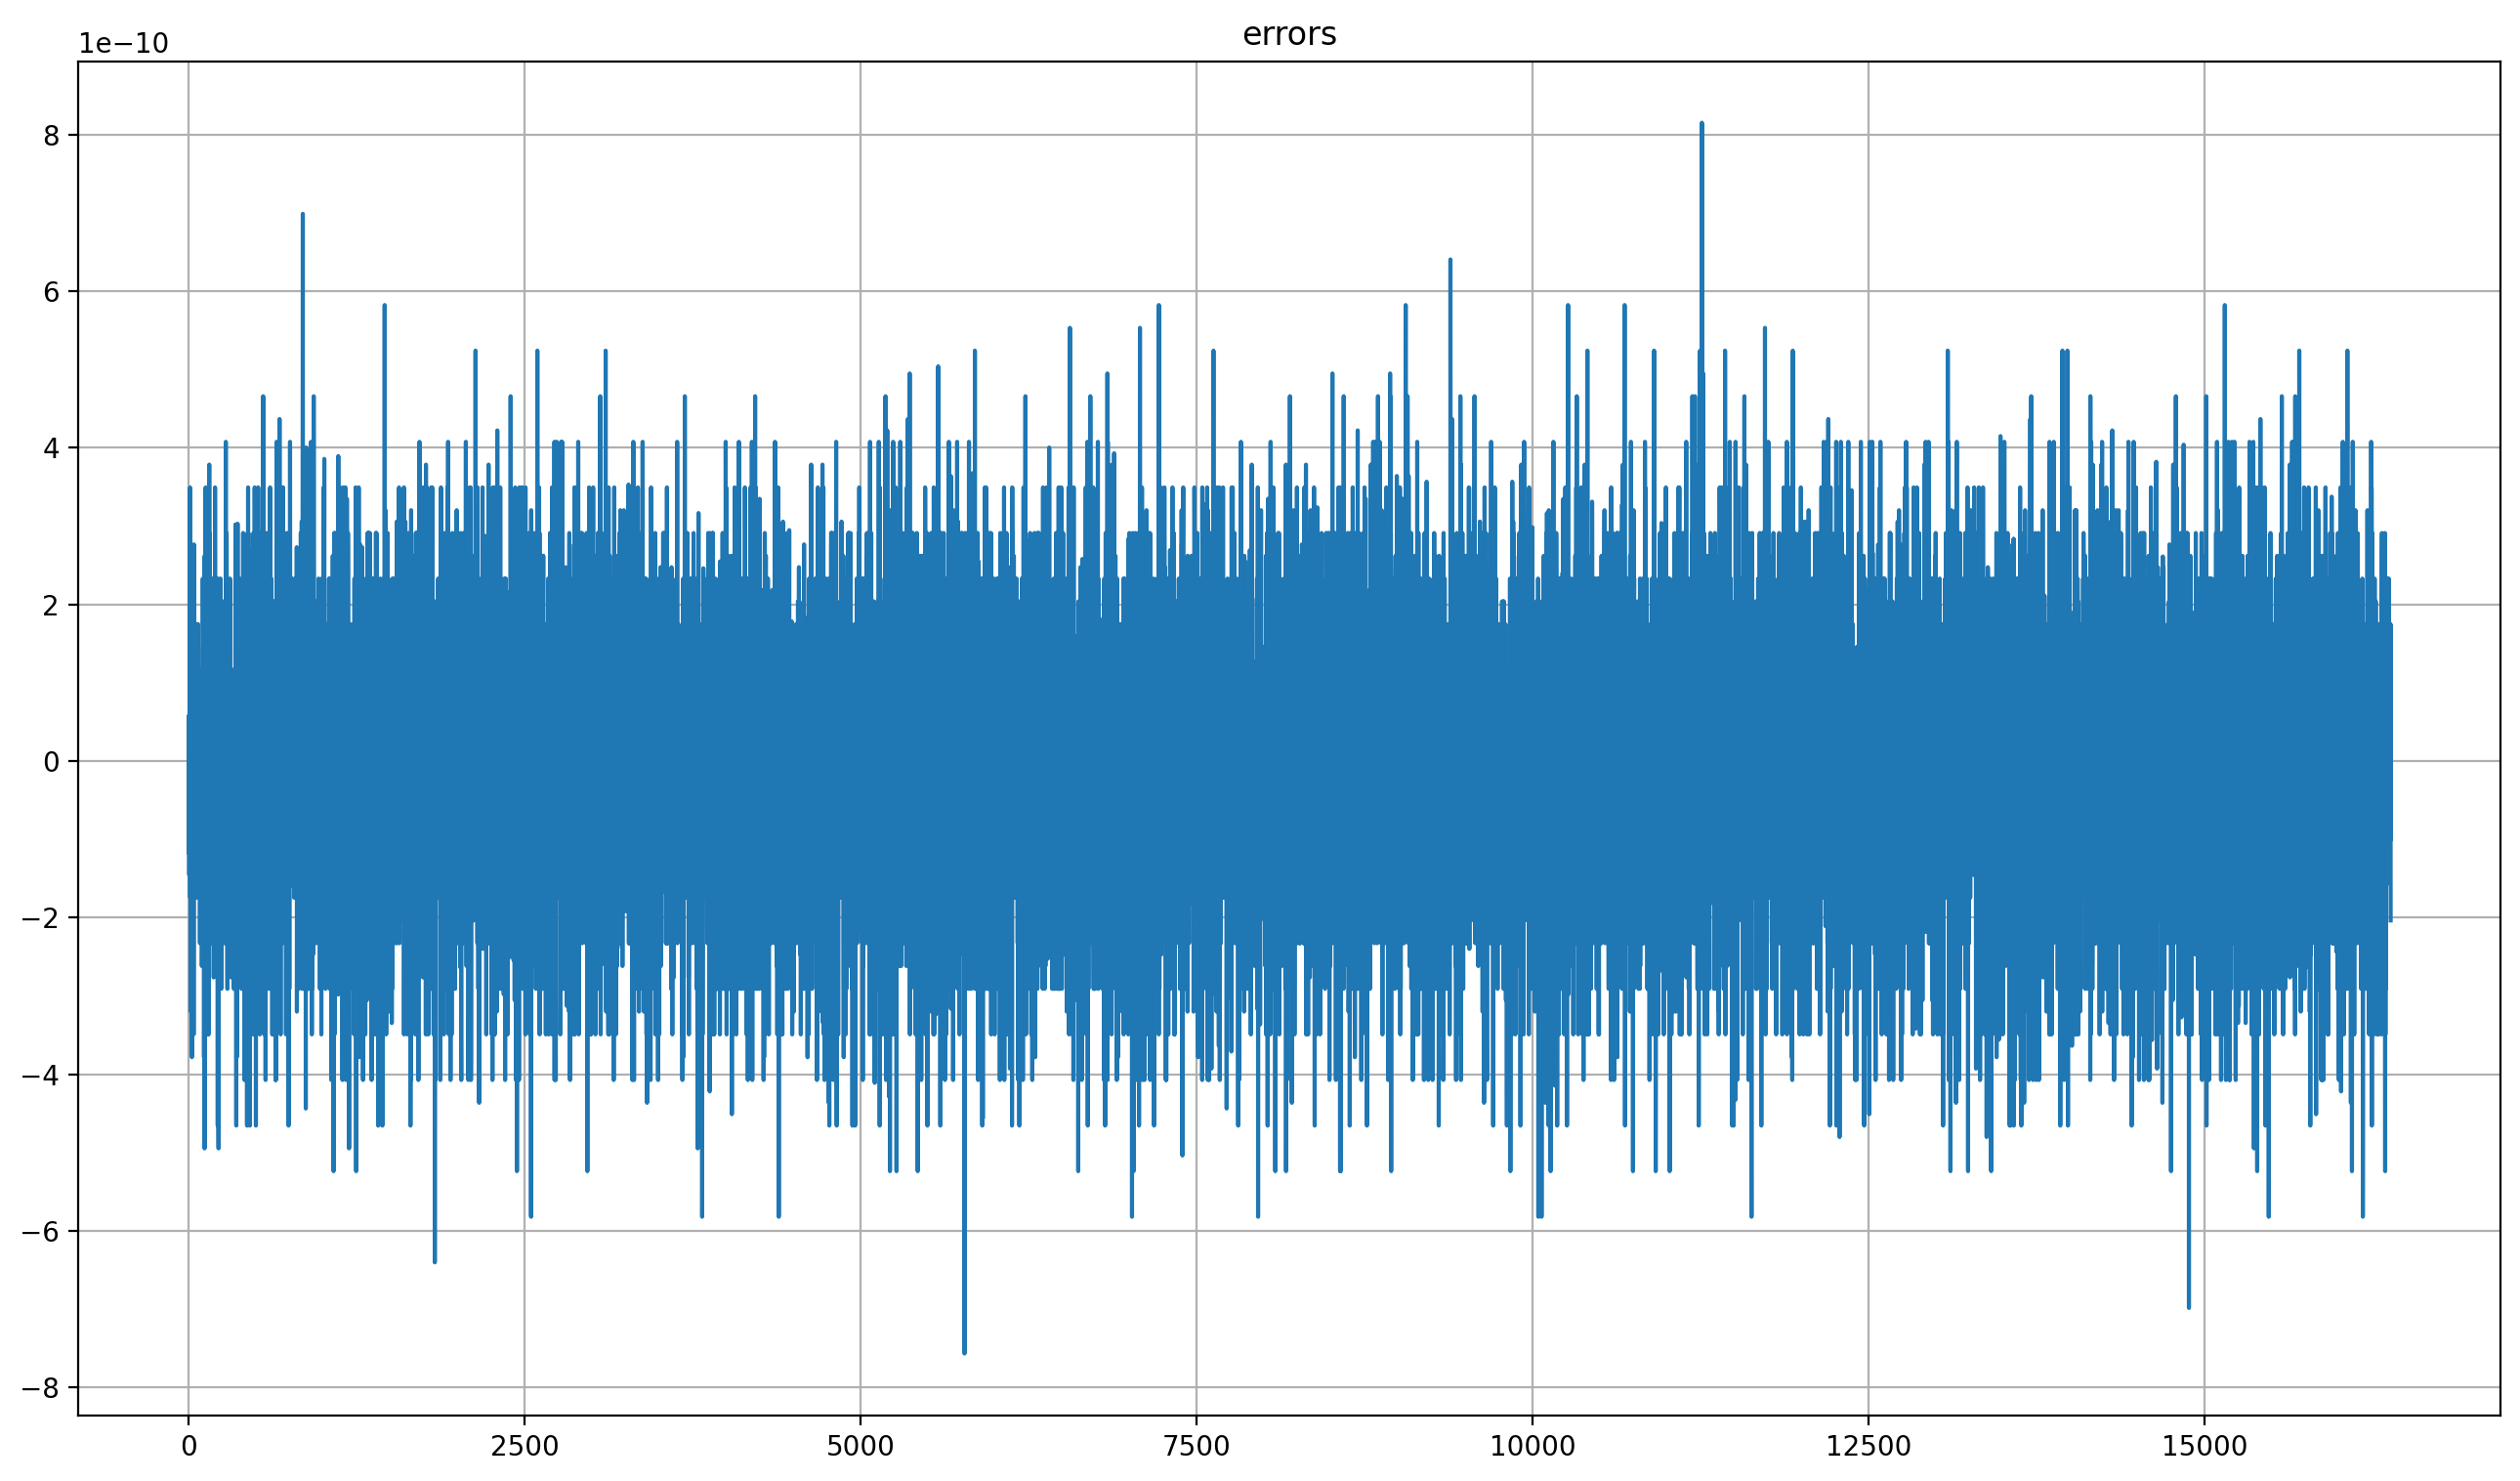

 -202331.6416323669 |  -202331.6416323670 |  -0.0000000001
 -495056.5097603008 |  -495056.5097603009 |  -0.0000000001
  344978.7765758324 |   344978.7765758323 |  -0.0000000001
 -302248.3318157291 |  -302248.3318157290 |   0.0000000001
 -287640.5841317273 |  -287640.5841317273 |  -0.0000000001
  260198.3072470983 |   260198.3072470982 |  -0.0000000001
  264257.4147834021 |   264257.4147834020 |  -0.0000000001
   32691.3301915436 |    32691.3301915436 |   0.0000000000
 -108364.3291478422 |  -108364.3291478423 |  -0.0000000001
 -396483.6720636303 |  -396483.6720636304 |  -0.0000000001
mean	=	-0.000000000009406+0.000000000000846j
std	=	0.000000000254996
max err	=	0.000000009372156
min err	=	0.000000000000000
level	:	3


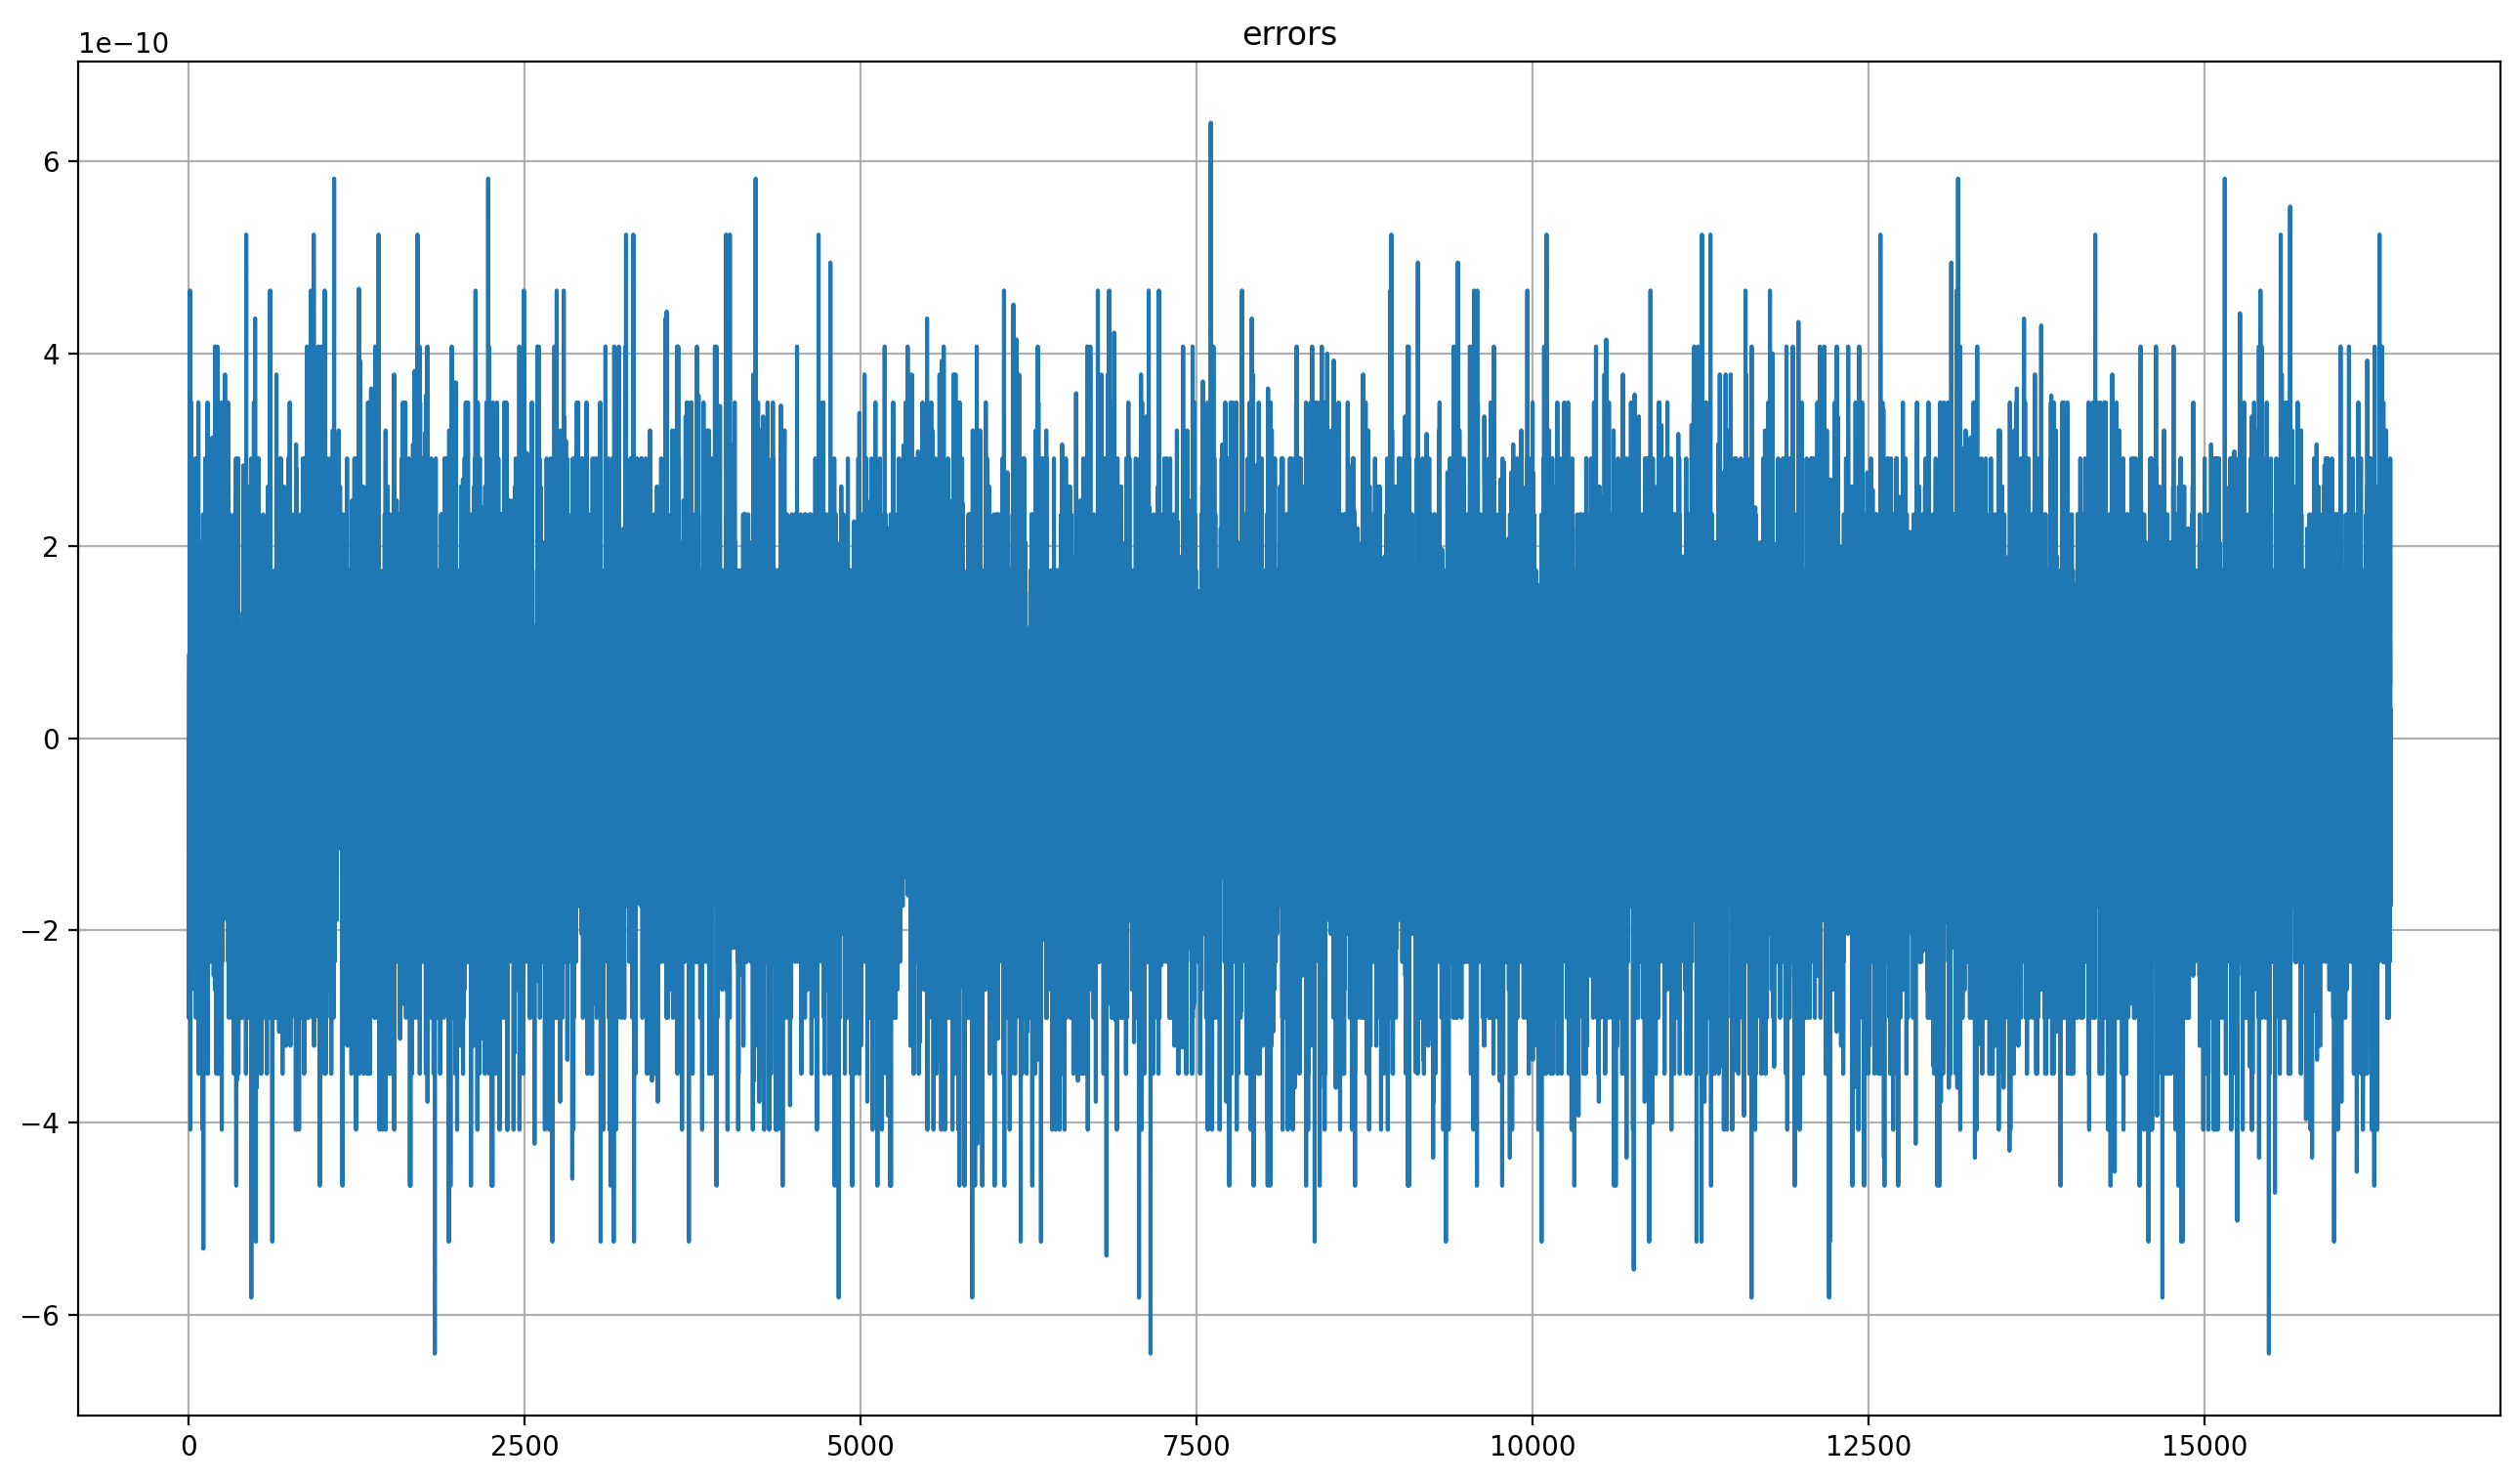

 -202331.6416323669 |  -202331.6416323670 |  -0.0000000001
 -495056.5097603008 |  -495056.5097603011 |  -0.0000000003
  344978.7765758324 |   344978.7765758324 |   0.0000000000
 -302248.3318157291 |  -302248.3318157292 |  -0.0000000001
 -287640.5841317273 |  -287640.5841317272 |   0.0000000001
  260198.3072470983 |   260198.3072470984 |   0.0000000001
  264257.4147834021 |   264257.4147834020 |  -0.0000000001
   32691.3301915436 |    32691.3301915435 |  -0.0000000001
 -108364.3291478422 |  -108364.3291478422 |  -0.0000000000
 -396483.6720636303 |  -396483.6720636305 |  -0.0000000002
mean	=	-0.000000000009404+0.000000000000558j
std	=	0.000000000250657
max err	=	0.000000009458924
min err	=	0.000000000000000
level	:	4


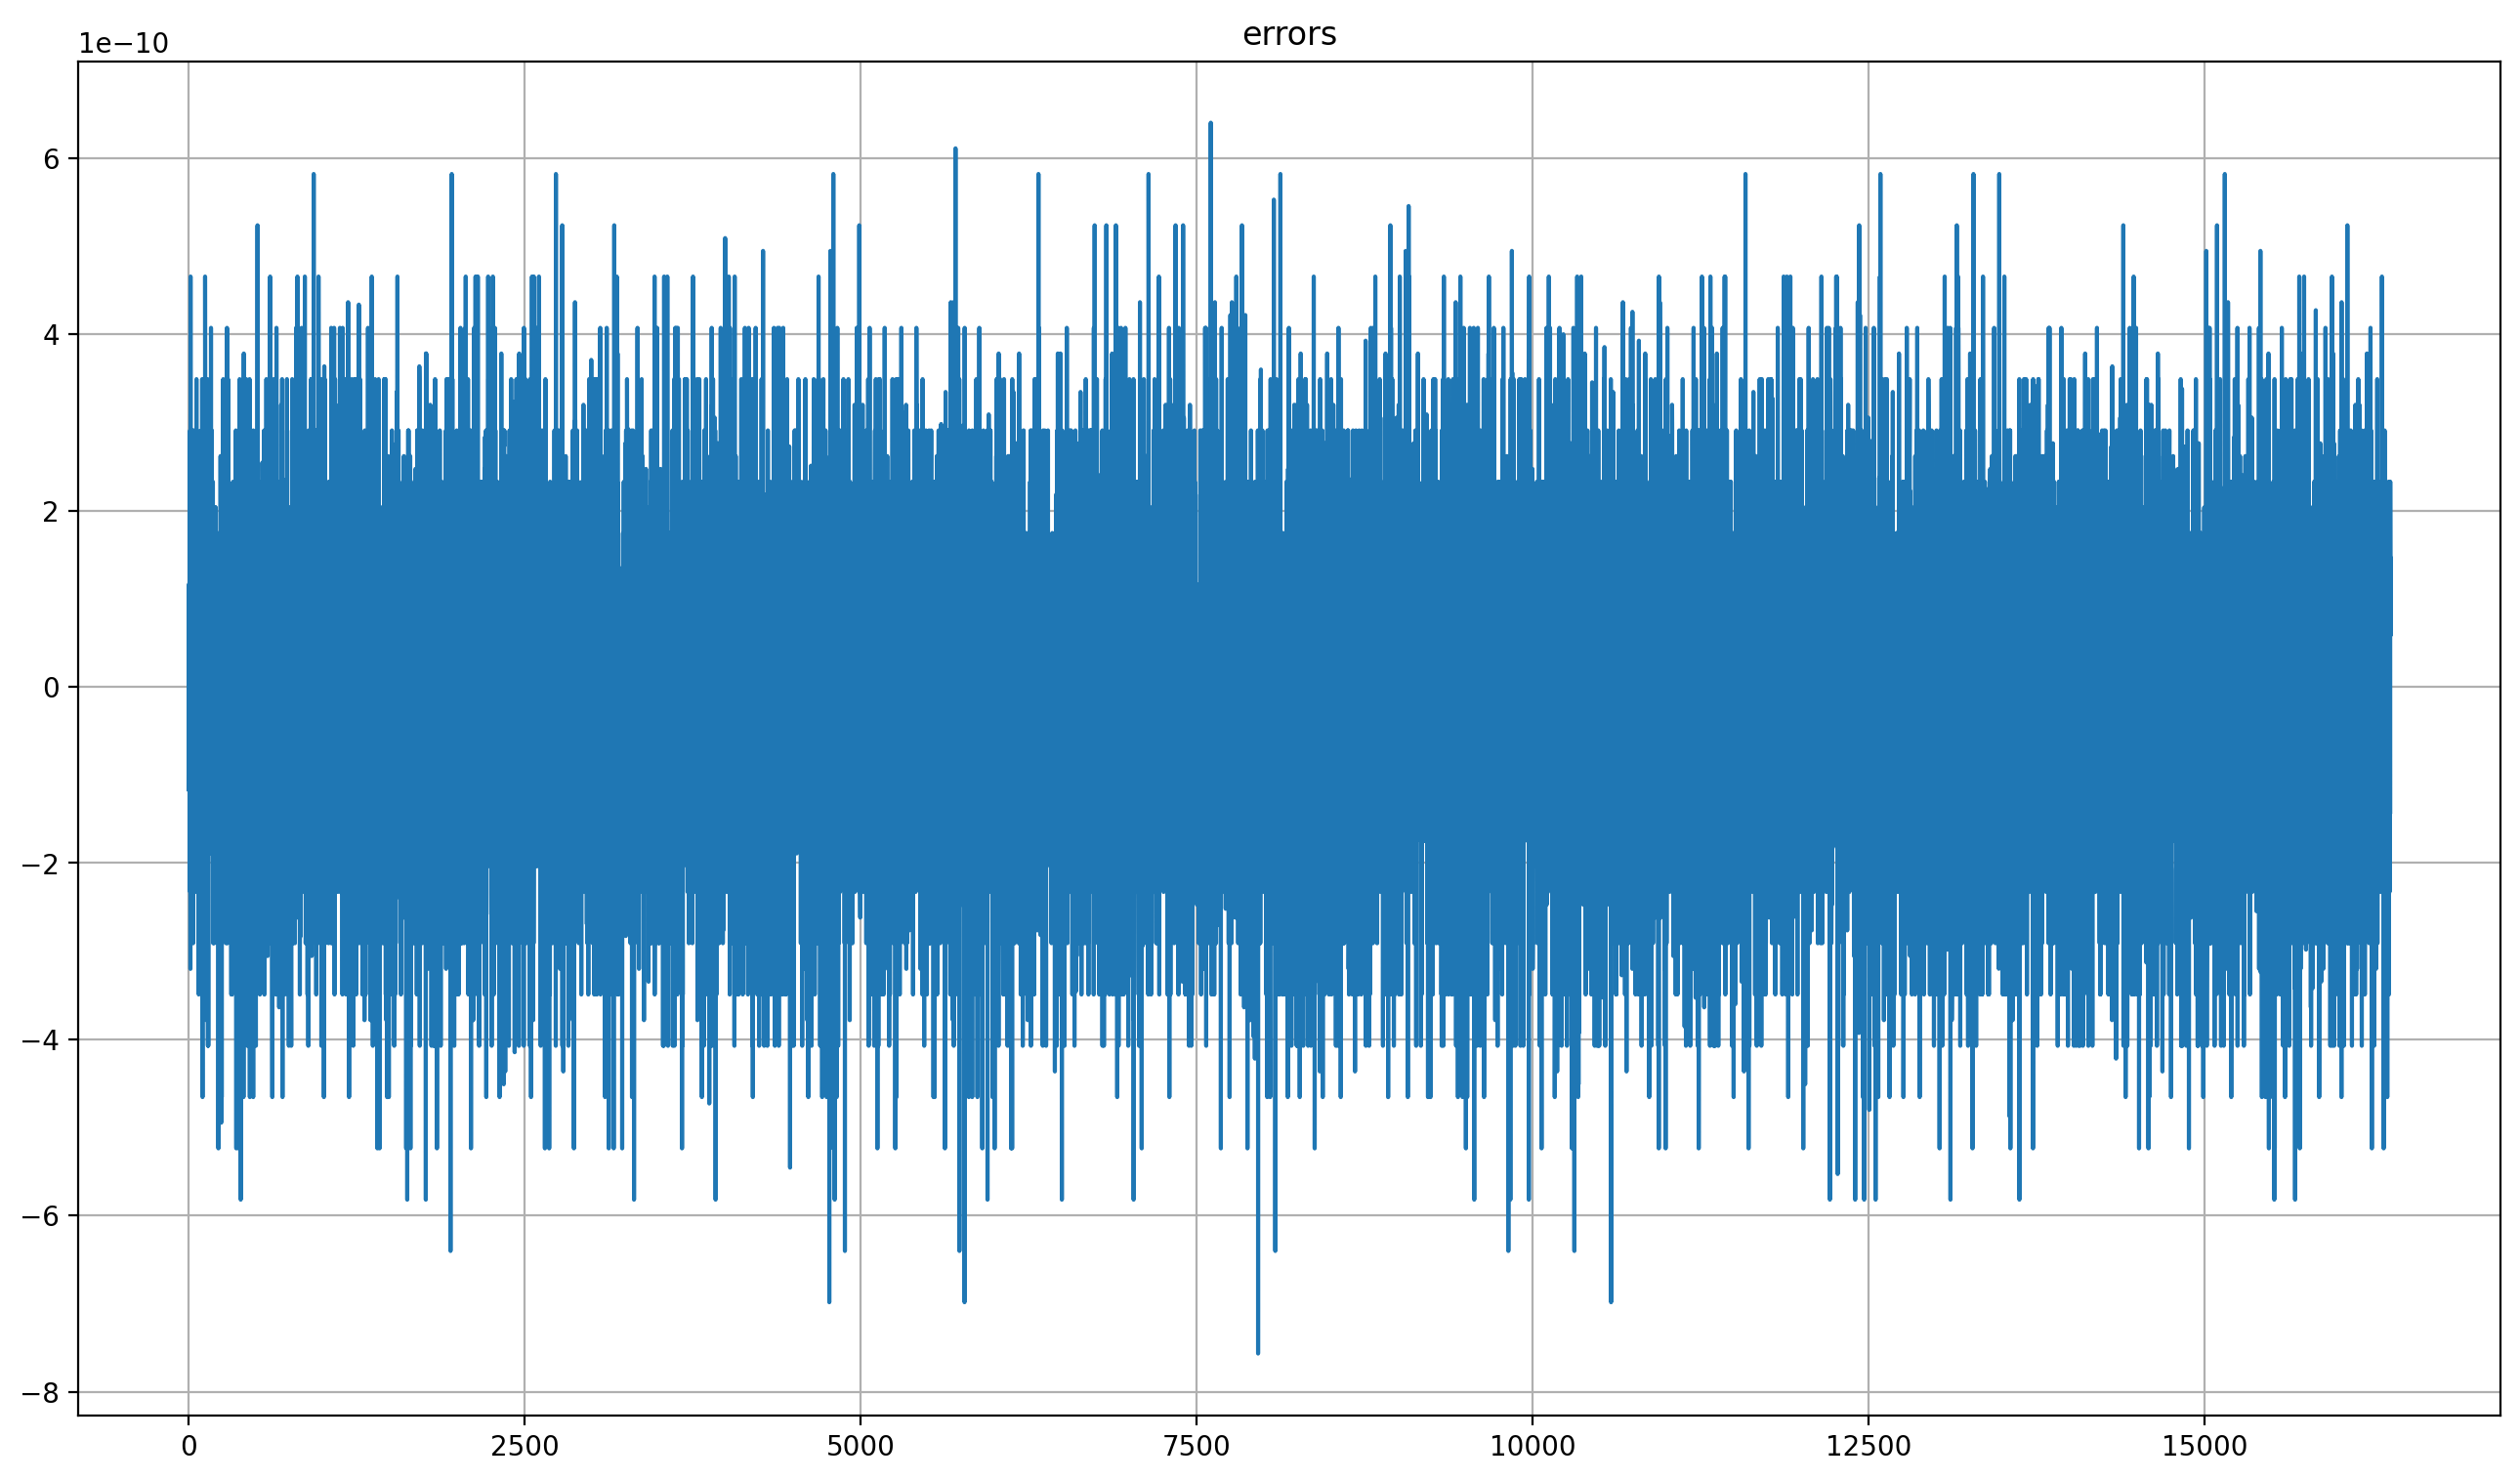

 -202331.6416323669 |  -202331.6416323670 |  -0.0000000001
 -495056.5097603008 |  -495056.5097603009 |  -0.0000000001
  344978.7765758324 |   344978.7765758325 |   0.0000000001
 -302248.3318157291 |  -302248.3318157292 |  -0.0000000001
 -287640.5841317273 |  -287640.5841317273 |   0.0000000000
  260198.3072470983 |   260198.3072470983 |   0.0000000000
  264257.4147834021 |   264257.4147834021 |  -0.0000000001
   32691.3301915436 |    32691.3301915435 |  -0.0000000001
 -108364.3291478422 |  -108364.3291478423 |  -0.0000000001
 -396483.6720636303 |  -396483.6720636304 |  -0.0000000001
mean	=	-0.000000000009379-0.000000000000276j
std	=	0.000000000273233
max err	=	0.000000009517665
min err	=	0.000000000000000
level	:	5


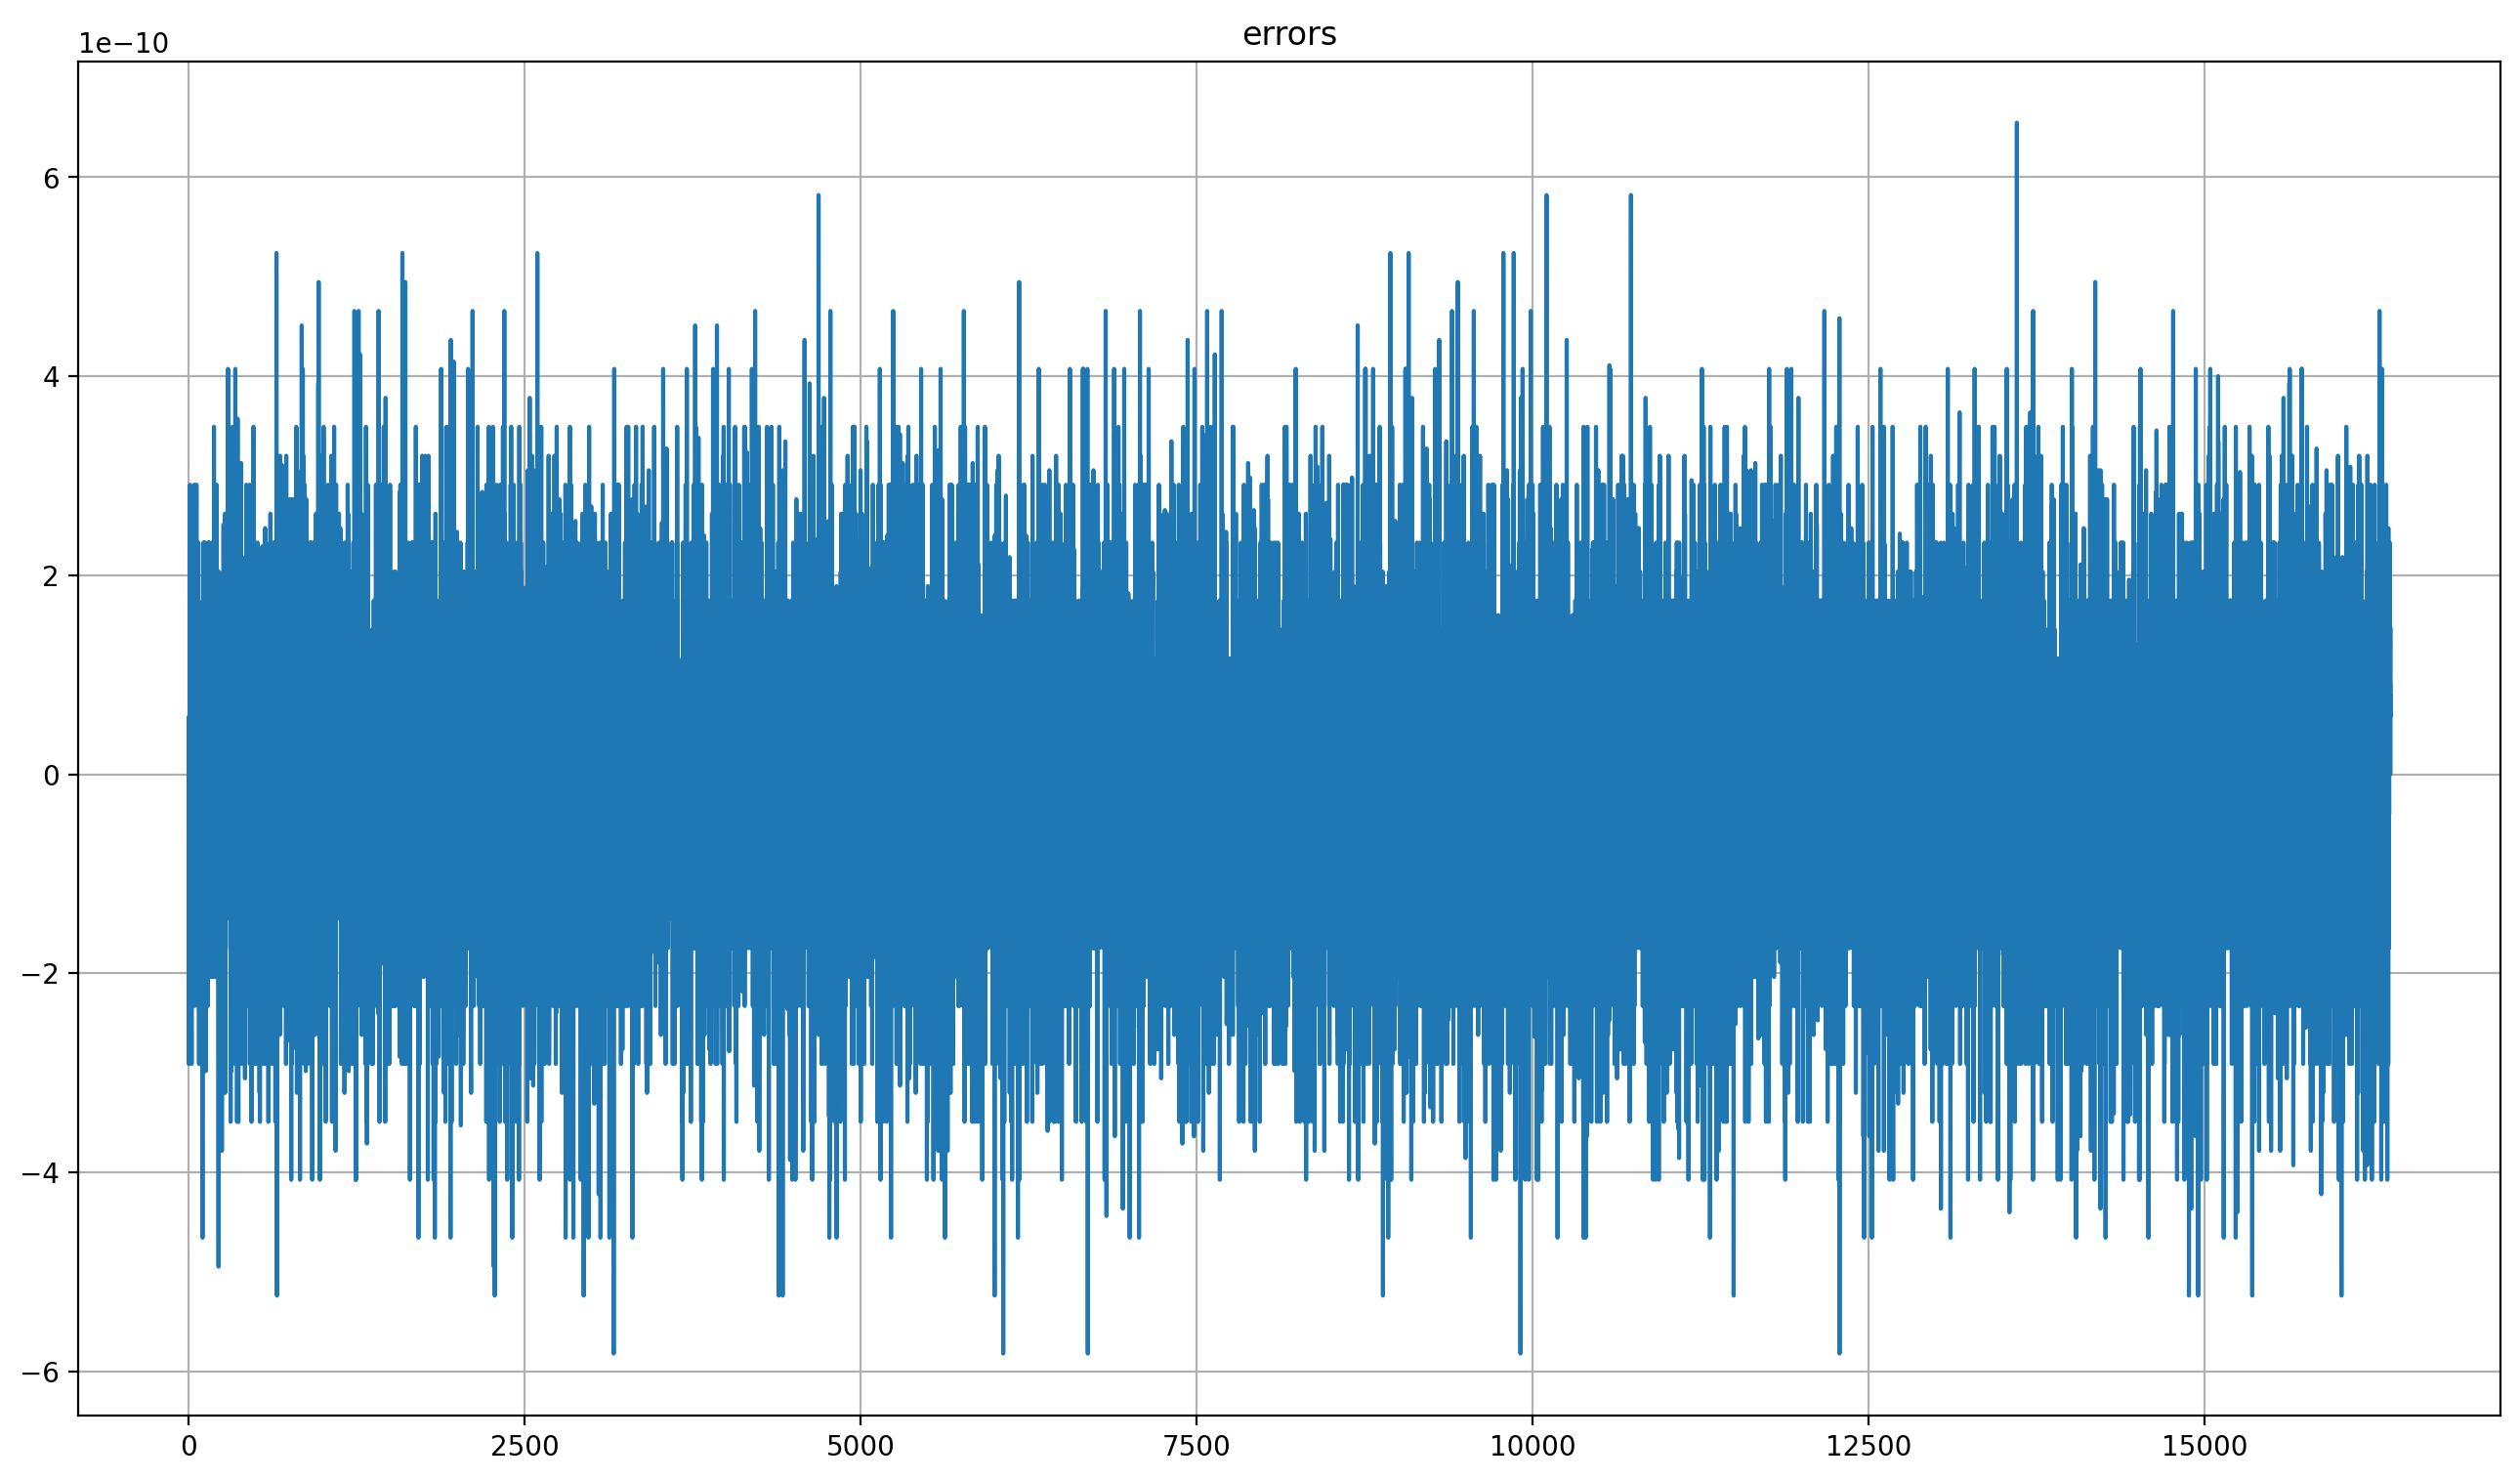

 -202331.6416323669 |  -202331.6416323670 |  -0.0000000001
 -495056.5097603008 |  -495056.5097603009 |  -0.0000000001
  344978.7765758324 |   344978.7765758321 |  -0.0000000003
 -302248.3318157291 |  -302248.3318157291 |   0.0000000000
 -287640.5841317273 |  -287640.5841317272 |   0.0000000001
  260198.3072470983 |   260198.3072470982 |  -0.0000000001
  264257.4147834021 |   264257.4147834022 |   0.0000000001
   32691.3301915436 |    32691.3301915435 |  -0.0000000001
 -108364.3291478422 |  -108364.3291478421 |   0.0000000001
 -396483.6720636303 |  -396483.6720636304 |  -0.0000000001
mean	=	-0.000000000008946-0.000000000001516j
std	=	0.000000000236279
max err	=	0.000000009458924
min err	=	0.000000000000000
level	:	6


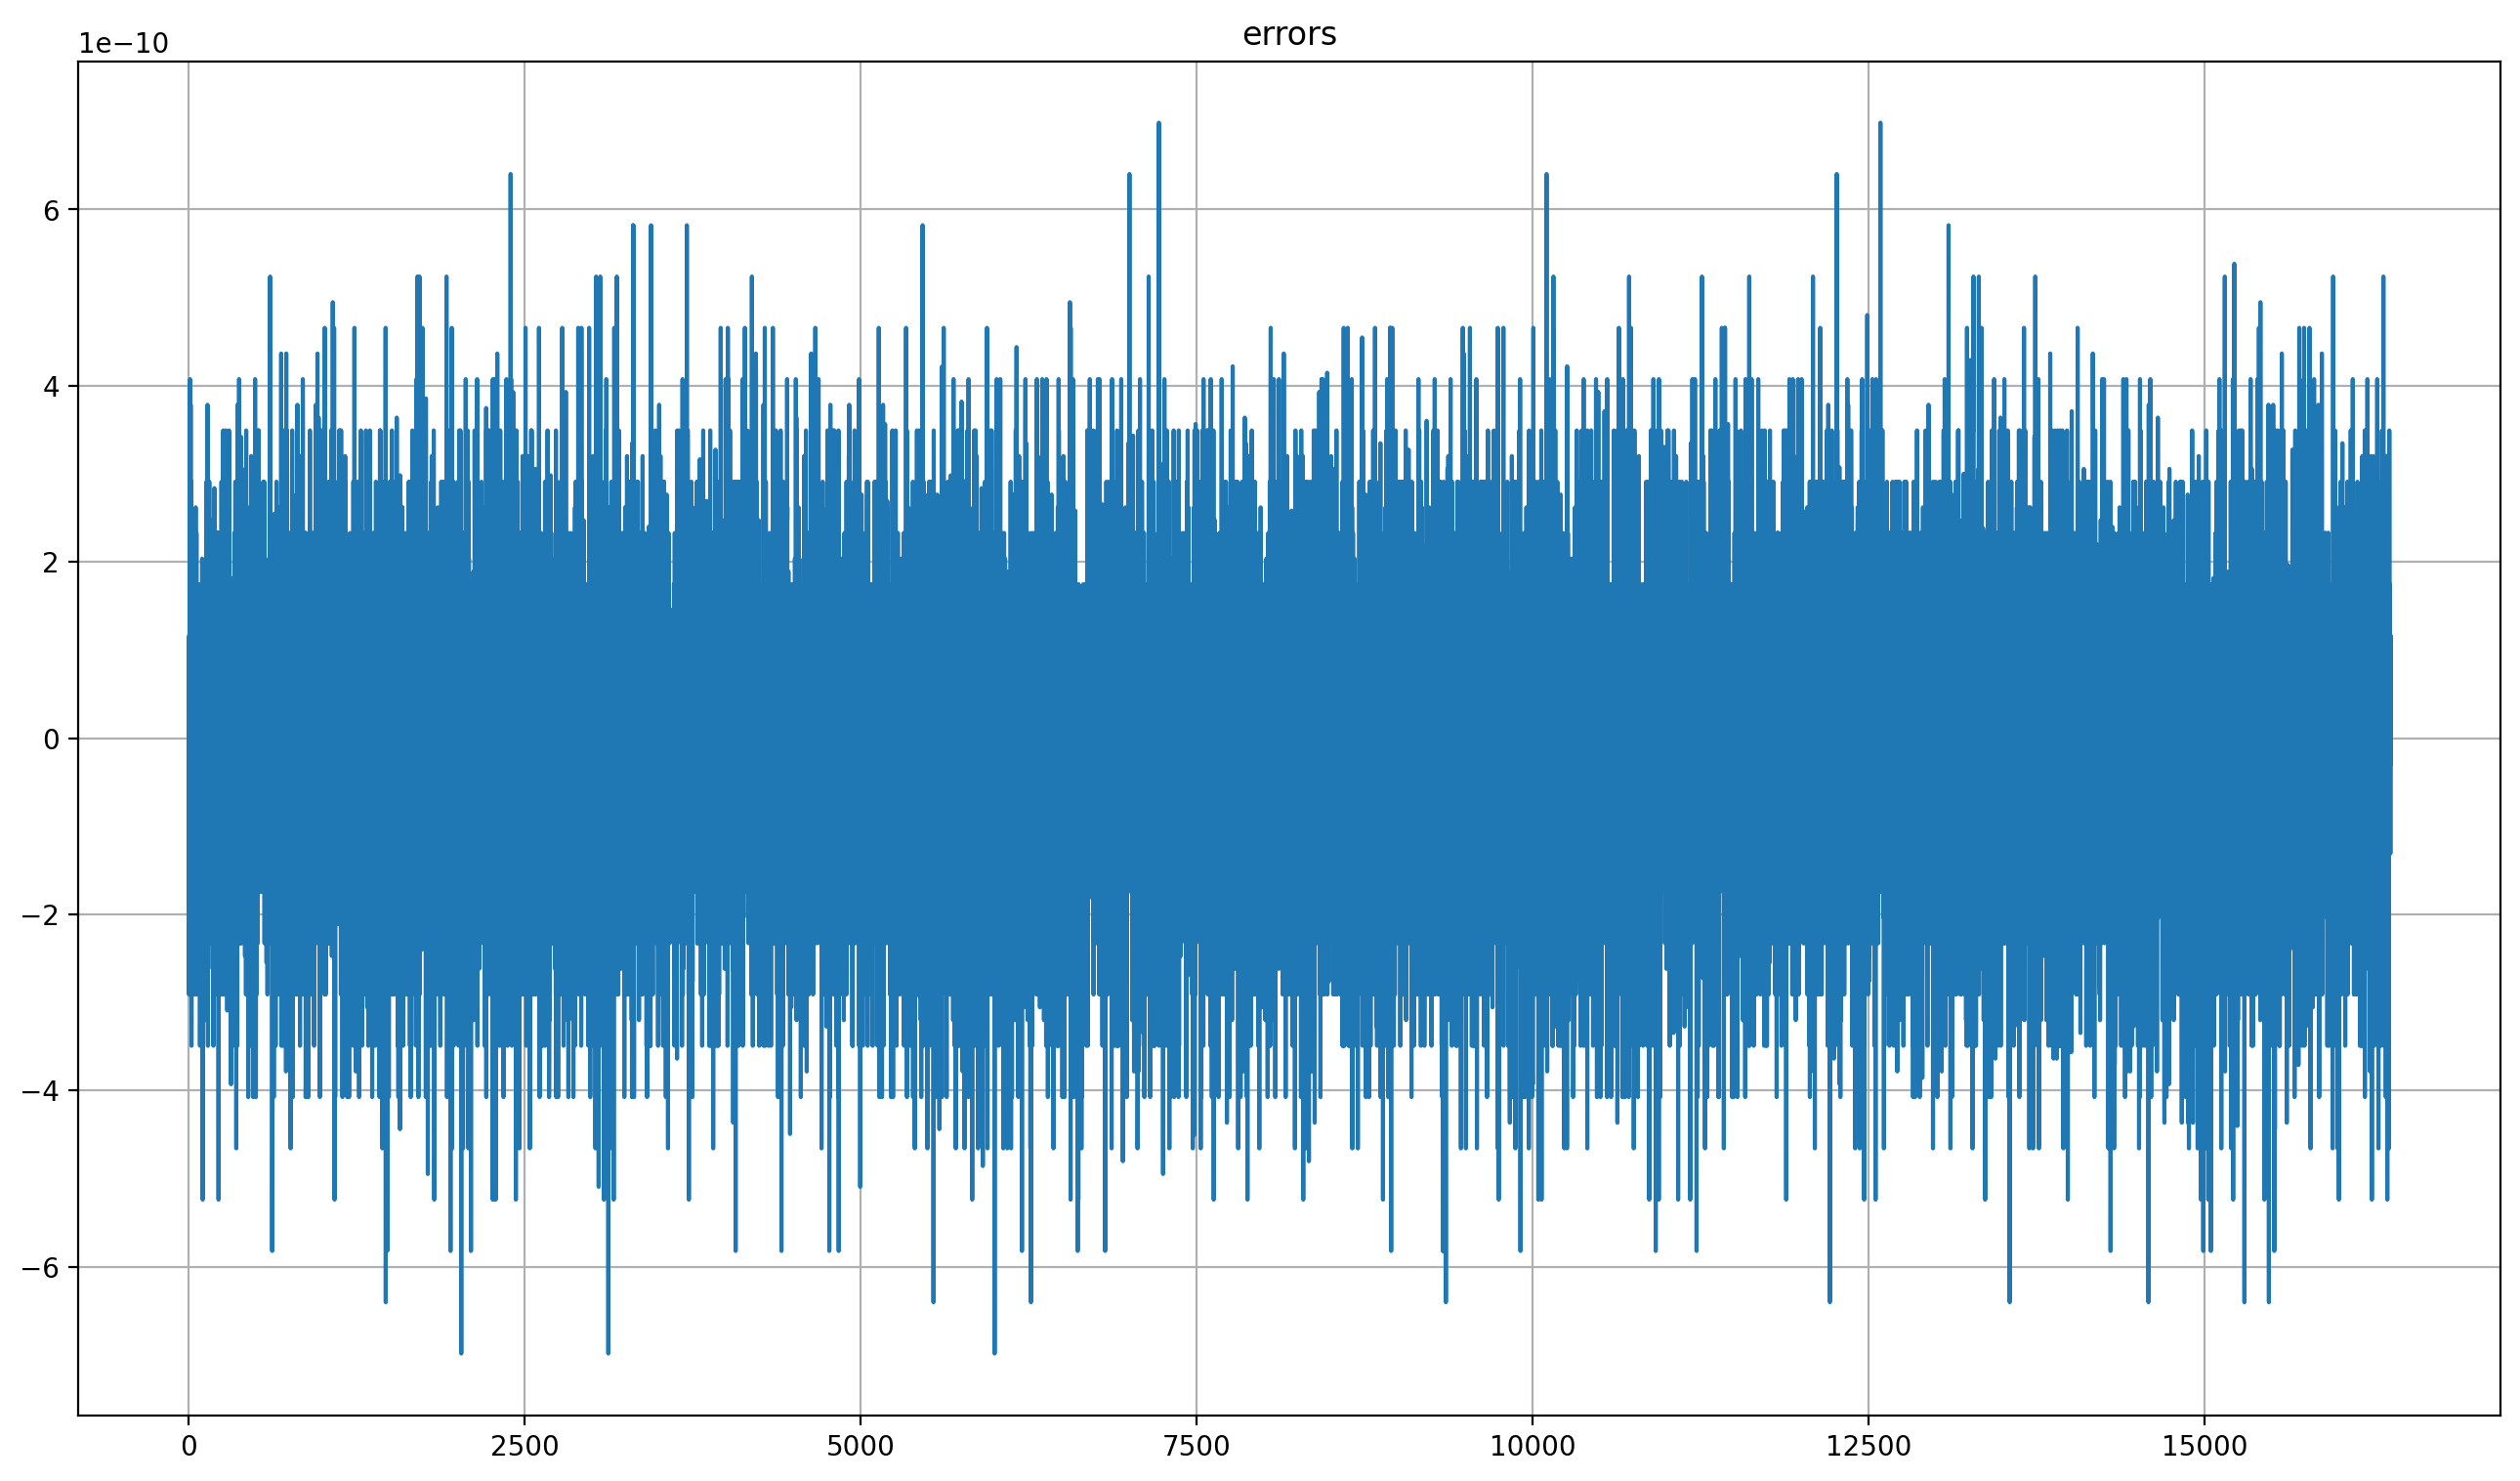

 -202331.6416323669 |  -202331.6416323669 |  -0.0000000000
 -495056.5097603008 |  -495056.5097603008 |   0.0000000000
  344978.7765758324 |   344978.7765758322 |  -0.0000000002
 -302248.3318157291 |  -302248.3318157294 |  -0.0000000003
 -287640.5841317273 |  -287640.5841317272 |   0.0000000001
  260198.3072470983 |   260198.3072470981 |  -0.0000000002
  264257.4147834021 |   264257.4147834021 |  -0.0000000001
   32691.3301915436 |    32691.3301915436 |   0.0000000000
 -108364.3291478422 |  -108364.3291478424 |  -0.0000000002
 -396483.6720636303 |  -396483.6720636303 |   0.0000000000
mean	=	-0.000000000009227-0.000000000000483j
std	=	0.000000000267614
max err	=	0.000000009400582
min err	=	0.000000000000000
level	:	7


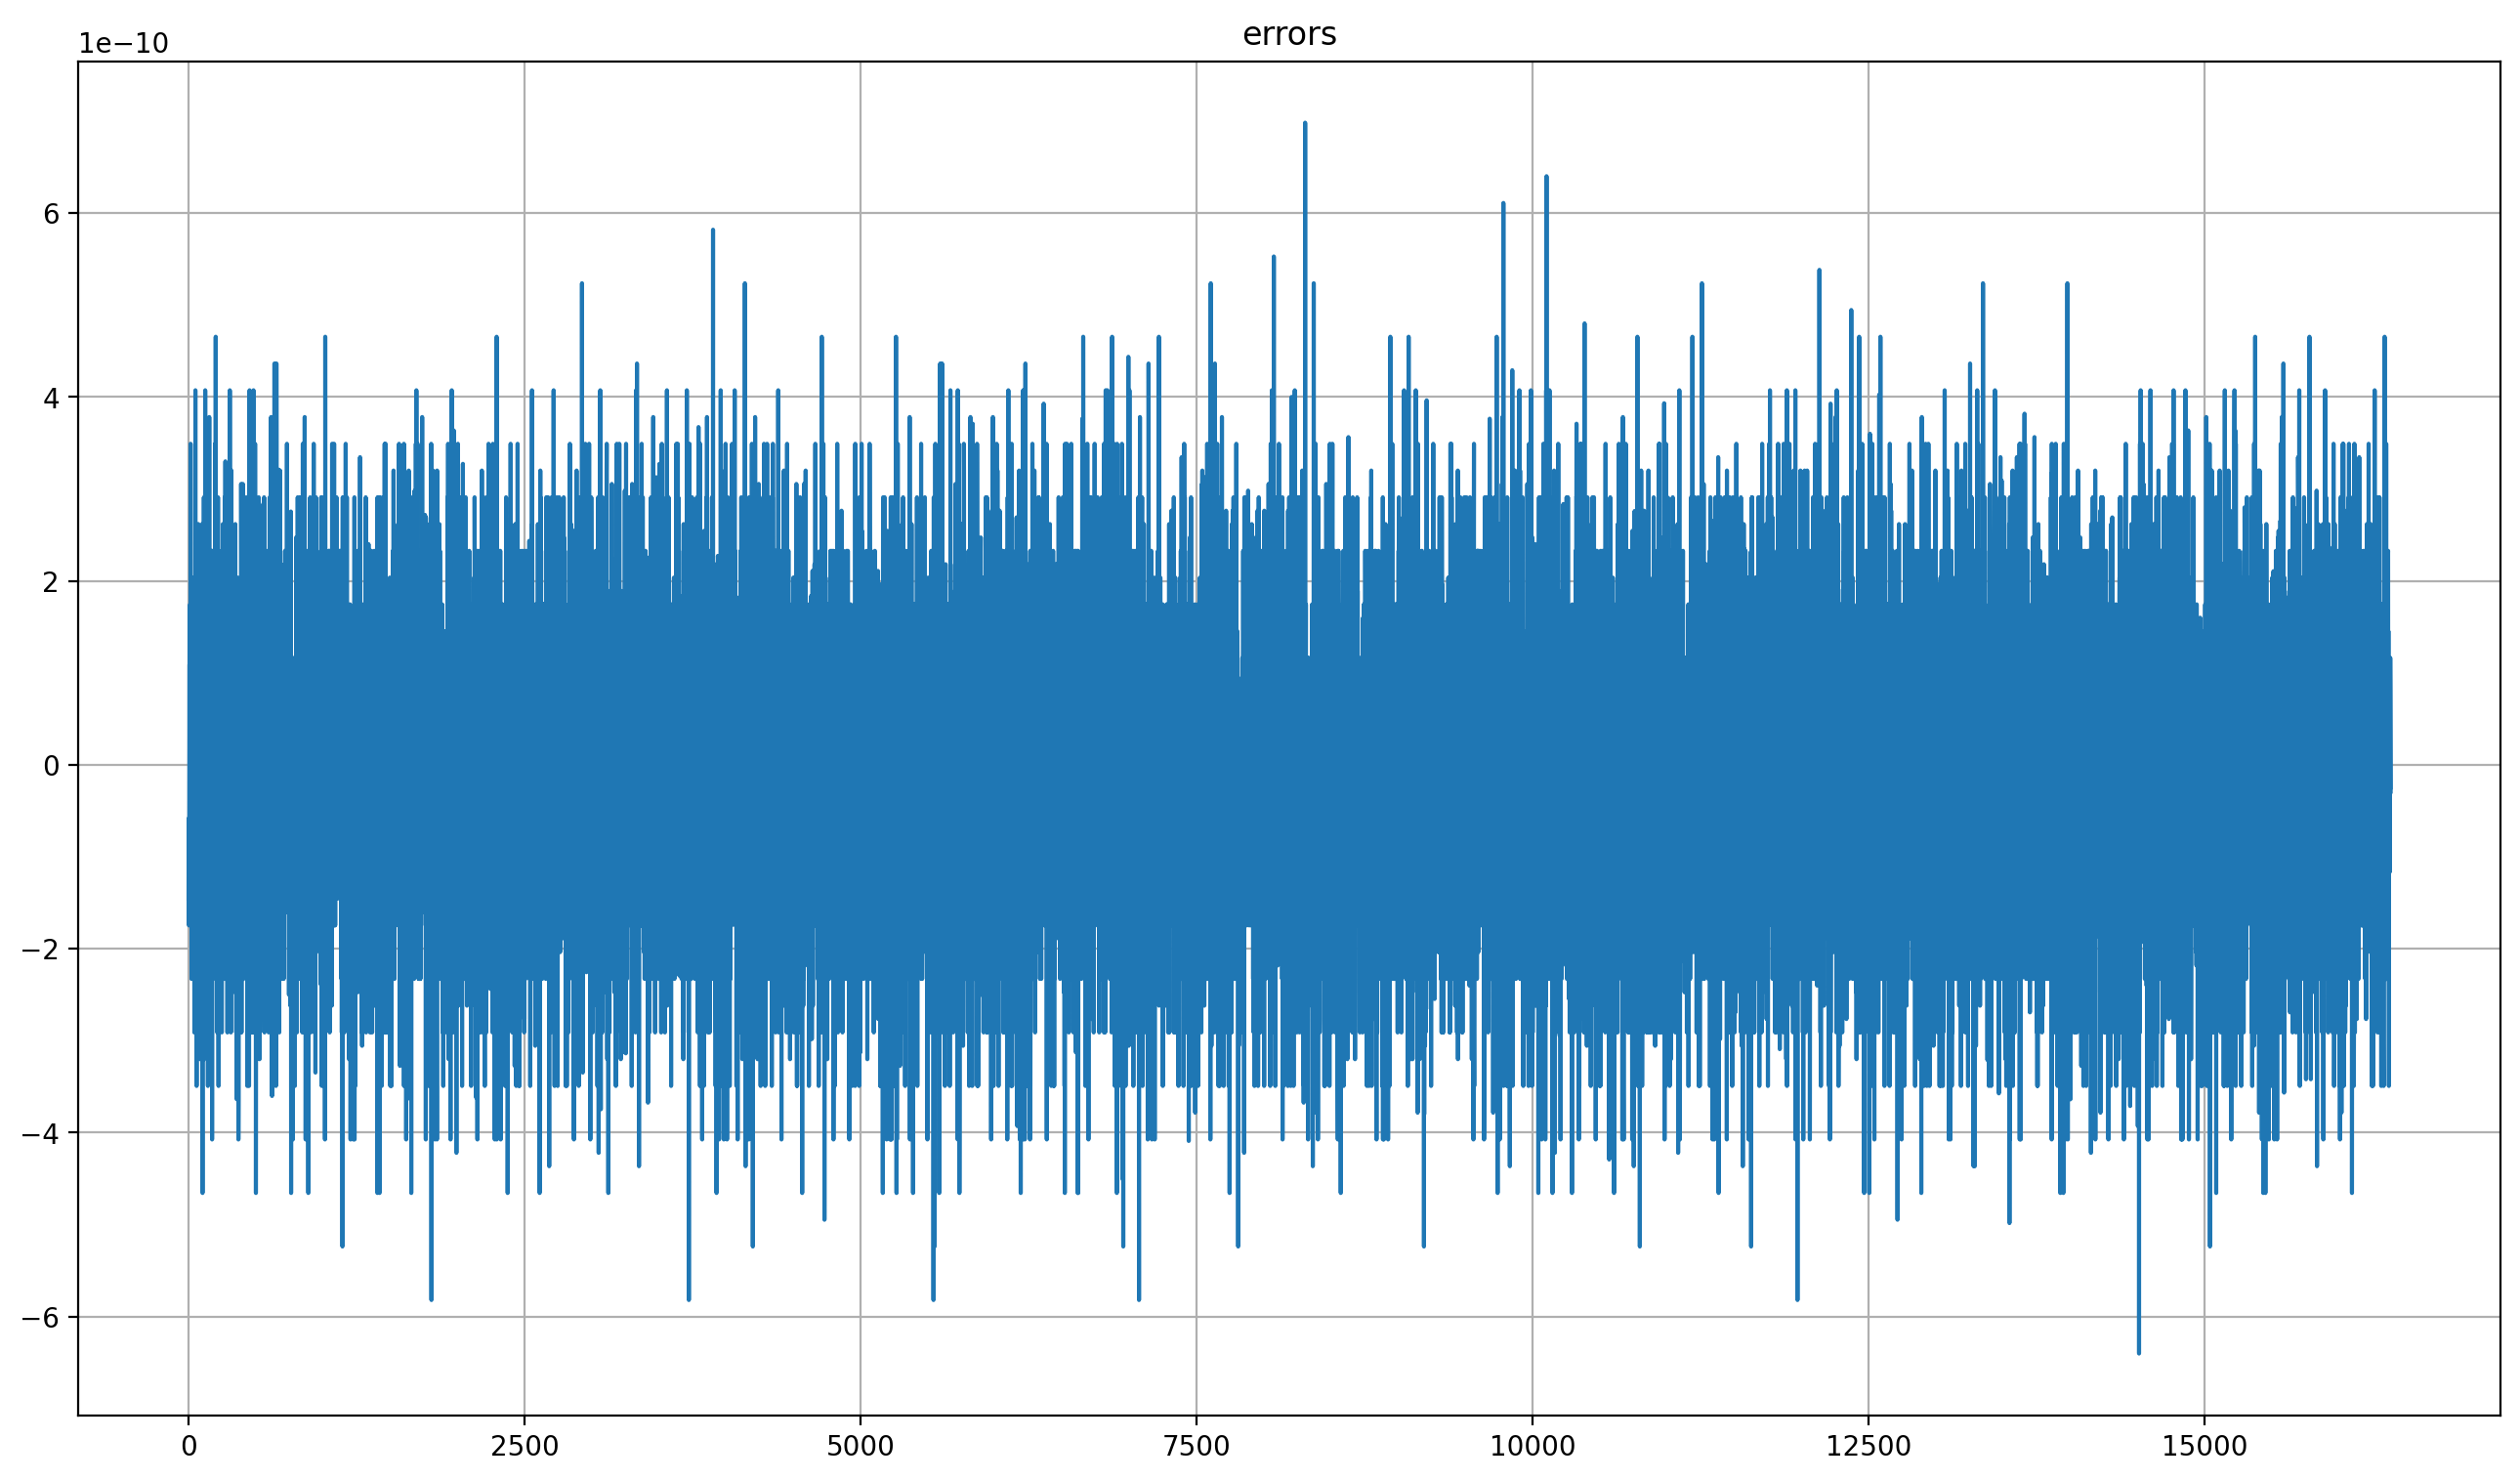

 -202331.6416323669 |  -202331.6416323670 |  -0.0000000001
 -495056.5097603008 |  -495056.5097603009 |  -0.0000000001
  344978.7765758324 |   344978.7765758323 |  -0.0000000001
 -302248.3318157291 |  -302248.3318157293 |  -0.0000000002
 -287640.5841317273 |  -287640.5841317274 |  -0.0000000001
  260198.3072470983 |   260198.3072470982 |  -0.0000000001
  264257.4147834021 |   264257.4147834022 |   0.0000000001
   32691.3301915436 |    32691.3301915437 |   0.0000000001
 -108364.3291478422 |  -108364.3291478422 |  -0.0000000000
 -396483.6720636303 |  -396483.6720636303 |   0.0000000000
mean	=	-0.000000000010399-0.000000000000685j
std	=	0.000000000241654
max err	=	0.000000009605366
min err	=	0.000000000000000
level	:	8


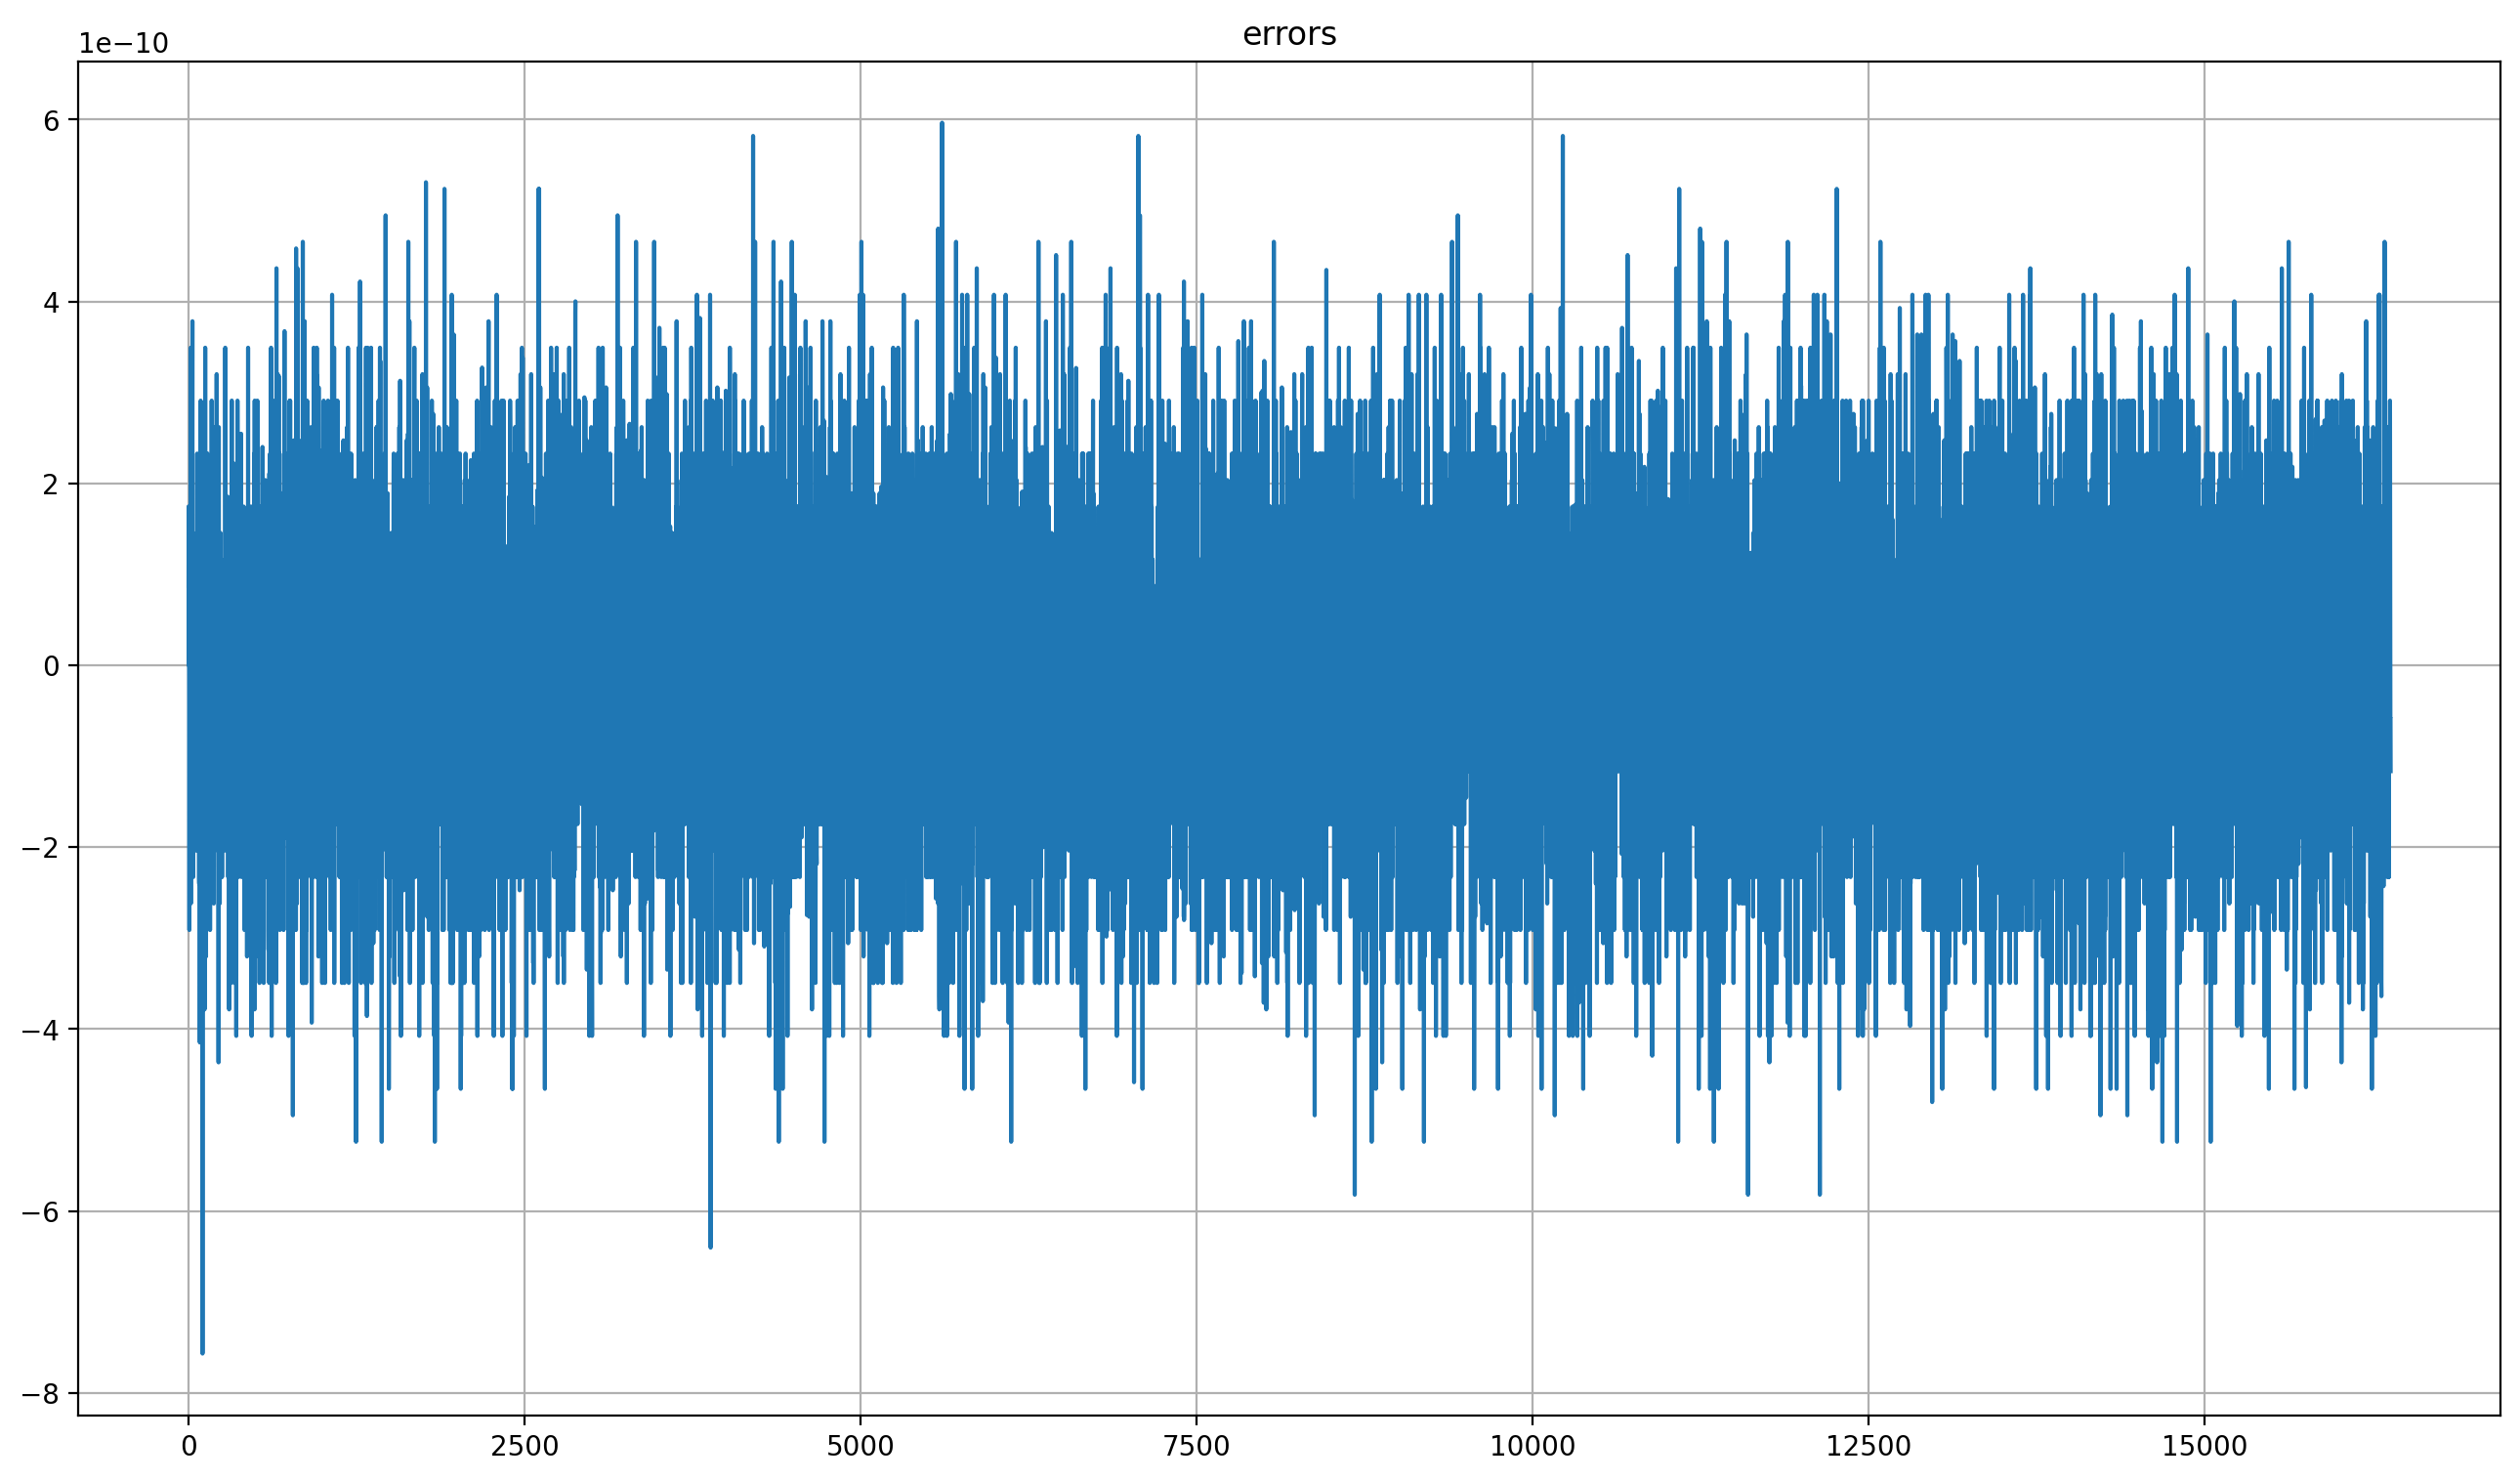

 -202331.6416323669 |  -202331.6416323668 |   0.0000000001
 -495056.5097603008 |  -495056.5097603006 |   0.0000000002
  344978.7765758324 |   344978.7765758324 |   0.0000000000
 -302248.3318157291 |  -302248.3318157290 |   0.0000000001
 -287640.5841317273 |  -287640.5841317271 |   0.0000000002
  260198.3072470983 |   260198.3072470982 |  -0.0000000001
  264257.4147834021 |   264257.4147834018 |  -0.0000000003
   32691.3301915436 |    32691.3301915436 |   0.0000000000
 -108364.3291478422 |  -108364.3291478423 |  -0.0000000001
 -396483.6720636303 |  -396483.6720636304 |  -0.0000000001
mean	=	-0.000000000009990-0.000000000002265j
std	=	0.000000000235535
max err	=	0.000000009459148
min err	=	0.000000000000000
level	:	9


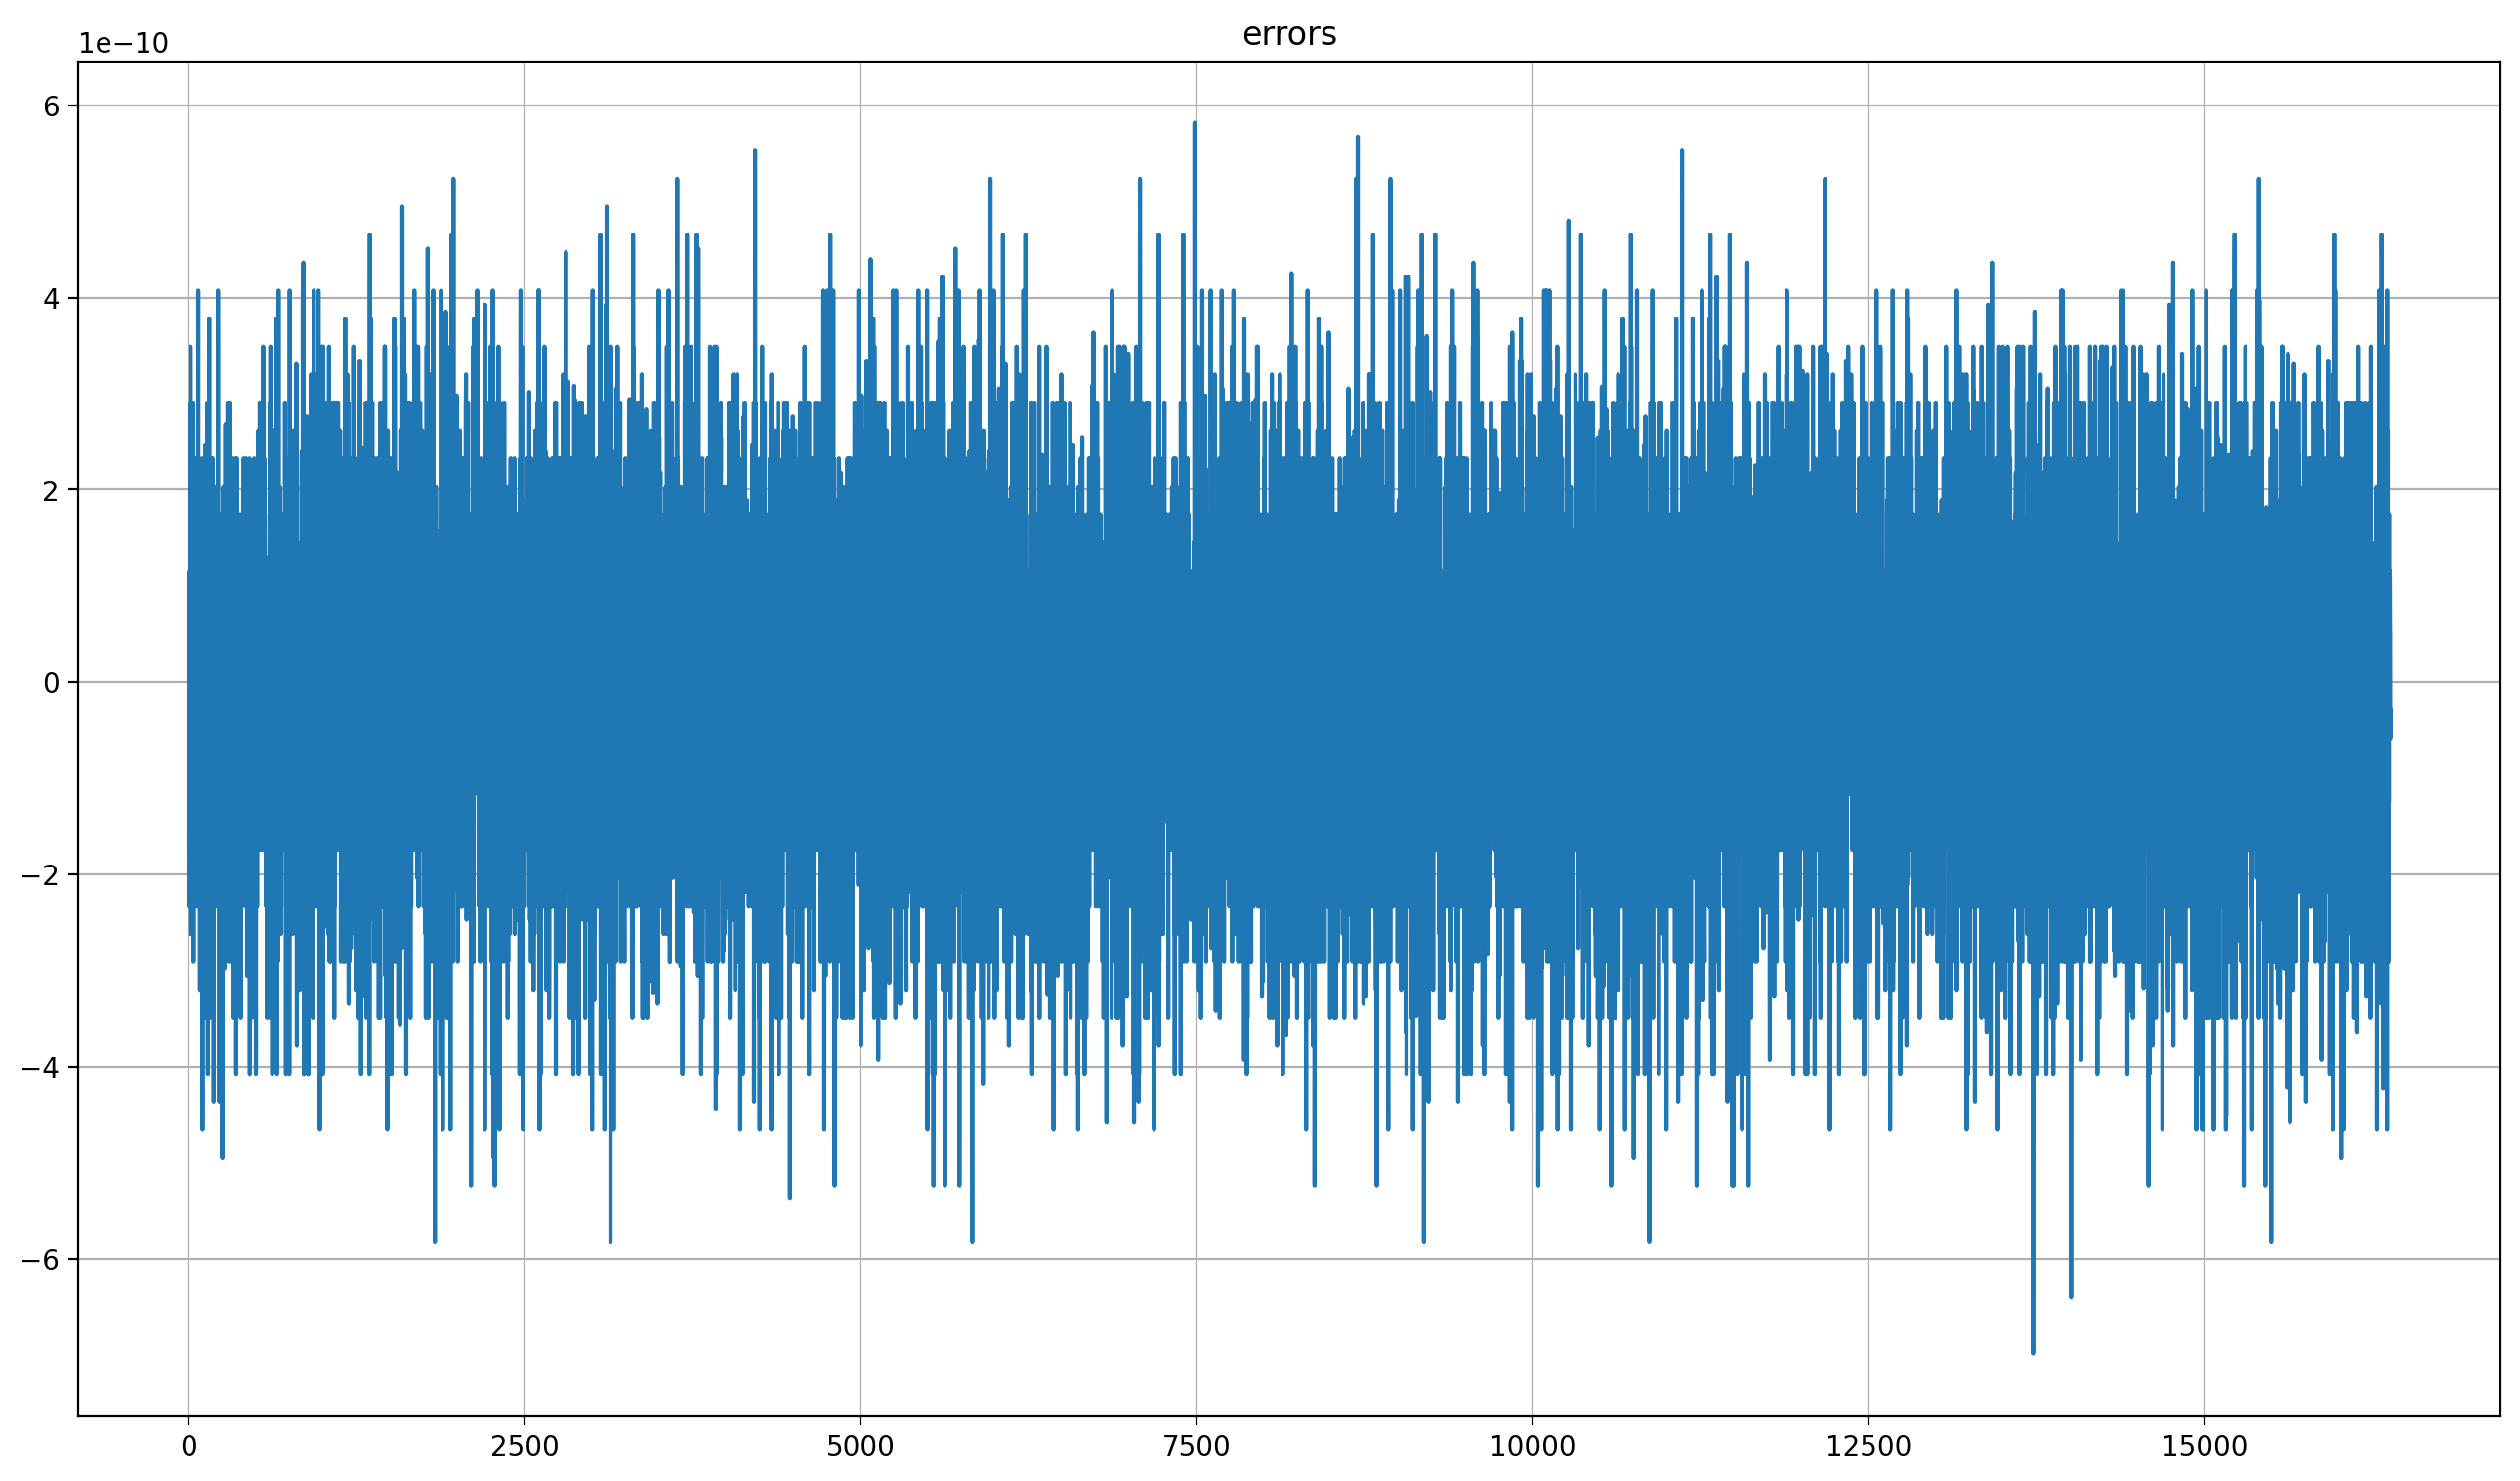

 -202331.6416323669 |  -202331.6416323671 |  -0.0000000002
 -495056.5097603008 |  -495056.5097603007 |   0.0000000001
  344978.7765758324 |   344978.7765758324 |   0.0000000000
 -302248.3318157291 |  -302248.3318157293 |  -0.0000000002
 -287640.5841317273 |  -287640.5841317272 |   0.0000000001
  260198.3072470983 |   260198.3072470982 |  -0.0000000001
  264257.4147834021 |   264257.4147834021 |  -0.0000000001
   32691.3301915436 |    32691.3301915436 |   0.0000000000
 -108364.3291478422 |  -108364.3291478424 |  -0.0000000002
 -396483.6720636303 |  -396483.6720636305 |  -0.0000000002
mean	=	-0.000000000009225-0.000000000000943j
std	=	0.000000000240659
max err	=	0.000000009518554
min err	=	0.000000000000000
level	:	10


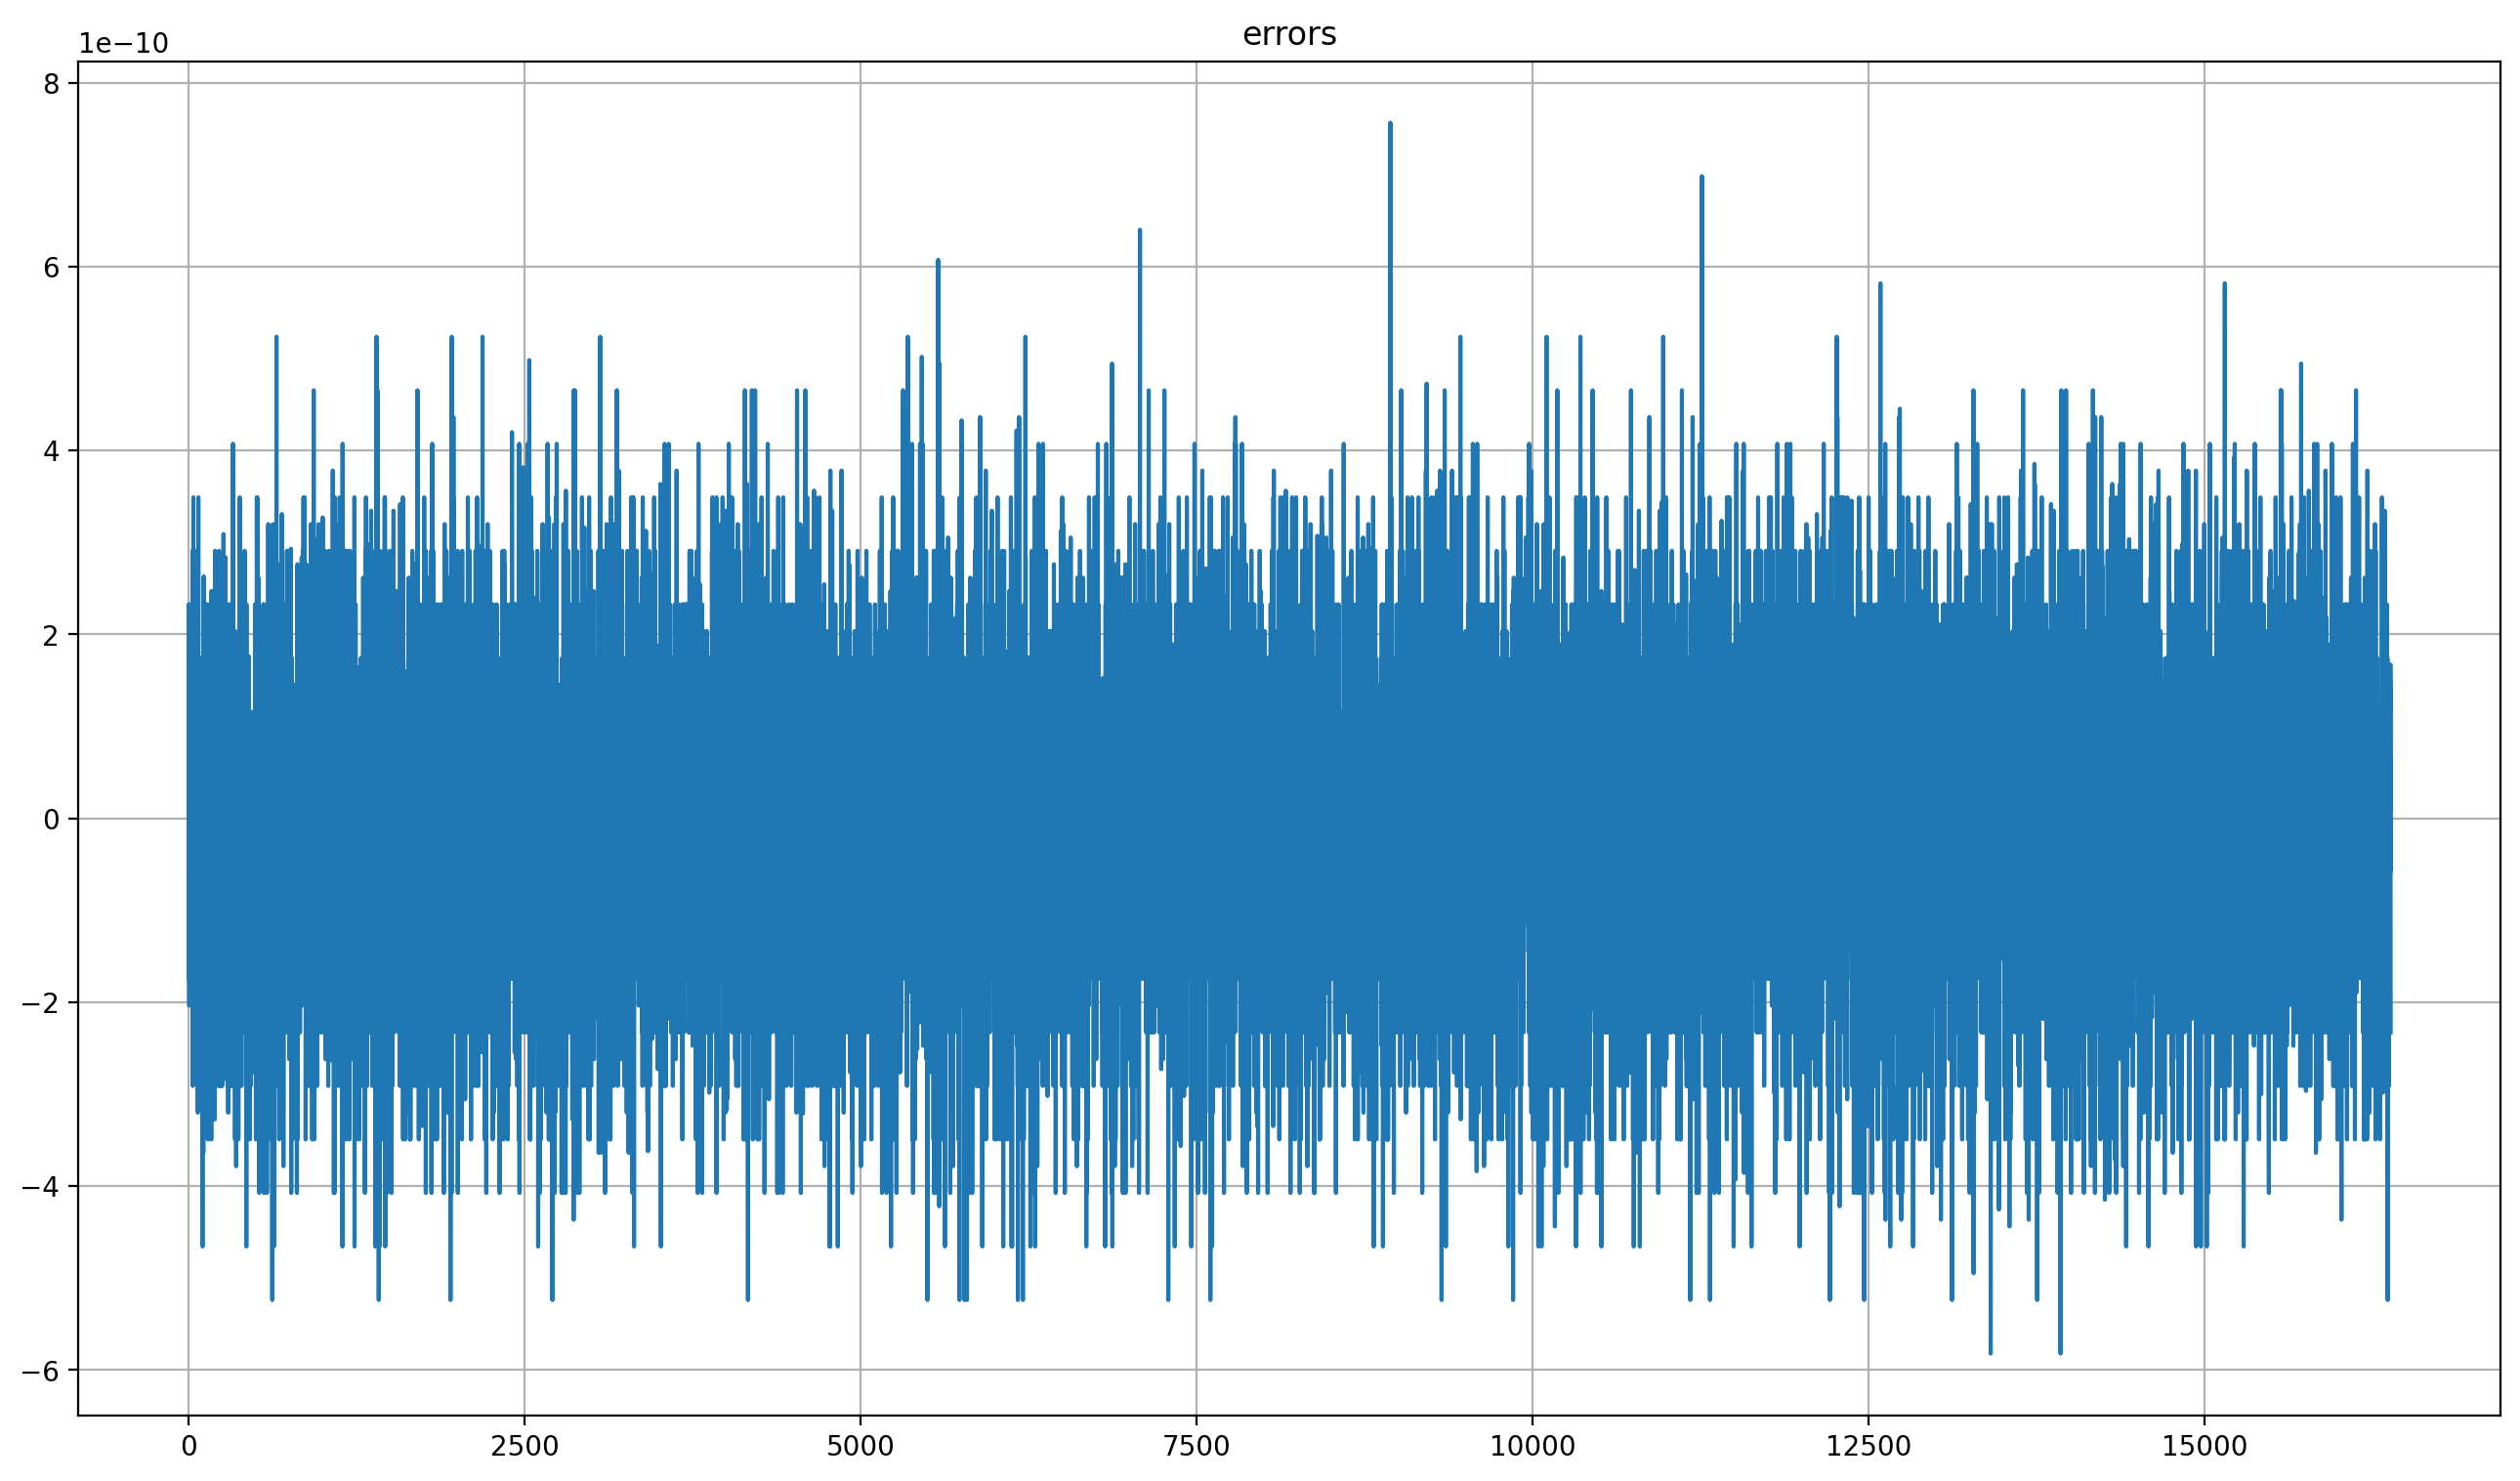

 -202331.6416323669 |  -202331.6416323670 |  -0.0000000001
 -495056.5097603008 |  -495056.5097603006 |   0.0000000002
  344978.7765758324 |   344978.7765758323 |  -0.0000000001
 -302248.3318157291 |  -302248.3318157293 |  -0.0000000002
 -287640.5841317273 |  -287640.5841317271 |   0.0000000002
  260198.3072470983 |   260198.3072470981 |  -0.0000000002
  264257.4147834021 |   264257.4147834021 |   0.0000000000
   32691.3301915436 |    32691.3301915436 |   0.0000000000
 -108364.3291478422 |  -108364.3291478421 |   0.0000000001
 -396483.6720636303 |  -396483.6720636305 |  -0.0000000002
mean	=	-0.000000000008521-0.000000000000346j
std	=	0.000000000245064
max err	=	0.000000009488027
min err	=	0.000000000000000
level	:	11


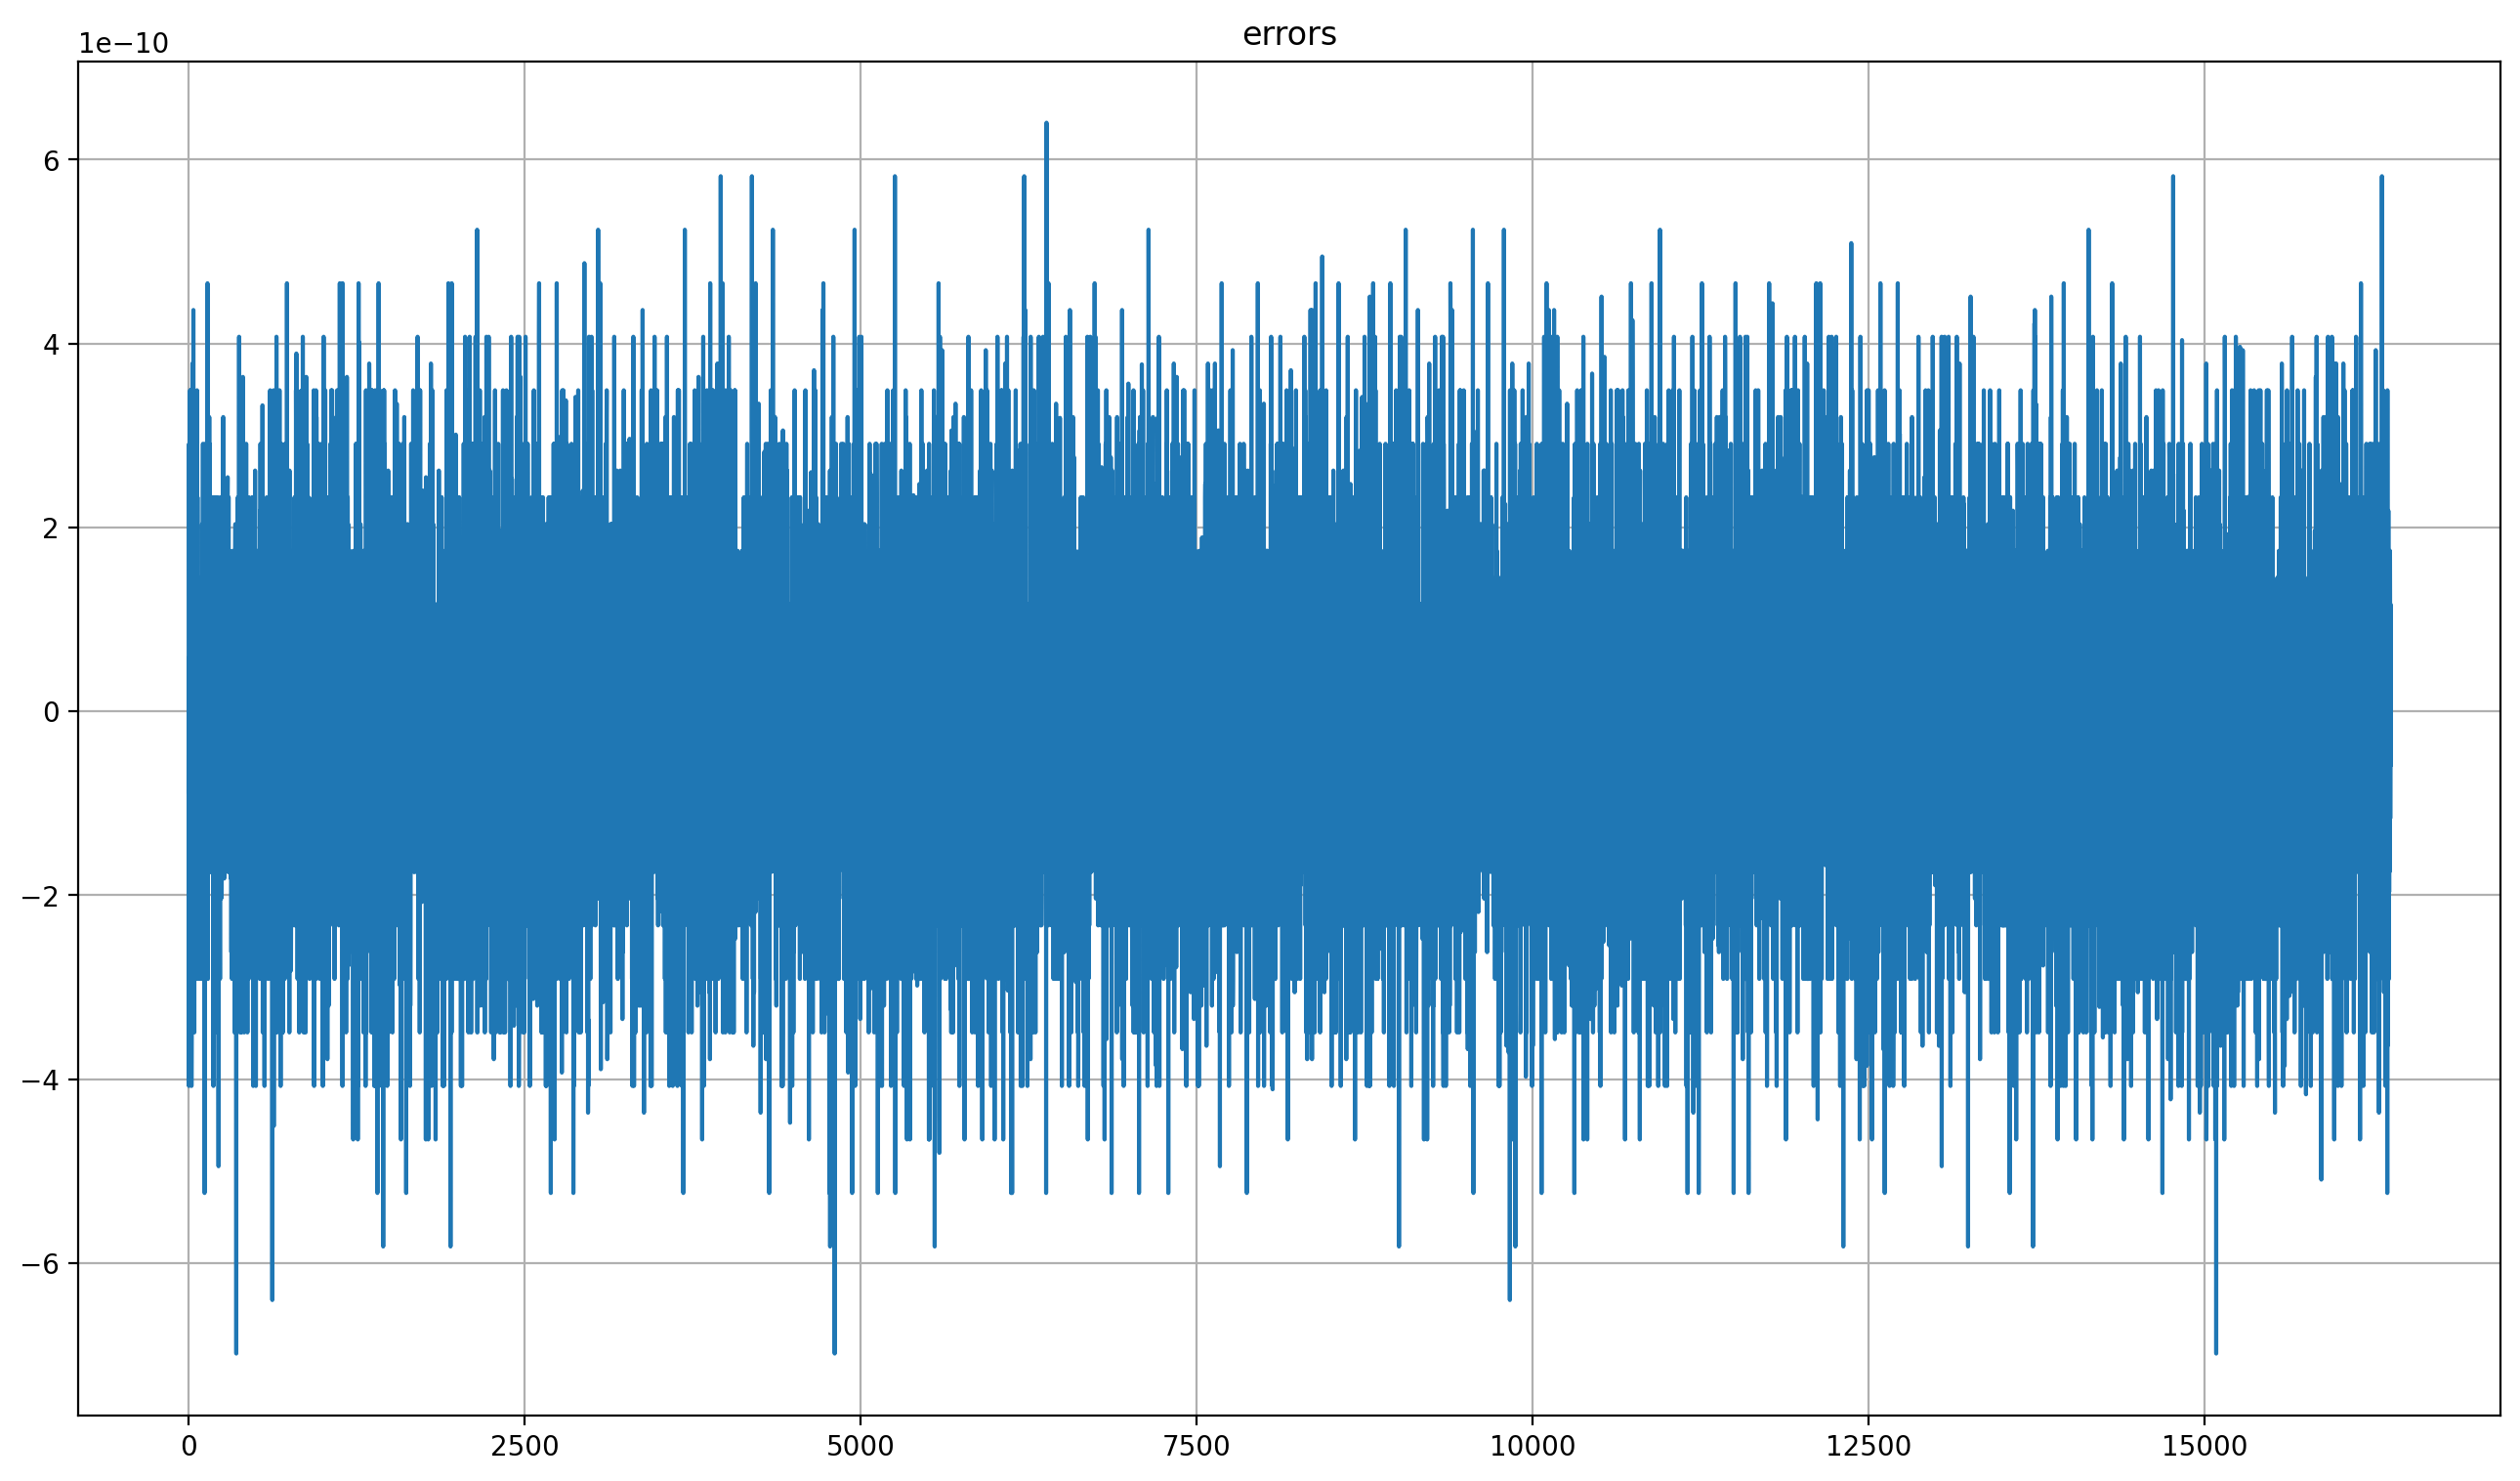

 -202331.6416323669 |  -202331.6416323670 |  -0.0000000001
 -495056.5097603008 |  -495056.5097603007 |   0.0000000001
  344978.7765758324 |   344978.7765758322 |  -0.0000000002
 -302248.3318157291 |  -302248.3318157295 |  -0.0000000004
 -287640.5841317273 |  -287640.5841317270 |   0.0000000003
  260198.3072470983 |   260198.3072470983 |  -0.0000000000
  264257.4147834021 |   264257.4147834021 |   0.0000000000
   32691.3301915436 |    32691.3301915436 |  -0.0000000000
 -108364.3291478422 |  -108364.3291478423 |  -0.0000000001
 -396483.6720636303 |  -396483.6720636304 |  -0.0000000001
mean	=	-0.000000000009518-0.000000000000760j
std	=	0.000000000255340
max err	=	0.000000009430045
min err	=	0.000000000000000
level	:	12


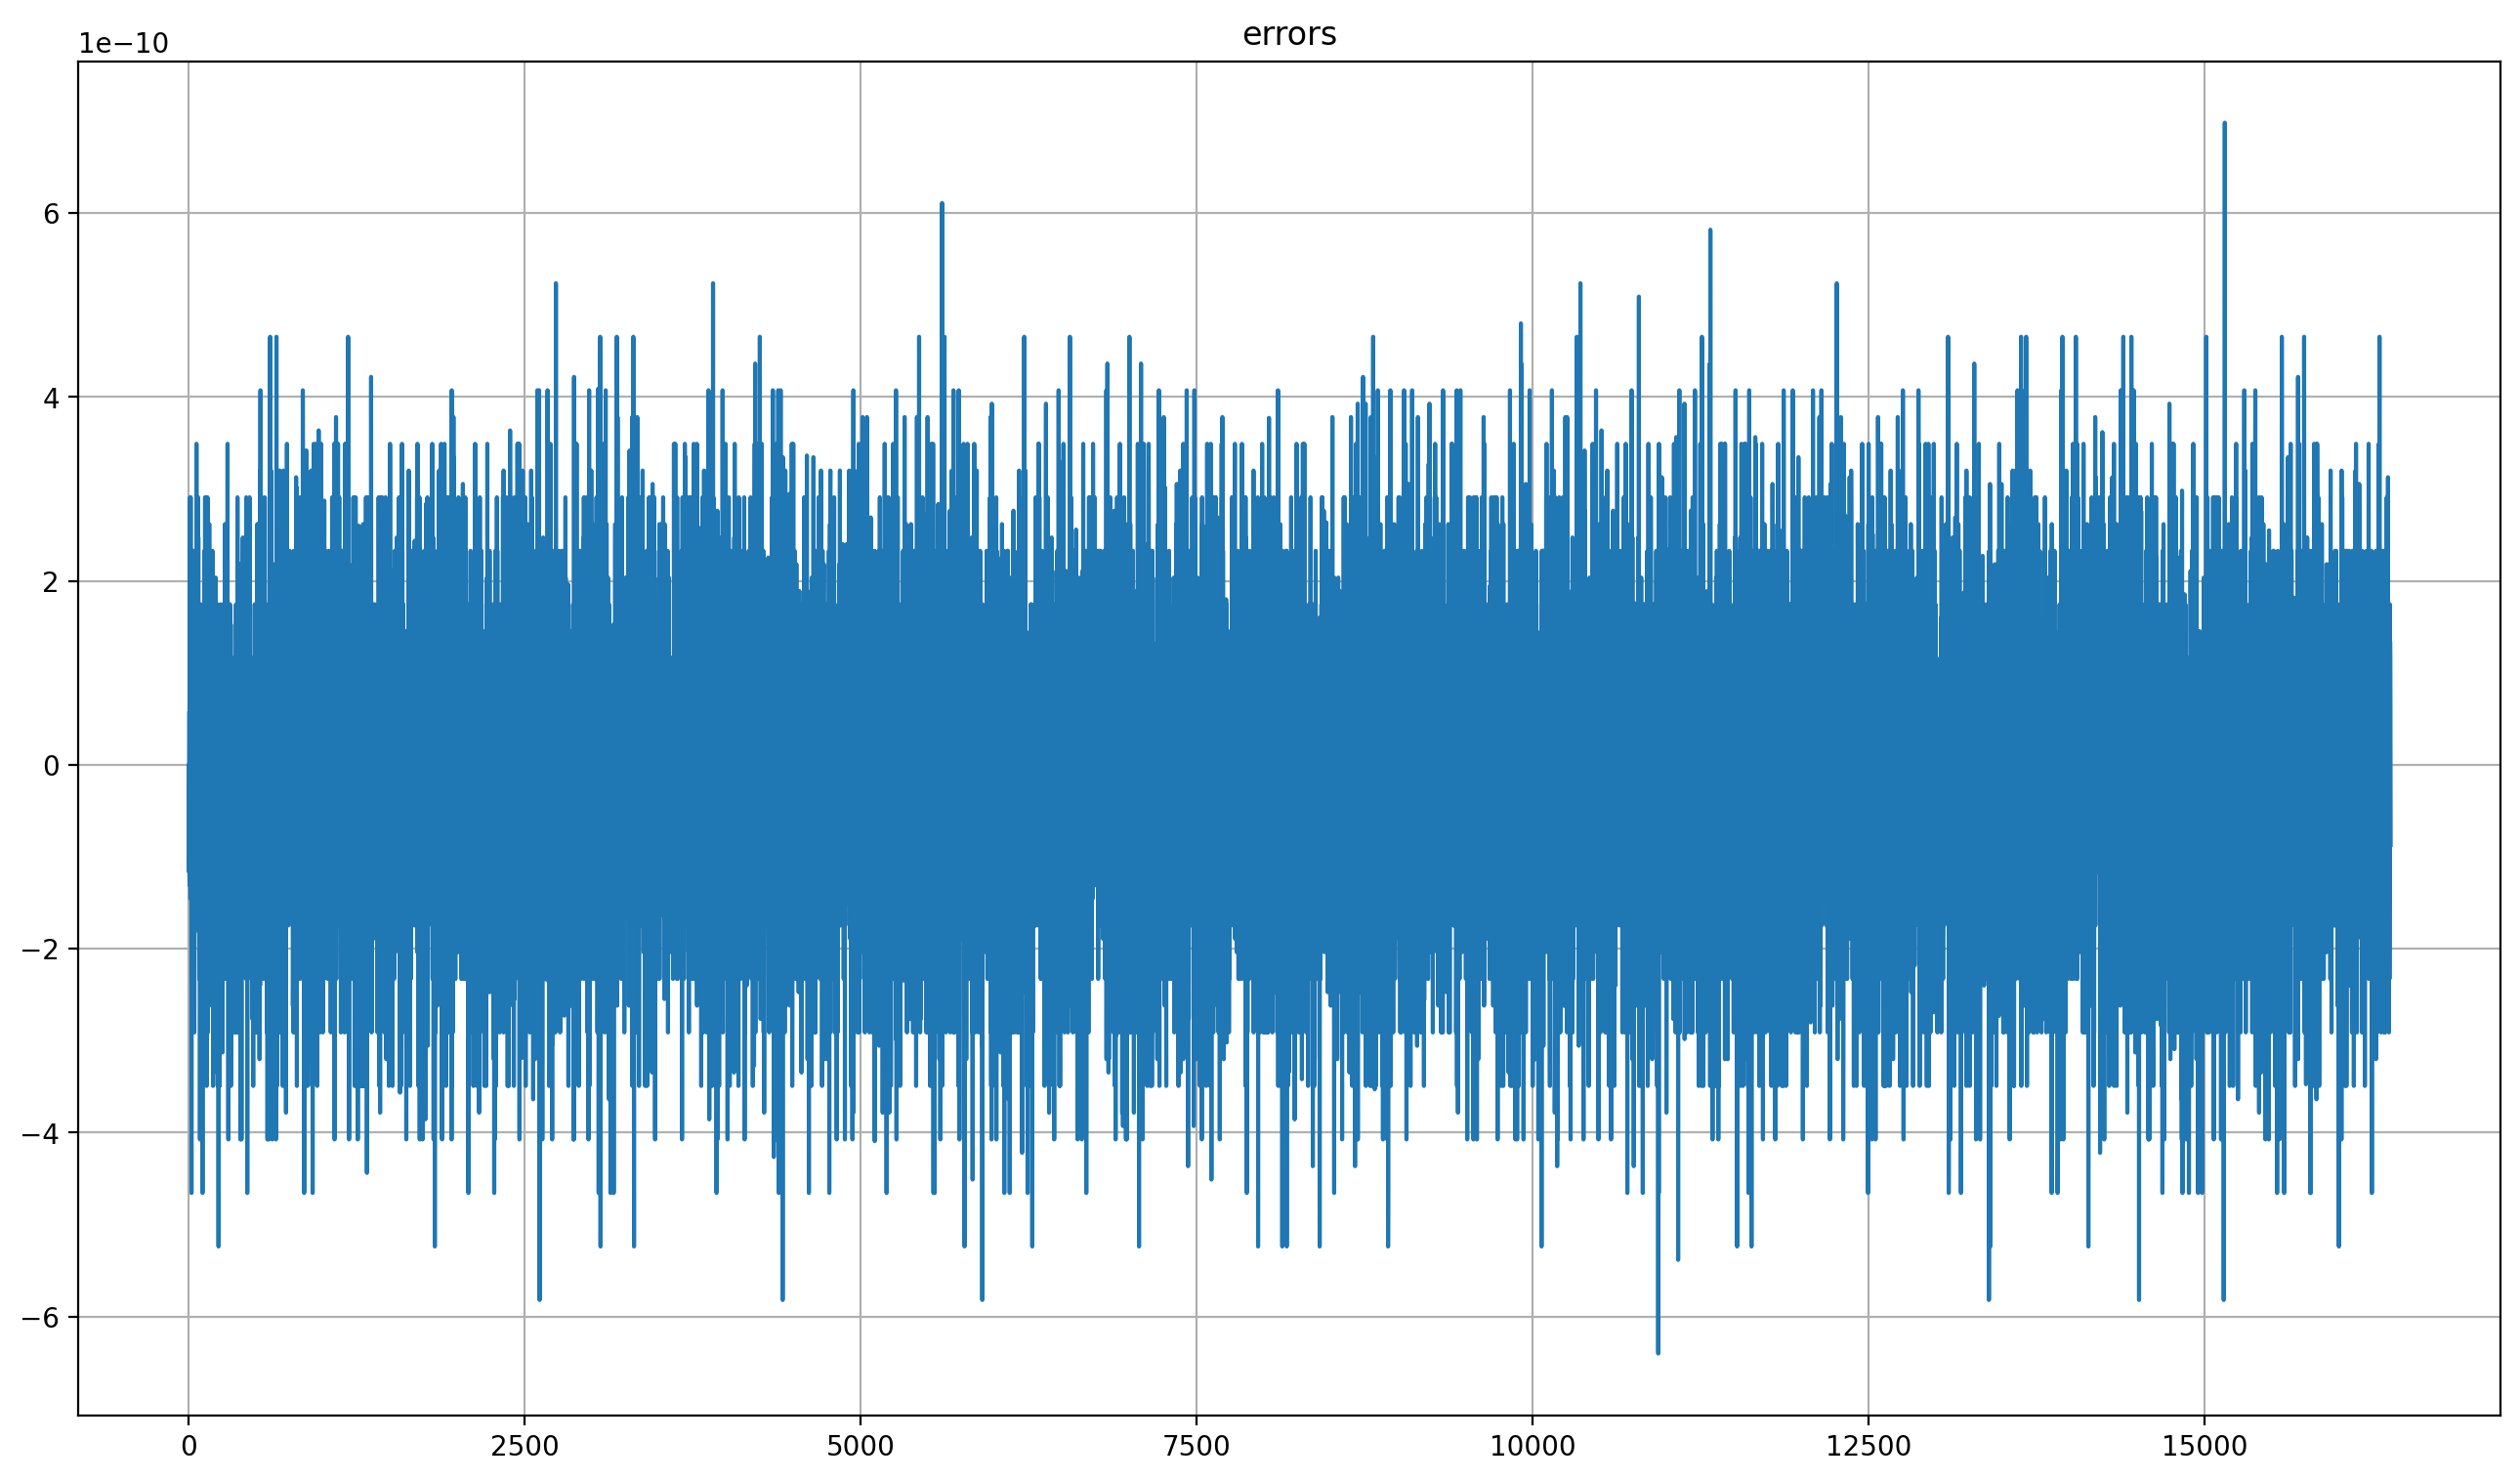

 -202331.6416323669 |  -202331.6416323669 |  -0.0000000000
 -495056.5097603008 |  -495056.5097603008 |   0.0000000000
  344978.7765758324 |   344978.7765758323 |  -0.0000000001
 -302248.3318157291 |  -302248.3318157292 |  -0.0000000001
 -287640.5841317273 |  -287640.5841317273 |  -0.0000000001
  260198.3072470983 |   260198.3072470982 |  -0.0000000001
  264257.4147834021 |   264257.4147834022 |   0.0000000001
   32691.3301915436 |    32691.3301915435 |  -0.0000000001
 -108364.3291478422 |  -108364.3291478423 |  -0.0000000001
 -396483.6720636303 |  -396483.6720636304 |  -0.0000000001
mean	=	-0.000000000009576-0.000000000001120j
std	=	0.000000000239745
max err	=	0.000000009429686
min err	=	0.000000000000000
level	:	13


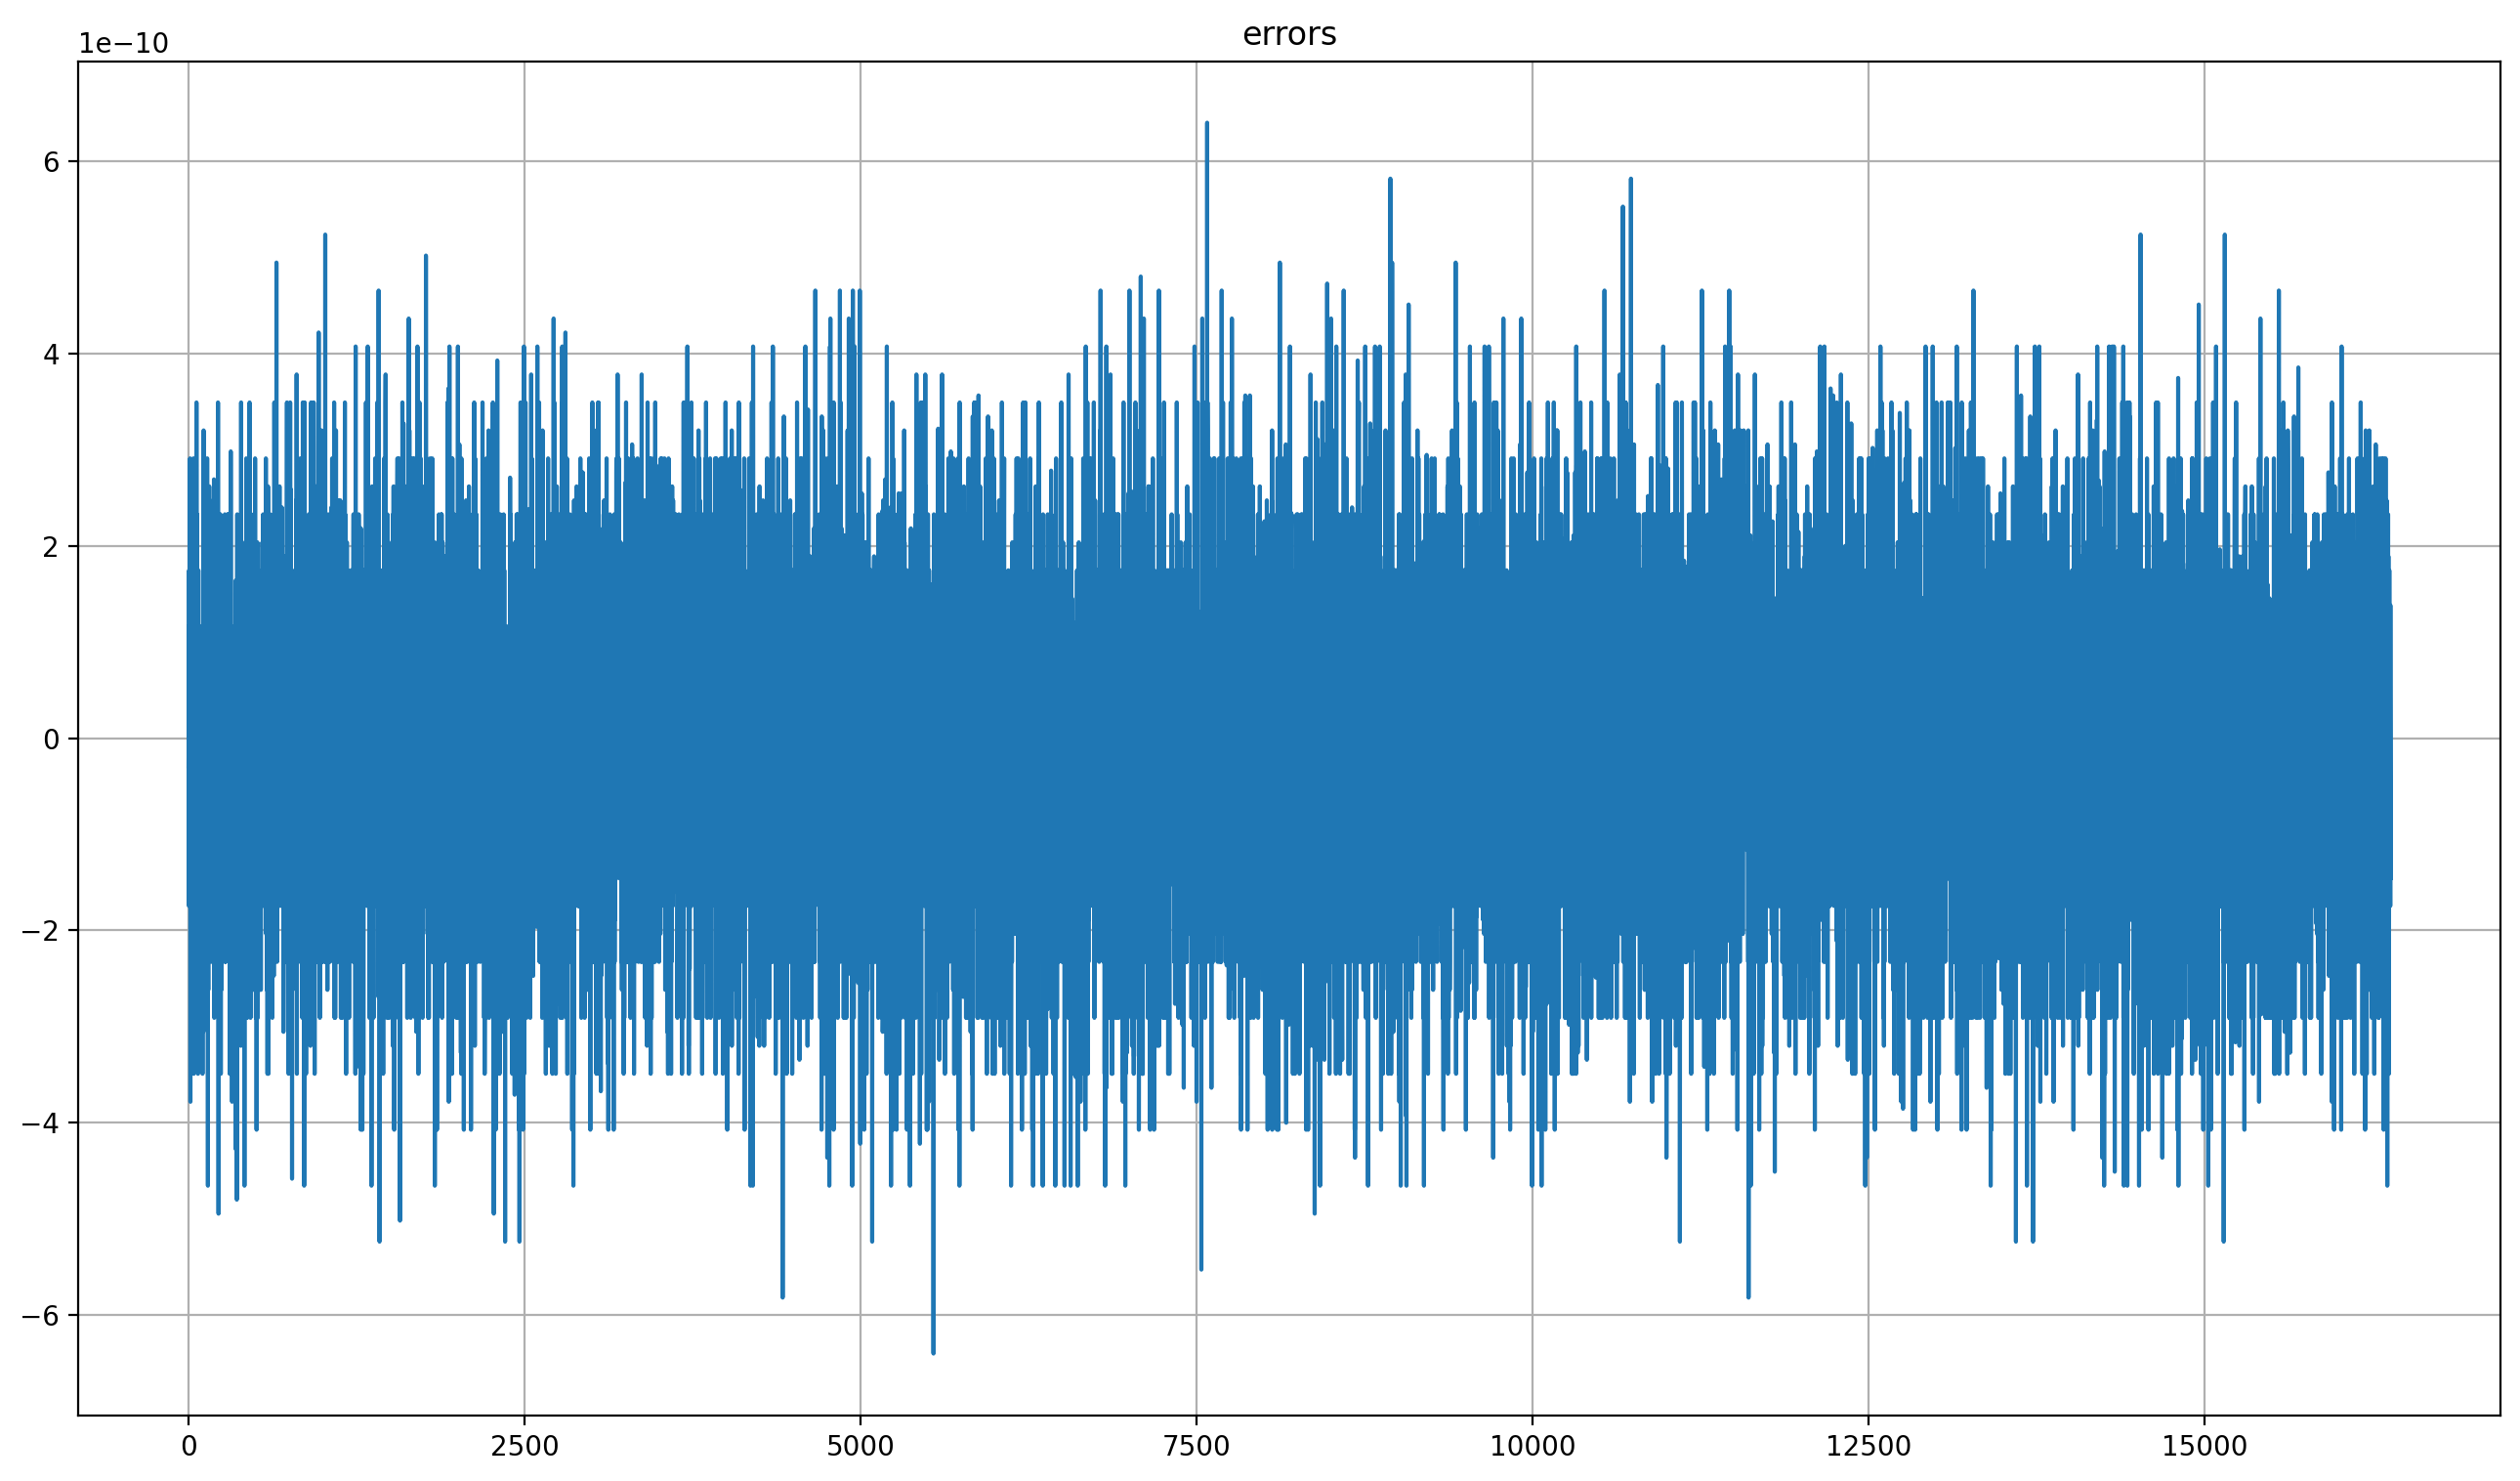

 -202331.6416323669 |  -202331.6416323669 |  -0.0000000000
 -495056.5097603008 |  -495056.5097603008 |   0.0000000000
  344978.7765758324 |   344978.7765758325 |   0.0000000001
 -302248.3318157291 |  -302248.3318157293 |  -0.0000000002
 -287640.5841317273 |  -287640.5841317271 |   0.0000000002
  260198.3072470983 |   260198.3072470983 |  -0.0000000000
  264257.4147834021 |   264257.4147834020 |  -0.0000000001
   32691.3301915436 |    32691.3301915437 |   0.0000000001
 -108364.3291478422 |  -108364.3291478422 |   0.0000000000
 -396483.6720636303 |  -396483.6720636305 |  -0.0000000002
mean	=	-0.000000000009385-0.000000000001367j
std	=	0.000000000236471
max err	=	0.000000009487893
min err	=	0.000000000000000
level	:	14


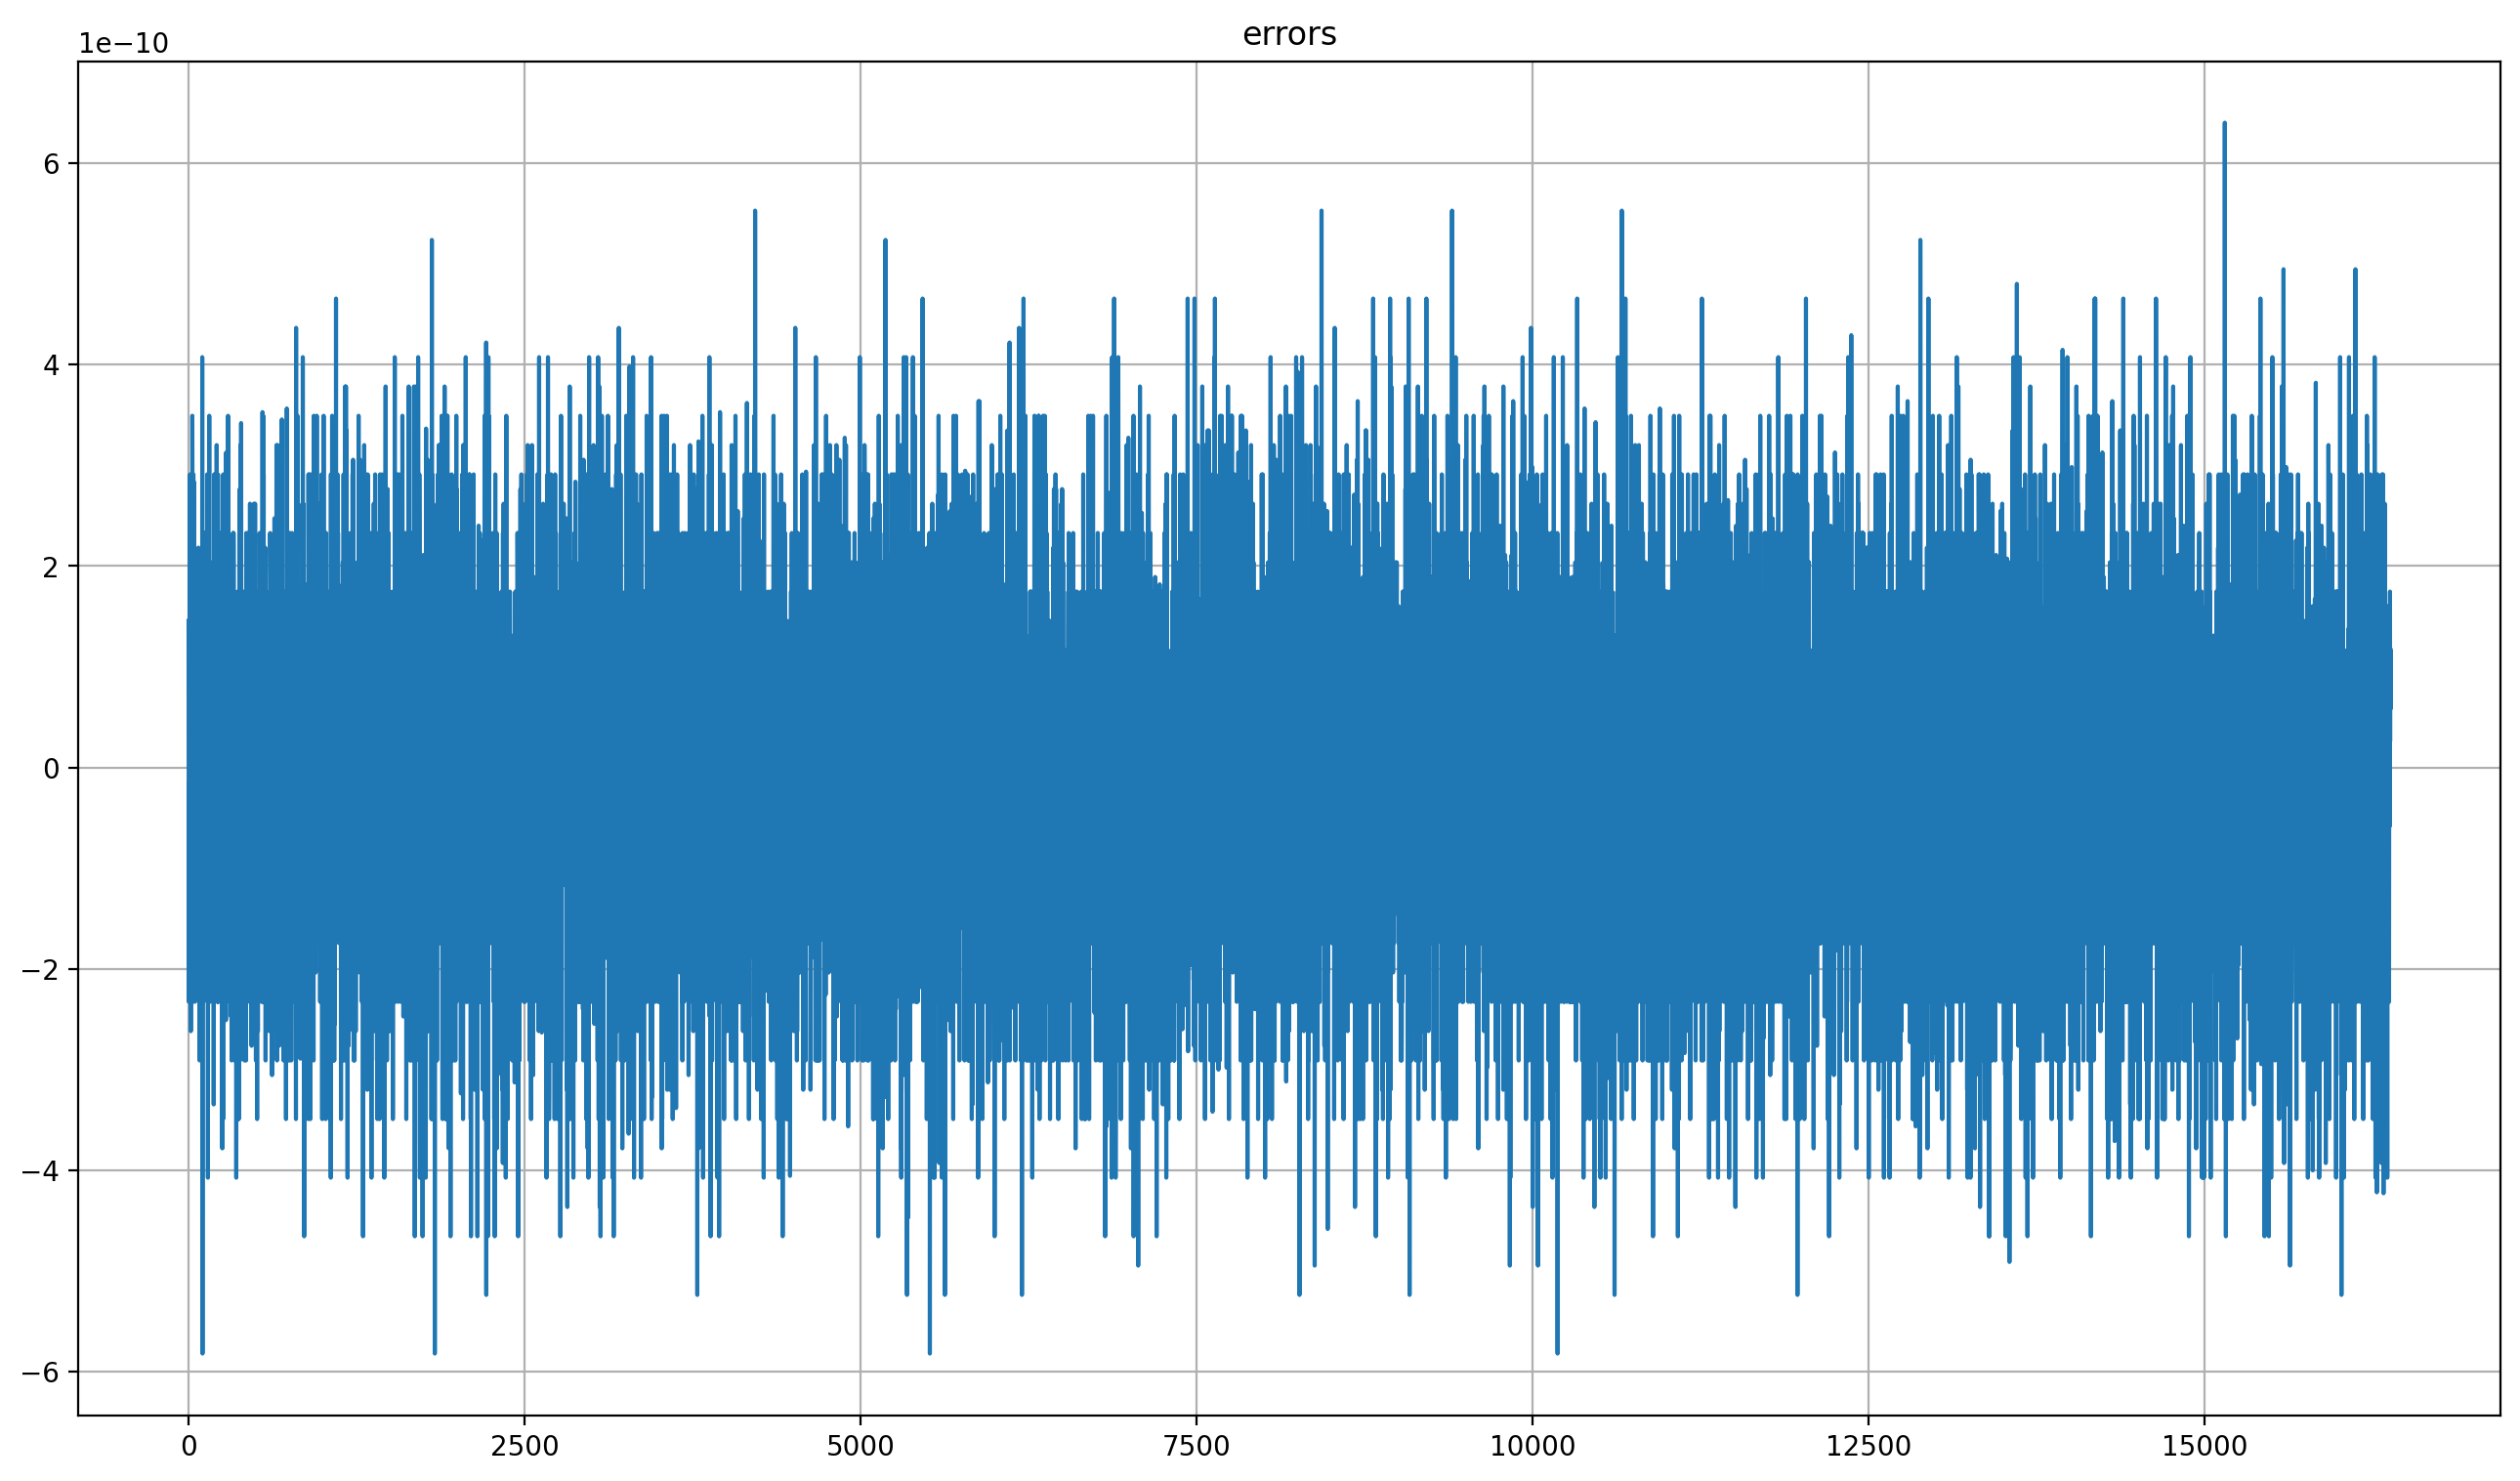

 -202331.6416323669 |  -202331.6416323668 |   0.0000000001
 -495056.5097603008 |  -495056.5097603009 |  -0.0000000001
  344978.7765758324 |   344978.7765758322 |  -0.0000000002
 -302248.3318157291 |  -302248.3318157292 |  -0.0000000001
 -287640.5841317273 |  -287640.5841317273 |  -0.0000000001
  260198.3072470983 |   260198.3072470981 |  -0.0000000002
  264257.4147834021 |   264257.4147834021 |  -0.0000000001
   32691.3301915436 |    32691.3301915436 |  -0.0000000000
 -108364.3291478422 |  -108364.3291478422 |  -0.0000000000
 -396483.6720636303 |  -396483.6720636302 |   0.0000000001
mean	=	-0.000000000010044-0.000000000001338j
std	=	0.000000000234461
max err	=	0.000000009634467
min err	=	0.000000000000000
level	:	15


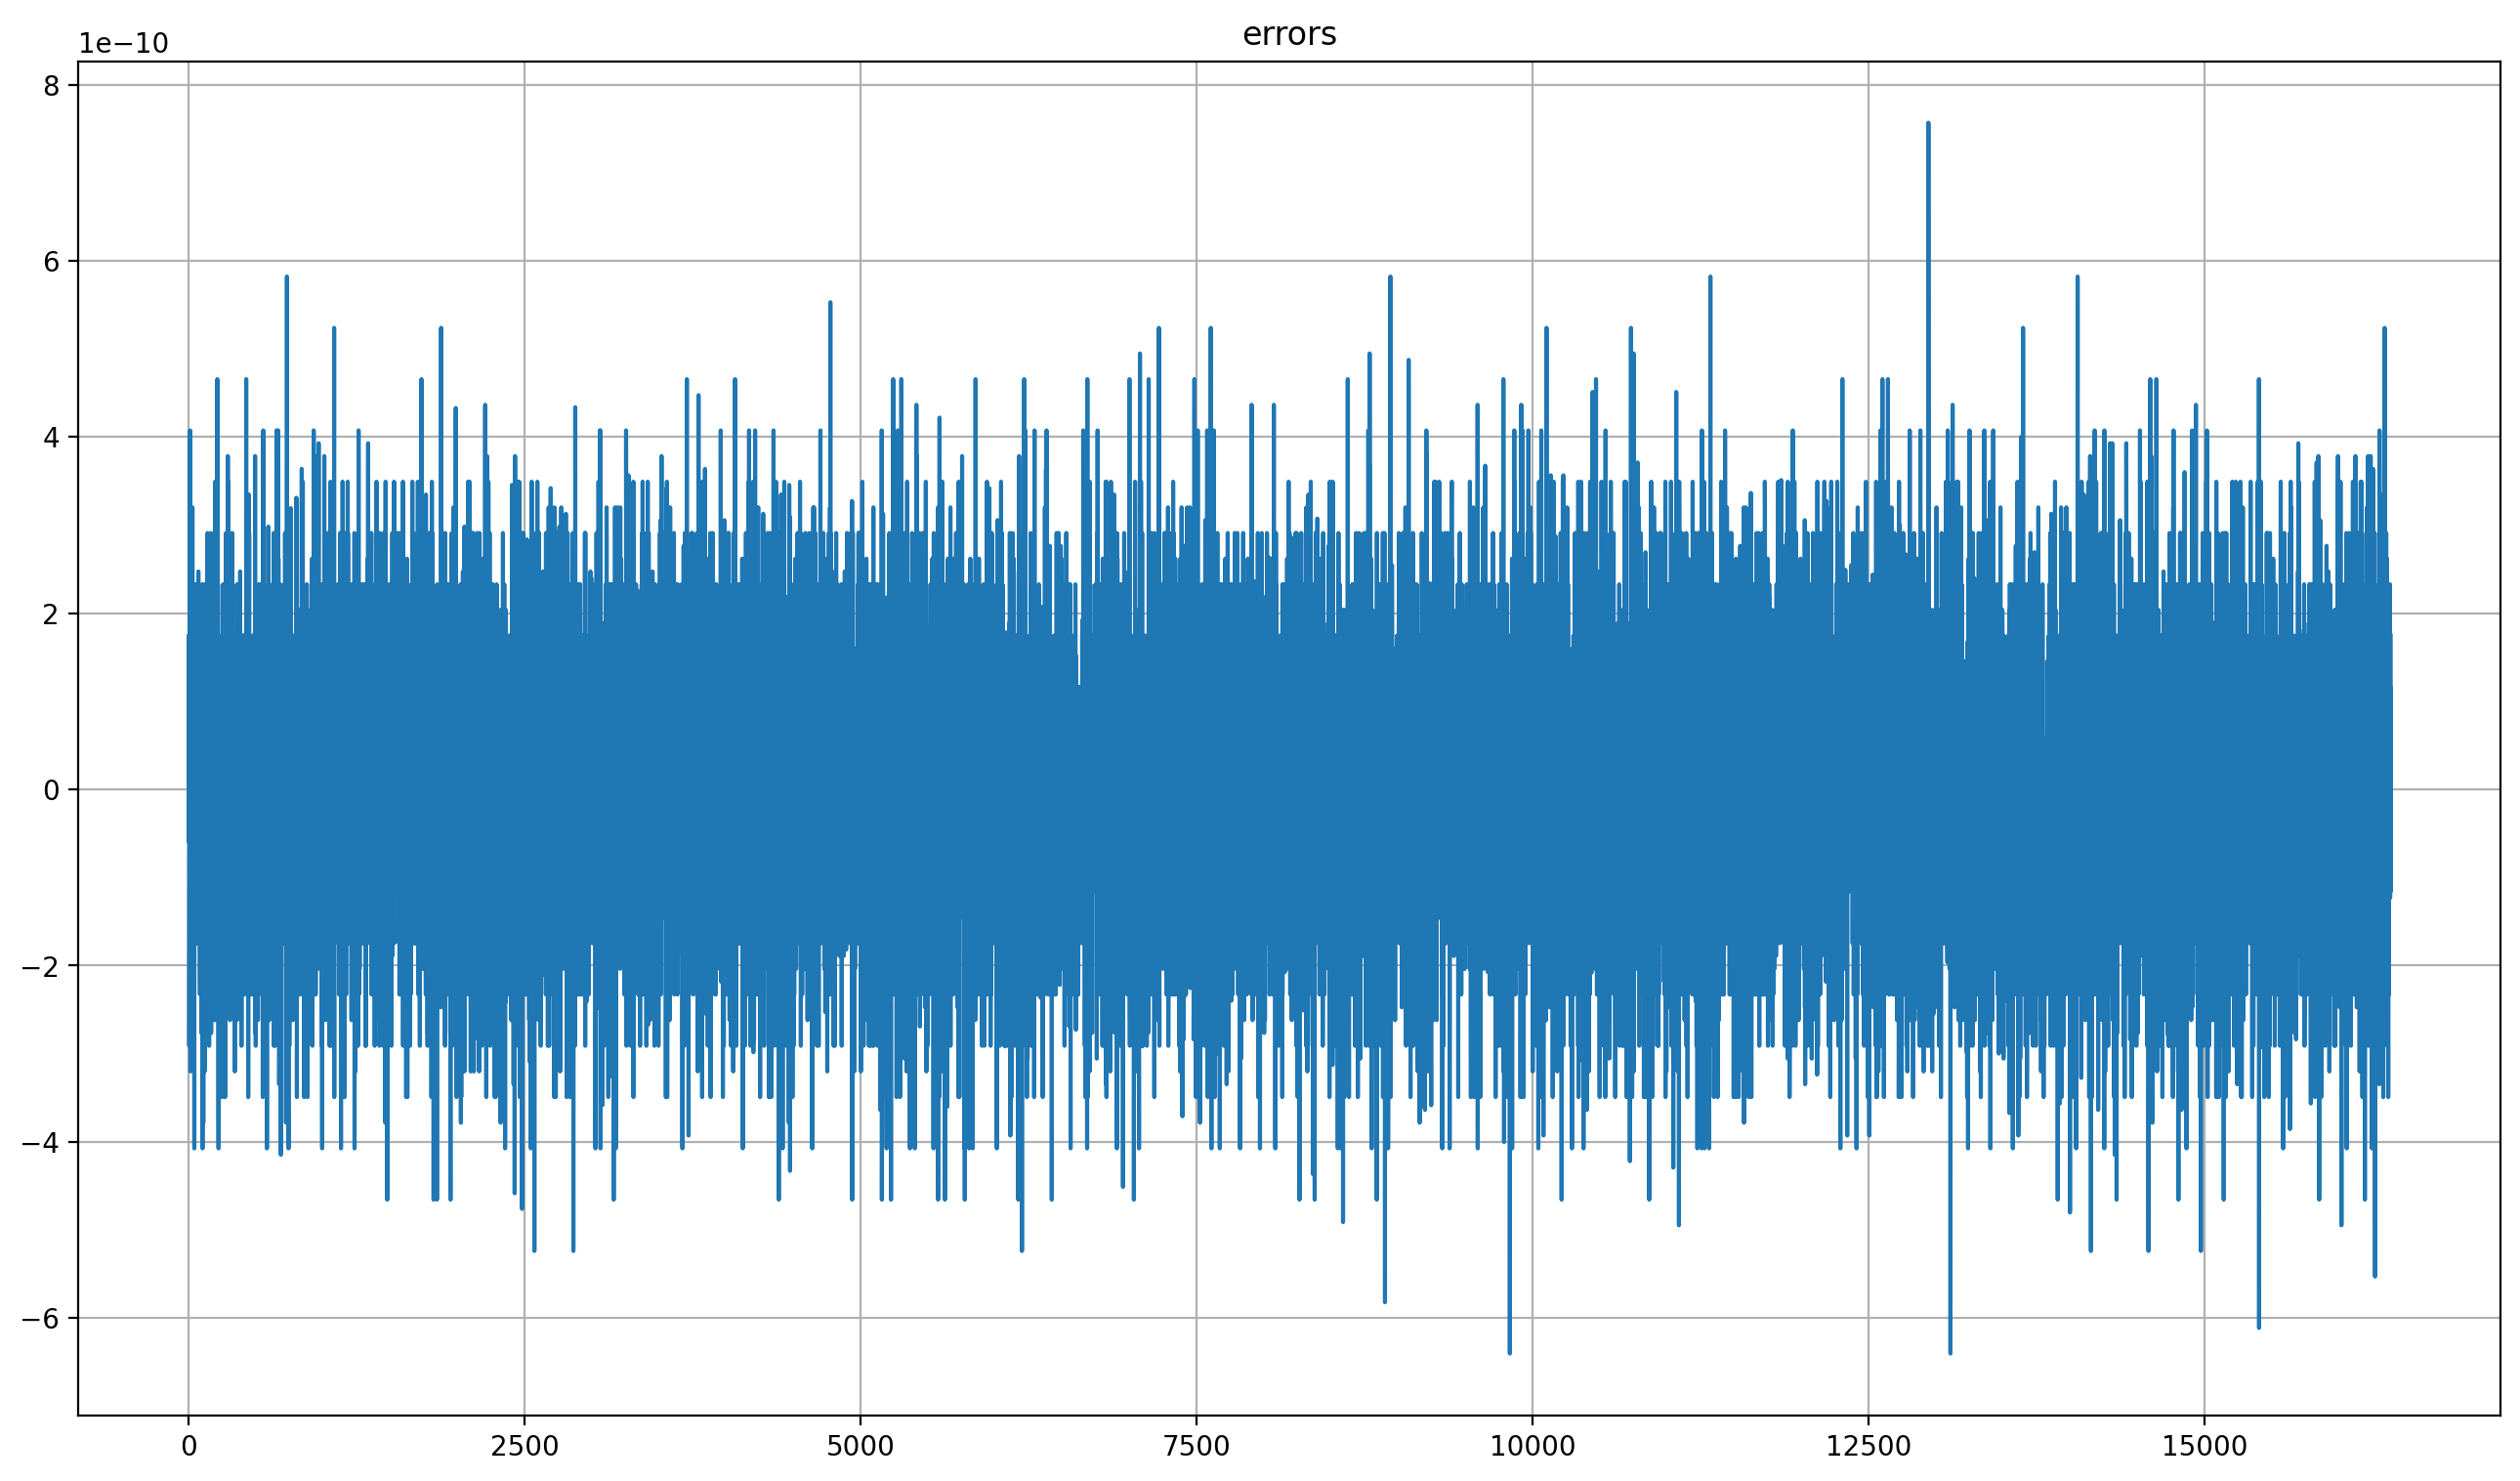

 -202331.6416323669 |  -202331.6416323670 |  -0.0000000001
 -495056.5097603008 |  -495056.5097603006 |   0.0000000002
  344978.7765758324 |   344978.7765758324 |   0.0000000000
 -302248.3318157291 |  -302248.3318157290 |   0.0000000001
 -287640.5841317273 |  -287640.5841317271 |   0.0000000002
  260198.3072470983 |   260198.3072470980 |  -0.0000000003
  264257.4147834021 |   264257.4147834019 |  -0.0000000002
   32691.3301915436 |    32691.3301915435 |  -0.0000000001
 -108364.3291478422 |  -108364.3291478422 |  -0.0000000000
 -396483.6720636303 |  -396483.6720636302 |   0.0000000001
mean	=	0.000000000000224-0.000000000000627j
std	=	0.000000000234375
max err	=	0.000000009342511
min err	=	0.000000000000000


In [9]:
test_message = engine.example()

for level in range(engine.num_levels):
    
    ct = engine.encorypt(test_message, pk=public_key, level=level)

    test_message_dec = engine.decrode(ct, sk=secret_key)

    print(f"level\t:\t{level}")
    liberate.utils.helpers.check_errors(test_message=test_message, test_message_dec=test_message_dec, idx=10)
    print("="*30)

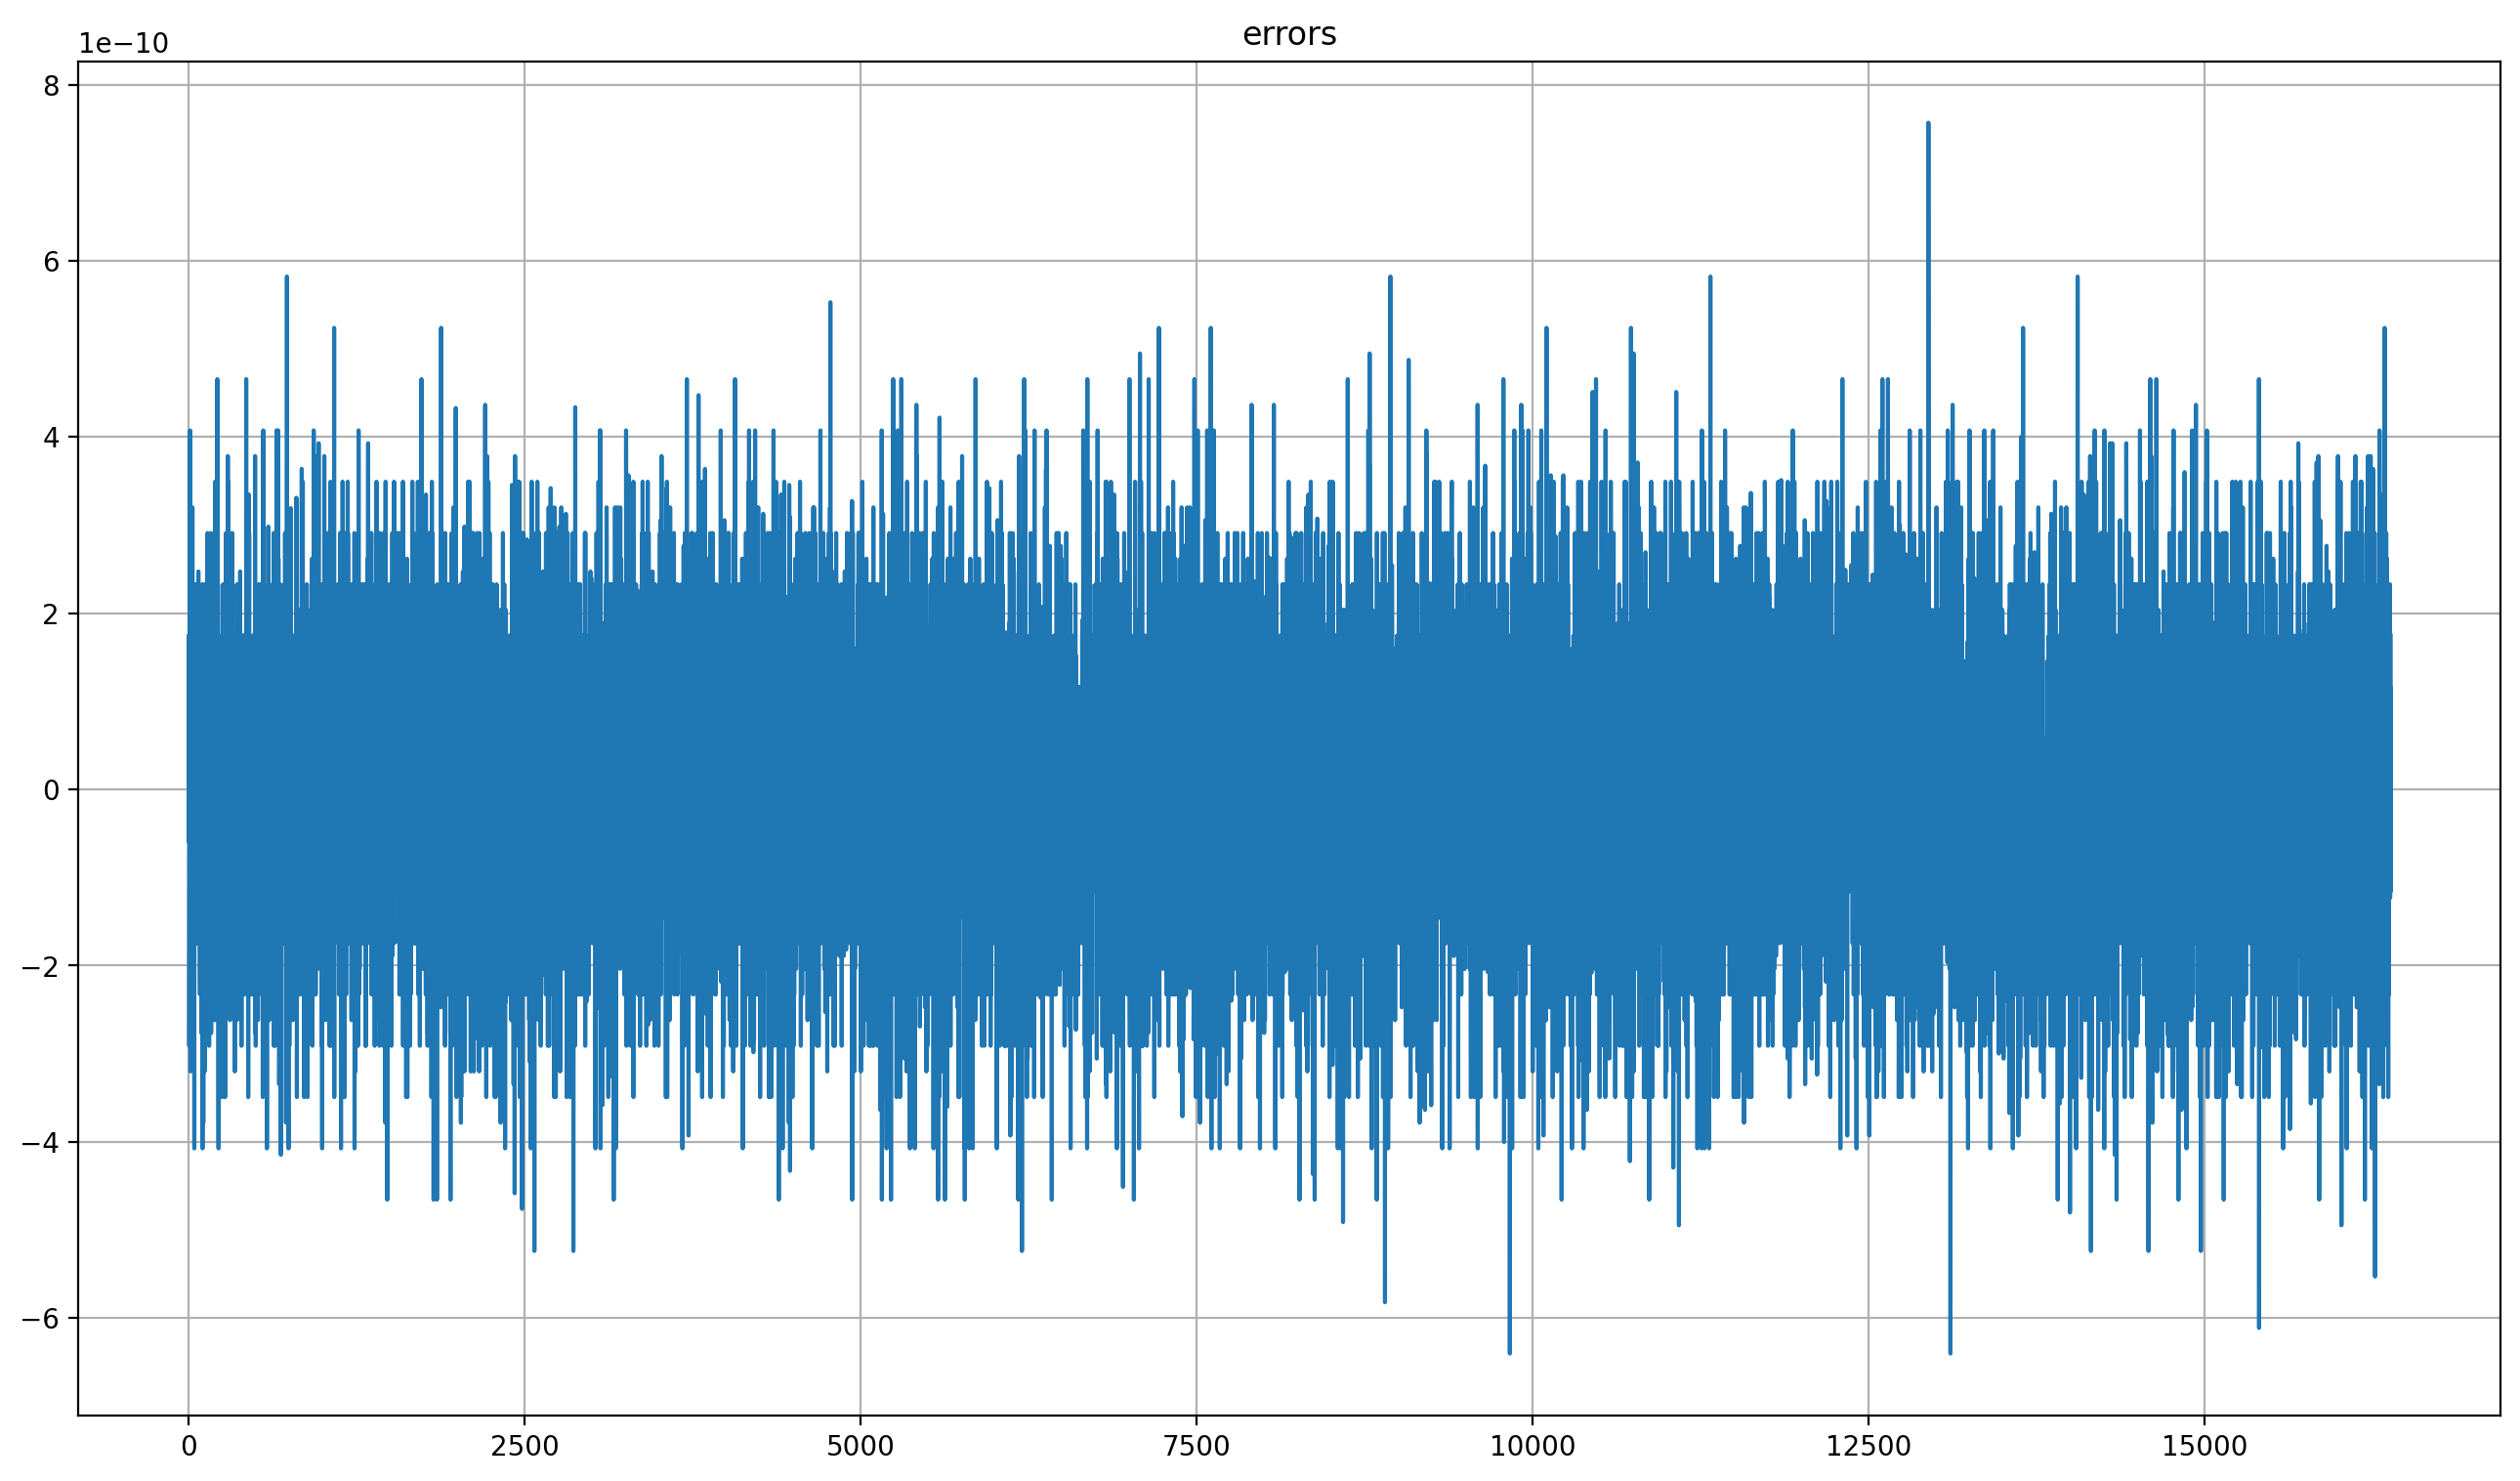

 -202331.6416323669 |  -202331.6416323670 |  -0.0000000001
 -495056.5097603008 |  -495056.5097603006 |   0.0000000002
  344978.7765758324 |   344978.7765758324 |   0.0000000000
 -302248.3318157291 |  -302248.3318157290 |   0.0000000001
 -287640.5841317273 |  -287640.5841317271 |   0.0000000002
  260198.3072470983 |   260198.3072470980 |  -0.0000000003
  264257.4147834021 |   264257.4147834019 |  -0.0000000002
   32691.3301915436 |    32691.3301915435 |  -0.0000000001
 -108364.3291478422 |  -108364.3291478422 |  -0.0000000000
 -396483.6720636303 |  -396483.6720636302 |   0.0000000001
mean	=	0.000000000000224-0.000000000000627j
std	=	0.000000000234375
max err	=	0.000000009342511
min err	=	0.000000000000000


In [10]:
liberate.utils.helpers.check_errors(test_message=test_message, test_message_dec=test_message_dec, idx=10)

----
----
----
----